In [1]:
%reload_ext autoreload
%autoreload 2

import os
import sys
import pickle
import numpy as np

import py21cmfast as p21c
from astropy.cosmology import Planck18
from scipy import interpolate

sys.path.append("..")
from dm21cm.dm_params import DMParams
from dm21cm.evolve import evolve
import dm21cm.physics as phys

sys.path.append(os.environ['DH_DIR'])
from darkhistory.main import evolve as evolve_DH

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import colormaps as cms
mpl.rc_file('../matplotlibrc')

/n/home07/yitians/.conda/envs/dm21cm/lib/python3.11/site-packages/py21cmfast/_cfg.py:58: UserWarning: Your configuration file is out of date. Updating...
  warnings.warn(
/n/home07/yitians/.conda/envs/dm21cm/lib/python3.11/site-packages/py21cmfast/_cfg.py:42: UserWarning: Your configuration file is out of date. Updating...
  warnings.warn("Your configuration file is out of date. Updating...")


## DMParam

In [2]:
dm_params = DMParams(
    mode = 'decay',
    primary = 'phot_delta',
    m_DM = 1e8,
    lifetime = 1e25,
)

tf_version = 'zf01'

In [2]:
dm_params = DMParams(
    mode = 'decay',
    primary = 'phot_delta',
    m_DM = 1.2e10,
    lifetime = 1e50,
)

tf_version = 'zf01'

## DarkHistory

In [3]:
from darkhistory.config import load_data
load_data('dep_tf', prefix=f'/n/holyscratch01/iaifi_lab/yitians/darkhistory/DHdata_v1_1_{tf_version}')
load_data('ics_tf', prefix=f'/n/holyscratch01/iaifi_lab/yitians/darkhistory/DHdata_v1_1_{tf_version}');

****** Loading transfer functions... ******
Using data at /n/holyscratch01/iaifi_lab/yitians/darkhistory/DHdata_v1_1_zf01
    for propagating photons...   Done!
    for low-energy photons...  Done!
    for low-energy electrons...  Done!
    for high-energy deposition...  Done!
    for total upscattered CMB energy rate...  Done!
****** Loading complete! ******
****** Loading transfer functions... ******
    for inverse Compton (Thomson)...  Done!
    for inverse Compton (relativistic)...  Done!
    for inverse Compton (energy loss)...  Done!
****** Loading complete! ******


In [109]:
run_name = 'dhc_test'

soln = evolve_DH(
    DM_process=dm_params.mode, mDM=dm_params.m_DM,
    primary=dm_params.primary,
    sigmav=dm_params.sigmav, lifetime=dm_params.lifetime,
    struct_boost=dm_params.struct_boost,
    start_rs=3000, end_rs=4.+1, coarsen_factor=12, verbose=1,
    # use fake reionization to get case-A recomb. coeff.
    reion_switch=True, reion_rs=47.,
    photoion_rate_func=[lambda x: 0., lambda x: 0., lambda x: 0.],
    photoheat_rate_func=[lambda x: 0., lambda x: 0., lambda x: 0.],
    cross_check_21cmfast=True,
    debug_no_bath=False,
)

pickle.dump(soln, open(f"run_info/{run_name}_dh_soln.p", 'wb'))

Loading time: 0.000 s


  0%|          | 0/534 [00:00<?, ?it/s]WARNING:root:Cross checking 21cmfast!
/n/home07/yitians/darkhistory/DarkHistory/darkhistory/history/tla.py:640: RuntimeWarning: invalid value encountered in arctanh
  _init_cond[2] = np.arctanh(2/chi * (_init_cond[2] - chi/2))
/n/home07/yitians/.conda/envs/dm21cm/lib/python3.11/site-packages/scipy/integrate/_odepack_py.py:248: ODEintWarning: Illegal input detected (internal error). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
  0%|          | 2/534 [00:00<00:48, 10.86it/s]

Initialization time: 0.019 s
rs =  3000
lowengelec_spec_at_rs.toteng()= 4.1275005235328825e-07
lowengphot_spec_at_rs.toteng()= 1.3914821879008312e-06
x_vec_for_f =  [7.00932090e-10 1.75233198e-16 2.50000250e-07]
rate_func_eng_unclustered(rs) =  3.3951402257935806e-12
dt =  48492610238.11383
highengdep_at_rs =  [ 1.07825640e-20  9.07924607e-21  2.91896369e-18 -2.22965722e-20]
f_raw =  (array([4.26277118e-03, 6.46922876e-06, 8.58780322e-04, 6.46922761e-02,
       4.66643299e-03]), array([ 2.15873326e-05,  0.00000000e+00,  1.81771891e-05,  5.84393841e-03,
       -4.46390600e-05]))
-----------
 lsoda--  at start of problem, too much accuracy     
       requested for precision of machine..  see tolsf (=r1) 
      in above message,  r1 =                  NaN


  1%|          | 4/534 [00:00<01:06,  8.03it/s]

rs =  2964.2151385857906
lowengelec_spec_at_rs.toteng()= 1.04598285892059e-06
lowengphot_spec_at_rs.toteng()= 2.8527715451928576e-06
x_vec_for_f =  [7.00932090e-10 1.75233198e-16 2.50000250e-07]
rate_func_eng_unclustered(rs) =  3.275089063825872e-12
dt =  49474858071.24452
highengdep_at_rs =  [ 2.79989853e-20  2.35983606e-20  7.55537648e-18 -5.77683294e-20]
f_raw =  (array([8.46892042e-03, 1.34360277e-05, 1.82179284e-03, 1.34360253e-01,
       1.30980956e-02]), array([ 5.60556290e-05,  0.00000000e+00,  4.72453174e-05,  1.51263118e-02,
       -1.15655621e-04]))
-----------
 lsoda--  at start of problem, too much accuracy     
       requested for precision of machine..  see tolsf (=r1) 
      in above message,  r1 =                  NaN
rs =  2928.8571292737283
lowengelec_spec_at_rs.toteng()= 1.718166193142732e-06
lowengphot_spec_at_rs.toteng()= 4.194017549027767e-06
x_vec_for_f =  [7.00932090e-10 1.75233198e-16 2.50000250e-07]
rate_func_eng_unclustered(rs) =  3.159282875712361e-12
dt =

  1%|          | 6/534 [00:00<01:11,  7.35it/s]

rs =  2893.9208804493705
lowengelec_spec_at_rs.toteng()= 2.3720918462855716e-06
lowengphot_spec_at_rs.toteng()= 5.4076990901962726e-06
x_vec_for_f =  [7.00932090e-10 1.75233198e-16 2.50000250e-07]
rate_func_eng_unclustered(rs) =  3.0475715604233802e-12
dt =  51496948912.160995
highengdep_at_rs =  [ 6.26207067e-20  5.26623537e-20  1.68275162e-17 -1.27044186e-19]
f_raw =  (array([1.53279914e-02, 2.53060319e-05, 3.43968755e-03, 2.53060273e-01,
       3.05937444e-02]), array([ 0.00012537,  0.        ,  0.00010543,  0.03368969, -0.00025435]))
-----------
 lsoda--  at start of problem, too much accuracy     
       requested for precision of machine..  see tolsf (=r1) 
      in above message,  r1 =                  NaN
rs =  2859.4013612325166
lowengelec_spec_at_rs.toteng()= 2.978693454824368e-06
lowengphot_spec_at_rs.toteng()= 6.499580235393732e-06
x_vec_for_f =  [7.00932090e-10 1.75233198e-16 2.50000250e-07]
rate_func_eng_unclustered(rs) =  2.9398103244576316e-12
dt =  52537511682.04812
hi

/n/home07/yitians/.conda/envs/dm21cm/lib/python3.11/site-packages/scipy/integrate/_odepack_py.py:248: ODEintWarning: Run terminated (internal error). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
  1%|▏         | 8/534 [00:01<01:14,  7.05it/s]

rs =  2825.2936007527496
lowengelec_spec_at_rs.toteng()= 3.528178595165316e-06
lowengphot_spec_at_rs.toteng()= 7.479973303353949e-06
x_vec_for_f =  [7.00932090e-10 1.75233198e-16 2.50000250e-07]
rate_func_eng_unclustered(rs) =  2.8358594941695283e-12
dt =  53598243474.44849
highengdep_at_rs =  [ 9.23293874e-20  7.69581641e-20  2.46270150e-17 -1.83296561e-19]
f_raw =  (array([2.03454938e-02, 3.40922318e-05, 4.58491697e-03, 3.40922257e-01,
       4.52884428e-02]), array([ 0.00018485,  0.        ,  0.00015407,  0.04930474, -0.00036697]))
-----------
 lsoda--  at start of problem, too much accuracy     
       requested for precision of machine..  see tolsf (=r1) 
      in above message,  r1 =                  NaN
 lsoda--  repeated occurrences of illegal input      
rs =  2791.5926874336196
lowengelec_spec_at_rs.toteng()= 4.01884211168704e-06
lowengphot_spec_at_rs.toteng()= 8.360447260272283e-06
x_vec_for_f =  [7.00932090e-10 1.75233198e-16 2.50000250e-07]
rate_func_eng_unclustered(rs) = 

  2%|▏         | 10/534 [00:01<01:16,  6.89it/s]

rs =  2758.2937682853776
lowengelec_spec_at_rs.toteng()= 4.451794962471288e-06
lowengphot_spec_at_rs.toteng()= 9.1520987529199e-06
x_vec_for_f =  [7.00932090e-10 1.75233198e-16 2.50000250e-07]
rate_func_eng_unclustered(rs) =  2.6388548755042847e-12
dt =  55781726913.19822
highengdep_at_rs =  [ 1.16315583e-19  9.54362931e-20  3.06522356e-17 -2.22547099e-19]
f_raw =  (array([2.39396630e-02, 4.02648683e-05, 5.34618833e-03, 4.02648611e-01,
       5.62664806e-02]), array([ 0.00023287,  0.        ,  0.00019107,  0.06136759, -0.00044555]))
-----------
 lsoda--  at start of problem, too much accuracy     
       requested for precision of machine..  see tolsf (=r1) 
      in above message,  r1 =                  NaN
 lsoda--  repeated occurrences of illegal input      
rs =  2725.3920482061235
lowengelec_spec_at_rs.toteng()= 4.831879625246372e-06
lowengphot_spec_at_rs.toteng()= 9.865929833285854e-06
x_vec_for_f =  [7.00932090e-10 1.75233198e-16 2.50000250e-07]
rate_func_eng_unclustered(rs) =  

  2%|▏         | 12/534 [00:01<01:16,  6.83it/s]

rs =  2692.8827892913105
lowengelec_spec_at_rs.toteng()= 5.164988205865537e-06
lowengphot_spec_at_rs.toteng()= 1.0512286891822243e-05
x_vec_for_f =  [7.00932090e-10 1.75233198e-16 2.50000250e-07]
rate_func_eng_unclustered(rs) =  2.4555359912187758e-12
dt =  58050494129.854454
highengdep_at_rs =  [ 1.35708524e-19  1.08182779e-19  3.49701628e-17 -2.48102884e-19]
f_raw =  (array([2.64959548e-02, 4.44600432e-05, 5.83320124e-03, 4.44600353e-01,
       6.36905121e-02]), array([ 0.0002717 ,  0.        ,  0.00021659,  0.07001234, -0.00049672]))
-----------
 lsoda--  at start of problem, too much accuracy     
       requested for precision of machine..  see tolsf (=r1) 
      in above message,  r1 =                  NaN
 lsoda--  repeated occurrences of illegal input      
rs =  2660.7613101514794
lowengelec_spec_at_rs.toteng()= 5.456995529835024e-06
lowengphot_spec_at_rs.toteng()= 1.1100732572452524e-05
x_vec_for_f =  [7.00932090e-10 1.75233198e-16 2.50000250e-07]
rate_func_eng_unclustered(rs

  3%|▎         | 14/534 [00:01<01:16,  6.79it/s]

rs =  2629.022985238128
lowengelec_spec_at_rs.toteng()= 5.713550399894052e-06
lowengphot_spec_at_rs.toteng()= 1.1639898325604508e-05
x_vec_for_f =  [7.00932090e-10 1.75233198e-16 2.50000250e-07]
rate_func_eng_unclustered(rs) =  2.2849521056054713e-12
dt =  60407753788.04415
highengdep_at_rs =  [ 1.51418605e-19  1.16153809e-19  3.78673821e-17 -2.61884263e-19]
f_raw =  (array([2.83104748e-02, 4.72392536e-05, 6.13513153e-03, 4.72392452e-01,
       6.82317867e-02]), array([ 0.00030315,  0.        ,  0.00023255,  0.07581274, -0.00052431]))
-----------
 lsoda--  at start of problem, too much accuracy     
       requested for precision of machine..  see tolsf (=r1) 
      in above message,  r1 =                  NaN
 lsoda--  repeated occurrences of illegal input      
rs =  2597.663244177624
lowengelec_spec_at_rs.toteng()= 5.940096104773901e-06
lowengphot_spec_at_rs.toteng()= 1.2137613708686947e-05
x_vec_for_f =  [7.00932090e-10 1.75233198e-16 2.50000250e-07]
rate_func_eng_unclustered(rs) =

  3%|▎         | 16/534 [00:02<01:16,  6.76it/s]

rs =  2566.6775711130654
lowengelec_spec_at_rs.toteng()= 6.141427616020949e-06
lowengphot_spec_at_rs.toteng()= 1.260071233086903e-05
x_vec_for_f =  [7.00932090e-10 1.75233198e-16 2.50000250e-07]
rate_func_eng_unclustered(rs) =  2.1262185297147645e-12
dt =  62856832477.39222
highengdep_at_rs =  [ 1.64323539e-19  1.20482298e-19  3.96762996e-17 -2.68286241e-19]
f_raw =  (array([2.96002605e-02, 4.90325146e-05, 6.31645623e-03, 4.90325059e-01,
       7.06479717e-02]), array([ 0.00032899,  0.        ,  0.00024121,  0.0794343 , -0.00053712]))
-----------
 lsoda--  at start of problem, too much accuracy     
       requested for precision of machine..  see tolsf (=r1) 
      in above message,  r1 =                  NaN
 lsoda--  repeated occurrences of illegal input      
rs =  2536.0615040539874
lowengelec_spec_at_rs.toteng()= 6.311985061988783e-06
lowengphot_spec_at_rs.toteng()= 1.3038217368484728e-05
x_vec_for_f =  [7.00932090e-10 1.75233198e-16 2.50000250e-07]
rate_func_eng_unclustered(rs) 

  3%|▎         | 18/534 [00:02<01:16,  6.75it/s]

rs =  2505.810634233828
lowengelec_spec_at_rs.toteng()= 6.481570419600653e-06
lowengphot_spec_at_rs.toteng()= 1.3449896757500837e-05
x_vec_for_f =  [7.00932090e-10 1.75233198e-16 2.50000250e-07]
rate_func_eng_unclustered(rs) =  1.9785120331458697e-12
dt =  65401179030.7627
highengdep_at_rs =  [ 1.75035069e-19  1.22196722e-19  4.06916747e-17 -2.67960851e-19]
f_raw =  (array([3.05207465e-02, 5.01542460e-05, 6.42026774e-03, 5.01542371e-01,
       7.15885284e-02]), array([ 0.00035043,  0.        ,  0.00024465,  0.08146715, -0.00053647]))
-----------
 lsoda--  at start of problem, too much accuracy     
       requested for precision of machine..  see tolsf (=r1) 
      in above message,  r1 =                  NaN
 lsoda--  repeated occurrences of illegal input      
rs =  2475.9206054750603
lowengelec_spec_at_rs.toteng()= 6.630303418433457e-06
lowengphot_spec_at_rs.toteng()= 1.3841942966209672e-05
x_vec_for_f =  [7.00932090e-10 1.75233198e-16 2.50000250e-07]
rate_func_eng_unclustered(rs) =

  4%|▎         | 20/534 [00:02<01:16,  6.75it/s]

rs =  2446.387113561892
lowengelec_spec_at_rs.toteng()= 6.767249102017738e-06
lowengphot_spec_at_rs.toteng()= 1.4218649747613582e-05
x_vec_for_f =  [7.00932090e-10 1.75233198e-16 2.50000250e-07]
rate_func_eng_unclustered(rs) =  1.8410665745764815e-12
dt =  68044369000.56316
highengdep_at_rs =  [ 1.84214753e-19  1.22218056e-19  4.11876526e-17 -2.64706042e-19]
f_raw =  (array([3.11799906e-02, 5.08163191e-05, 6.47473400e-03, 5.08163101e-01,
       7.15764641e-02]), array([ 0.00036881,  0.        ,  0.00024469,  0.08246012, -0.00052996]))
-----------
 lsoda--  at start of problem, too much accuracy     
       requested for precision of machine..  see tolsf (=r1) 
      in above message,  r1 =                  NaN
 lsoda--  repeated occurrences of illegal input      
rs =  2417.2059056204534
lowengelec_spec_at_rs.toteng()= 6.894478821719612e-06
lowengphot_spec_at_rs.toteng()= 1.4583159711782295e-05
x_vec_for_f =  [7.00932090e-10 1.75233198e-16 2.50000250e-07]
rate_func_eng_unclustered(rs) 

  4%|▍         | 22/534 [00:03<01:15,  6.75it/s]

rs =  2388.3727795063764
lowengelec_spec_at_rs.toteng()= 7.013686307617847e-06
lowengphot_spec_at_rs.toteng()= 1.4938129133090493e-05
x_vec_for_f =  [7.00932090e-10 1.75233198e-16 2.50000250e-07]
rate_func_eng_unclustered(rs) =  1.713169328888725e-12
dt =  70790109299.95386
highengdep_at_rs =  [ 1.92204134e-19  1.21062852e-19  4.13142678e-17 -2.58955374e-19]
f_raw =  (array([3.16556487e-02, 5.11673890e-05, 6.49789012e-03, 5.11673799e-01,
       7.09344195e-02]), array([ 0.0003848 ,  0.        ,  0.00024238,  0.08271361, -0.00051844]))
-----------
 lsoda--  at start of problem, too much accuracy     
       requested for precision of machine..  see tolsf (=r1) 
      in above message,  r1 =                  NaN
 lsoda--  repeated occurrences of illegal input      
rs =  2359.8835831996767
lowengelec_spec_at_rs.toteng()= 7.126249612356354e-06
lowengphot_spec_at_rs.toteng()= 1.5285857143914392e-05
x_vec_for_f =  [7.00932090e-10 1.75233198e-16 2.50000250e-07]
rate_func_eng_unclustered(rs) 

  4%|▍         | 24/534 [00:03<01:15,  6.76it/s]

rs =  2331.734214206856
lowengelec_spec_at_rs.toteng()= 7.233312607944339e-06
lowengphot_spec_at_rs.toteng()= 1.562816259784096e-05
x_vec_for_f =  [7.00932090e-10 1.75233198e-16 2.50000250e-07]
rate_func_eng_unclustered(rs) =  1.5941569902871128e-12
dt =  73642243015.01532
highengdep_at_rs =  [ 1.99316276e-19  1.19093506e-19  4.11808366e-17 -2.51906292e-19]
f_raw =  (array([3.20018653e-02, 5.13060293e-05, 6.50144811e-03, 5.13060203e-01,
       6.98836320e-02]), array([ 0.00039904,  0.        ,  0.00023843,  0.08244648, -0.00050433]))
-----------
 lsoda--  at start of problem, too much accuracy     
       requested for precision of machine..  see tolsf (=r1) 
      in above message,  r1 =                  NaN
 lsoda--  repeated occurrences of illegal input      
rs =  2303.9206189701367
lowengelec_spec_at_rs.toteng()= 7.325741819078144e-06
lowengphot_spec_at_rs.toteng()= 1.597199863681054e-05
x_vec_for_f =  [7.00932090e-10 1.75233198e-16 2.50000250e-07]
rate_func_eng_unclustered(rs) = 

  5%|▍         | 26/534 [00:03<01:15,  6.77it/s]

rs =  2276.438792283743
lowengelec_spec_at_rs.toteng()= 7.4166489454951766e-06
lowengphot_spec_at_rs.toteng()= 1.6314598361751898e-05
x_vec_for_f =  [7.00932090e-10 1.75233198e-16 2.50000250e-07]
rate_func_eng_unclustered(rs) =  1.4834123322355663e-12
dt =  76604754394.14876
highengdep_at_rs =  [ 2.05716332e-19  1.16500774e-19  4.08433899e-17 -2.43241377e-19]
f_raw =  (array([3.22582356e-02, 5.12835855e-05, 6.49288416e-03, 5.12835765e-01,
       6.85558379e-02]), array([ 0.00041186,  0.        ,  0.00023324,  0.08177089, -0.00048698]))
-----------
 lsoda--  at start of problem, too much accuracy     
       requested for precision of machine..  see tolsf (=r1) 
      in above message,  r1 =                  NaN
 lsoda--  repeated occurrences of illegal input      
rs =  2249.2847767171434
lowengelec_spec_at_rs.toteng()= 7.515453466104029e-06
lowengphot_spec_at_rs.toteng()= 1.665079863905887e-05
x_vec_for_f =  [7.00932090e-10 1.75233198e-16 2.50000250e-07]
rate_func_eng_unclustered(rs) 

  5%|▌         | 28/534 [00:04<01:14,  6.78it/s]

rs =  2222.454662045174
lowengelec_spec_at_rs.toteng()= 7.607519483150411e-06
lowengphot_spec_at_rs.toteng()= 1.6985968414215566e-05
x_vec_for_f =  [7.00932090e-10 1.75233198e-16 2.50000250e-07]
rate_func_eng_unclustered(rs) =  1.3803610063725546e-12
dt =  79681774021.21037
highengdep_at_rs =  [ 2.11748231e-19  1.13522930e-19  4.03828168e-17 -2.36129040e-19]
f_raw =  (array([3.24484490e-02, 5.11863430e-05, 6.47699920e-03, 5.11863340e-01,
       6.70679625e-02]), array([ 0.00042393,  0.        ,  0.00022728,  0.08084879, -0.00047274]))
-----------
 lsoda--  at start of problem, too much accuracy     
       requested for precision of machine..  see tolsf (=r1) 
      in above message,  r1 =                  NaN
 lsoda--  repeated occurrences of illegal input      
rs =  2195.944584684959
lowengelec_spec_at_rs.toteng()= 7.697290526799452e-06
lowengphot_spec_at_rs.toteng()= 1.7321681359039863e-05
x_vec_for_f =  [7.00932090e-10 1.75233198e-16 2.50000250e-07]
rate_func_eng_unclustered(rs) =

  6%|▌         | 30/534 [00:04<01:14,  6.78it/s]

rs =  2169.750727139549
lowengelec_spec_at_rs.toteng()= 7.785031653782183e-06
lowengphot_spec_at_rs.toteng()= 1.765867863088134e-05
x_vec_for_f =  [7.00932090e-10 1.75233198e-16 2.50000250e-07]
rate_func_eng_unclustered(rs) =  1.284468563802714e-12
dt =  82877584179.11829
highengdep_at_rs =  [ 2.17411981e-19  1.10183782e-19  3.98029949e-17 -2.25800550e-19]
f_raw =  (array([3.25925055e-02, 5.10054932e-05, 6.45688170e-03, 5.10054842e-01,
       6.54636712e-02]), array([ 0.00043527,  0.        ,  0.00022059,  0.07968796, -0.00045207]))
-----------
 lsoda--  at start of problem, too much accuracy     
       requested for precision of machine..  see tolsf (=r1) 
      in above message,  r1 =                  NaN
 lsoda--  repeated occurrences of illegal input      
rs =  2143.869317448194
lowengelec_spec_at_rs.toteng()= 7.871037769767665e-06
lowengphot_spec_at_rs.toteng()= 1.799757193553272e-05
x_vec_for_f =  [7.00932090e-10 1.75233198e-16 2.50000250e-07]
rate_func_eng_unclustered(rs) =  1

  6%|▌         | 32/534 [00:04<01:14,  6.78it/s]

rs =  2118.296628643176
lowengelec_spec_at_rs.toteng()= 7.955522407757496e-06
lowengphot_spec_at_rs.toteng()= 1.8338901548453712e-05
x_vec_for_f =  [7.00932090e-10 1.75233198e-16 2.50000250e-07]
rate_func_eng_unclustered(rs) =  1.1952376833166754e-12
dt =  86196624410.91525
highengdep_at_rs =  [ 2.22801182e-19  1.06556520e-19  3.91274551e-17 -2.16653608e-19]
f_raw =  (array([3.27036164e-02, 5.07736312e-05, 6.43438729e-03, 5.07736223e-01,
       6.37861796e-02]), array([ 0.00044606,  0.        ,  0.00021333,  0.07833549, -0.00043375]))
-----------
 lsoda--  at start of problem, too much accuracy     
       requested for precision of machine..  see tolsf (=r1) 
      in above message,  r1 =                  NaN
 lsoda--  repeated occurrences of illegal input      
rs =  2093.0289782131167
lowengelec_spec_at_rs.toteng()= 8.039518427089681e-06
lowengphot_spec_at_rs.toteng()= 1.86695687276497e-05
x_vec_for_f =  [7.00932090e-10 1.75233198e-16 2.50000250e-07]
rate_func_eng_unclustered(rs) = 

  6%|▋         | 34/534 [00:04<01:13,  6.78it/s]

rs =  2068.0627275726915
lowengelec_spec_at_rs.toteng()= 8.121411304760313e-06
lowengphot_spec_at_rs.toteng()= 1.9026907603362434e-05
x_vec_for_f =  [7.00932090e-10 1.75233198e-16 2.50000250e-07]
rate_func_eng_unclustered(rs) =  1.1122055921639792e-12
dt =  89643497285.52464
highengdep_at_rs =  [ 2.27937404e-19  1.02681959e-19  3.83675397e-17 -2.08612405e-19]
f_raw =  (array([3.27906642e-02, 5.04986029e-05, 6.41085096e-03, 5.04985940e-01,
       6.20605904e-02]), array([ 0.00045634,  0.        ,  0.00020558,  0.07681409, -0.00041765]))
-----------
 lsoda--  at start of problem, too much accuracy     
       requested for precision of machine..  see tolsf (=r1) 
      in above message,  r1 =                  NaN
 lsoda--  repeated occurrences of illegal input      
rs =  2043.3942815386665
lowengelec_spec_at_rs.toteng()= 8.202099150319838e-06
lowengphot_spec_at_rs.toteng()= 1.937775437131758e-05
x_vec_for_f =  [7.00932090e-10 1.75233198e-16 2.50000250e-07]
rate_func_eng_unclustered(rs) 

  7%|▋         | 36/534 [00:05<01:13,  6.78it/s]

rs =  2019.0200878121848
lowengelec_spec_at_rs.toteng()= 8.281642620370956e-06
lowengphot_spec_at_rs.toteng()= 1.973251752533926e-05
x_vec_for_f =  [7.00932090e-10 1.75233198e-16 2.50000250e-07]
rate_func_eng_unclustered(rs) =  1.034941666002583e-12
dt =  93222974375.7011
highengdep_at_rs =  [ 2.32776881e-19  9.85803420e-20  3.75259813e-17 -1.97845654e-19]
f_raw =  (array([3.28605455e-02, 5.02012485e-05, 6.38692679e-03, 5.02012398e-01,
       6.03025394e-02]), array([ 0.00046603,  0.        ,  0.00019736,  0.07512924, -0.0003961 ]))
-----------
 lsoda--  at start of problem, too much accuracy     
       requested for precision of machine..  see tolsf (=r1) 
      in above message,  r1 =                  NaN
 lsoda--  repeated occurrences of illegal input      
rs =  1994.936636467232
lowengelec_spec_at_rs.toteng()= 8.360068569955762e-06
lowengphot_spec_at_rs.toteng()= 2.0091394518327933e-05
x_vec_for_f =  [7.00932090e-10 1.75233198e-16 2.50000250e-07]
rate_func_eng_unclustered(rs) =  

  7%|▋         | 38/534 [00:05<01:13,  6.77it/s]

rs =  1971.140459445197
lowengelec_spec_at_rs.toteng()= 8.437381787944926e-06
lowengphot_spec_at_rs.toteng()= 2.0454663213022062e-05
x_vec_for_f =  [7.00932090e-10 1.75233198e-16 2.50000250e-07]
rate_func_eng_unclustered(rs) =  9.630451955777277e-13
dt =  96940002455.94966
highengdep_at_rs =  [ 2.37274769e-19  9.42839382e-20  3.66088930e-17 -1.88309337e-19]
f_raw =  (array([3.29173284e-02, 4.98819733e-05, 6.36310023e-03, 4.98819646e-01,
       5.85244874e-02]), array([ 0.00047504,  0.        ,  0.00018876,  0.07329317, -0.00037701]))
-----------
 lsoda--  at start of problem, too much accuracy     
       requested for precision of machine..  see tolsf (=r1) 
      in above message,  r1 =                  NaN
 lsoda--  repeated occurrences of illegal input      
rs =  1947.6281300554692
lowengelec_spec_at_rs.toteng()= 8.419863903356216e-06
lowengphot_spec_at_rs.toteng()= 2.0784985641138263e-05
x_vec_for_f =  [7.00932090e-10 1.75233198e-16 2.50000250e-07]
rate_func_eng_unclustered(rs) =

  7%|▋         | 40/534 [00:05<01:12,  6.77it/s]

rs =  1924.3962624819872
lowengelec_spec_at_rs.toteng()= 8.394809915873396e-06
lowengphot_spec_at_rs.toteng()= 2.114037564179766e-05
x_vec_for_f =  [7.00932090e-10 1.75233198e-16 2.50000250e-07]
rate_func_eng_unclustered(rs) =  8.961433085476229e-13
dt =  100799709928.47185
highengdep_at_rs =  [ 2.42935593e-19  8.24460694e-20  3.35949284e-17 -1.69601158e-19]
f_raw =  (array([3.30569322e-02, 4.92337854e-05, 6.35572406e-03, 4.92337769e-01,
       5.48007121e-02]), array([ 0.00048637,  0.        ,  0.00016506,  0.06725904, -0.00033955]))
-----------
 lsoda--  at start of problem, too much accuracy     
       requested for precision of machine..  see tolsf (=r1) 
      in above message,  r1 =                  NaN
 lsoda--  repeated occurrences of illegal input      
rs =  1901.4415112956751
lowengelec_spec_at_rs.toteng()= 8.393353060549652e-06
lowengphot_spec_at_rs.toteng()= 2.1495155479588504e-05
x_vec_for_f =  [7.00932090e-10 1.75233198e-16 2.50000250e-07]
rate_func_eng_unclustered(rs) 

  8%|▊         | 42/534 [00:06<01:12,  6.78it/s]

rs =  1878.7605709726963
lowengelec_spec_at_rs.toteng()= 8.395334163623381e-06
lowengphot_spec_at_rs.toteng()= 2.183340736855581e-05
x_vec_for_f =  [7.00932090e-10 1.75233198e-16 2.50000250e-07]
rate_func_eng_unclustered(rs) =  8.338890356780394e-13
dt =  104807413485.48962
highengdep_at_rs =  [ 2.47550901e-19  7.05534225e-20  3.05079585e-17 -1.51091427e-19]
f_raw =  (array([3.32006133e-02, 4.86808713e-05, 6.35153883e-03, 4.86808629e-01,
       5.10077389e-02]), array([ 0.00049561,  0.        ,  0.00014125,  0.06107874, -0.00030249]))
-----------
 lsoda--  at start of problem, too much accuracy     
       requested for precision of machine..  see tolsf (=r1) 
      in above message,  r1 =                  NaN
 lsoda--  repeated occurrences of illegal input      
rs =  1856.3501754184515
lowengelec_spec_at_rs.toteng()= 8.399233779070411e-06
lowengphot_spec_at_rs.toteng()= 2.2204554129279042e-05
x_vec_for_f =  [7.00932090e-10 1.75233198e-16 2.50000250e-07]
rate_func_eng_unclustered(rs) 

  8%|▊         | 44/534 [00:06<01:12,  6.78it/s]

rs =  1834.2070974972555
lowengelec_spec_at_rs.toteng()= 8.417653318313247e-06
lowengphot_spec_at_rs.toteng()= 2.254979552583646e-05
x_vec_for_f =  [7.00932090e-10 1.75233198e-16 2.50000250e-07]
rate_func_eng_unclustered(rs) =  7.759595113766306e-13
dt =  108968625016.60434
highengdep_at_rs =  [ 2.46672789e-19  6.00723768e-20  2.75676024e-17 -1.33915793e-19]
f_raw =  (array([3.33098796e-02, 4.81744970e-05, 6.34263462e-03, 4.81744887e-01,
       4.74929956e-02]), array([ 0.00049385,  0.        ,  0.00012027,  0.05519197, -0.00026811]))
-----------
 lsoda--  at start of problem, too much accuracy     
       requested for precision of machine..  see tolsf (=r1) 
      in above message,  r1 =                  NaN
 lsoda--  repeated occurrences of illegal input      
rs =  1812.328148567624
lowengelec_spec_at_rs.toteng()= 8.47351694208486e-06
lowengphot_spec_at_rs.toteng()= 2.293903486102352e-05
x_vec_for_f =  [7.00932090e-10 1.75233198e-16 2.50000250e-07]
rate_func_eng_unclustered(rs) =  

  9%|▊         | 46/534 [00:06<01:12,  6.76it/s]

rs =  1790.7101780231044
lowengelec_spec_at_rs.toteng()= 8.599802069121786e-06
lowengphot_spec_at_rs.toteng()= 2.332496654952798e-05
x_vec_for_f =  [7.00932090e-10 1.75233198e-16 2.50000250e-07]
rate_func_eng_unclustered(rs) =  7.220542992345235e-13
dt =  113289058770.16206
highengdep_at_rs =  [ 2.45723054e-19  5.38729658e-20  2.58167947e-17 -1.22521627e-19]
f_raw =  (array([3.33485117e-02, 4.79272837e-05, 6.32247514e-03, 4.79272755e-01,
       4.51667893e-02]), array([ 0.00049195,  0.        ,  0.00010786,  0.05168675, -0.0002453 ]))
-----------
 lsoda--  at start of problem, too much accuracy     
       requested for precision of machine..  see tolsf (=r1) 
      in above message,  r1 =                  NaN
 lsoda--  repeated occurrences of illegal input      
rs =  1769.350072838582
lowengelec_spec_at_rs.toteng()= 8.804704370877025e-06
lowengphot_spec_at_rs.toteng()= 2.37699182858481e-05
x_vec_for_f =  [7.00932090e-10 1.75233198e-16 2.50000250e-07]
rate_func_eng_unclustered(rs) =  

  9%|▉         | 48/534 [00:06<01:11,  6.77it/s]

rs =  1748.244757122
lowengelec_spec_at_rs.toteng()= 9.062290671698383e-06
lowengphot_spec_at_rs.toteng()= 2.422579458114498e-05
x_vec_for_f =  [7.00932090e-10 1.75233198e-16 2.50000250e-07]
rate_func_eng_unclustered(rs) =  6.718938338910352e-13
dt =  117774638777.92578
highengdep_at_rs =  [ 2.53757535e-19  5.38147761e-20  2.61551555e-17 -1.20476309e-19]
f_raw =  (array([3.33050876e-02, 4.81418177e-05, 6.28865338e-03, 4.81418095e-01,
       4.47862925e-02]), array([ 0.00050804,  0.        ,  0.00010774,  0.05236417, -0.0002412 ]))
-----------
 lsoda--  at start of problem, too much accuracy     
       requested for precision of machine..  see tolsf (=r1) 
      in above message,  r1 =                  NaN
 lsoda--  repeated occurrences of illegal input      
rs =  1727.391191671425
lowengelec_spec_at_rs.toteng()= 9.311874869772126e-06
lowengphot_spec_at_rs.toteng()= 2.468417917604548e-05
x_vec_for_f =  [7.00932090e-10 1.75233198e-16 2.50000250e-07]
rate_func_eng_unclustered(rs) =  6.4

  9%|▉         | 50/534 [00:07<01:12,  6.65it/s]

rs =  1706.7863735373971
lowengelec_spec_at_rs.toteng()= 9.51960215578478e-06
lowengphot_spec_at_rs.toteng()= 2.513775504850428e-05
x_vec_for_f =  [7.00932090e-10 1.75233198e-16 2.50000250e-07]
rate_func_eng_unclustered(rs) =  6.252179711406521e-13
dt =  122431506552.6939
highengdep_at_rs =  [ 2.62650312e-19  5.58878781e-20  2.70346069e-17 -1.21448674e-19]
f_raw =  (array([3.32237117e-02, 4.82171174e-05, 6.24976766e-03, 4.82171092e-01,
       4.50209901e-02]), array([ 0.00052584,  0.        ,  0.00011189,  0.05412489, -0.00024315]))
-----------
 lsoda--  at start of problem, too much accuracy     
       requested for precision of machine..  see tolsf (=r1) 
      in above message,  r1 =                  NaN
 lsoda--  repeated occurrences of illegal input      
rs =  1686.4273355904995
lowengelec_spec_at_rs.toteng()= 9.68750828202225e-06
lowengphot_spec_at_rs.toteng()= 2.558995393063624e-05
x_vec_for_f =  [7.00932090e-10 1.75233198e-16 2.50000250e-07]
rate_func_eng_unclustered(rs) =  6

 10%|▉         | 52/534 [00:07<01:12,  6.65it/s]

rs =  1666.3111460940872
lowengelec_spec_at_rs.toteng()= 9.827792415264415e-06
lowengphot_spec_at_rs.toteng()= 2.6044974085031934e-05
x_vec_for_f =  [6.42173579e-04 1.60543555e-10 2.49839706e-07]
rate_func_eng_unclustered(rs) =  5.81784638762777e-13
dt =  127266029068.85681
highengdep_at_rs =  [ 2.66688675e-19  5.75559611e-20  2.73640341e-17 -1.19297204e-19]
f_raw =  (array([3.31514462e-02, 5.62089700e-05, 6.21566411e-03, 4.80014177e-01,
       4.48675137e-02]), array([ 0.00053393,  0.        ,  0.00011523,  0.05478442, -0.00023884]))
-----------
rs =  1646.4349082821122
lowengelec_spec_at_rs.toteng()= 9.949203043410392e-06
lowengphot_spec_at_rs.toteng()= 2.6505311565998395e-05
x_vec_for_f =  [1.60955178e-03 4.02388348e-10 2.49597862e-07]
rate_func_eng_unclustered(rs) =  5.612129046800989e-13
dt =  129751964214.0689
highengdep_at_rs =  [ 2.67917819e-19  5.85499332e-20  2.73800115e-17 -1.18385549e-19]
f_raw =  (array([3.31252722e-02, 7.15803248e-05, 6.20273698e-03, 4.78384330e-01,
     

 10%|█         | 54/534 [00:07<01:12,  6.66it/s]

rs =  1626.7957599419826
lowengelec_spec_at_rs.toteng()= 1.0057243125223135e-05
lowengphot_spec_at_rs.toteng()= 2.6972825265054782e-05
x_vec_for_f =  [3.07014452e-03 7.67536897e-10 2.49232713e-07]
rate_func_eng_unclustered(rs) =  5.41368581077127e-13
dt =  132284807036.2487
highengdep_at_rs =  [ 2.69242711e-19  5.99360520e-20  2.73292051e-17 -1.16560728e-19]
f_raw =  (array([3.31100486e-02, 1.04794744e-04, 6.19365458e-03, 4.76536939e-01,
       4.44647639e-02]), array([ 0.00053904,  0.        ,  0.00012   ,  0.05471469, -0.00023336]))
-----------
rs =  1607.3908730024016
lowengelec_spec_at_rs.toteng()= 1.0156346758181524e-05
lowengphot_spec_at_rs.toteng()= 2.7431916919106867e-05
x_vec_for_f =  [5.28478658e-03 1.32119797e-09 2.48679052e-07]
rate_func_eng_unclustered(rs) =  5.222259469327825e-13
dt =  134865420552.56432
highengdep_at_rs =  [ 2.71175941e-19  6.20049445e-20  2.72271485e-17 -1.14753099e-19]
f_raw =  (array([3.31167175e-02, 1.92315827e-04, 6.19144770e-03, 4.74248852e-01,
   

 10%|█         | 56/534 [00:08<01:14,  6.40it/s]

rs =  1588.2174531261173
lowengelec_spec_at_rs.toteng()= 1.0252777428462983e-05
lowengphot_spec_at_rs.toteng()= 2.7947765893975088e-05
x_vec_for_f =  [8.64136334e-03 2.16034300e-09 2.47839907e-07]
rate_func_eng_unclustered(rs) =  5.037601907137417e-13
dt =  137494683478.0303
highengdep_at_rs =  [ 2.76865697e-19  6.66211669e-20  2.71465884e-17 -1.13302924e-19]
f_raw =  (array([0.03320234, 0.00050827, 0.00620569, 0.47229358, 0.04400814]), array([ 0.0005543 ,  0.        ,  0.00013338,  0.05434908, -0.00022684]))
-----------
rs =  1569.2727393075365
lowengelec_spec_at_rs.toteng()= 1.0346516112342726e-05
lowengphot_spec_at_rs.toteng()= 2.845441740967303e-05
x_vec_for_f =  [1.46280093e-02 3.65700598e-09 2.46343244e-07]
rate_func_eng_unclustered(rs) =  4.859473782152186e-13
dt =  140173490510.97955
highengdep_at_rs =  [ 2.86204709e-19  7.44692240e-20  2.69469849e-17 -1.11479465e-19]
f_raw =  (array([0.03330647, 0.00071496, 0.0062273 , 0.47009178, 0.04382265]), array([ 0.000573  ,  0.        ,

 11%|█         | 58/534 [00:08<01:14,  6.36it/s]

rs =  1550.554003475132
lowengelec_spec_at_rs.toteng()= 1.0435658443633968e-05
lowengphot_spec_at_rs.toteng()= 2.8983977332334047e-05
x_vec_for_f =  [2.16065564e-02 5.40164451e-09 2.44598605e-07]
rate_func_eng_unclustered(rs) =  4.687644215388832e-13
dt =  142902752623.73138
highengdep_at_rs =  [ 2.97214512e-19  8.37593882e-20  2.66975402e-17 -1.09495451e-19]
f_raw =  (array([0.03338167, 0.00065499, 0.00625255, 0.46830815, 0.04364962]), array([ 0.00059504,  0.        ,  0.00016769,  0.05345006, -0.00021922]))
-----------
rs =  1532.0585500985983
lowengelec_spec_at_rs.toteng()= 1.0529057307227953e-05
lowengphot_spec_at_rs.toteng()= 2.954244710350744e-05
x_vec_for_f =  [3.14142685e-02 7.85357498e-09 2.42146675e-07]
rate_func_eng_unclustered(rs) =  4.5218904916771537e-13
dt =  145683397358.54987
highengdep_at_rs =  [ 3.14085696e-19  9.70450176e-20  2.64816899e-17 -1.08381091e-19]
f_raw =  (array([0.03353325, 0.00058909, 0.00631376, 0.46668032, 0.04354783]), array([ 0.00062882,  0.        

 11%|█         | 60/534 [00:08<01:14,  6.33it/s]

rs =  1513.7837158006885
lowengelec_spec_at_rs.toteng()= 1.062683768393615e-05
lowengphot_spec_at_rs.toteng()= 3.0129163353891146e-05
x_vec_for_f =  [4.46852668e-02 1.11713279e-08 2.38828922e-07]
rate_func_eng_unclustered(rs) =  4.3619977709899986e-13
dt =  148516369128.9881
highengdep_at_rs =  [ 3.37175419e-19  1.14903320e-19  2.62397562e-17 -1.07549491e-19]
f_raw =  (array([0.03384303, 0.00052307, 0.00645248, 0.46502851, 0.04354006]), array([ 0.00067505,  0.        ,  0.00023004,  0.05253355, -0.00021532]))
-----------
rs =  1495.7268689736848
lowengelec_spec_at_rs.toteng()= 1.0729923270545488e-05
lowengphot_spec_at_rs.toteng()= 3.074958958523547e-05
x_vec_for_f =  [6.19107548e-02 1.54777042e-08 2.34522546e-07]
rate_func_eng_unclustered(rs) =  4.207758809980526e-13
dt =  151402629526.71646
highengdep_at_rs =  [ 3.66944979e-19  1.37746965e-19  2.59564787e-17 -1.06858546e-19]
f_raw =  (array([0.03420664, 0.00051158, 0.00661682, 0.46353529, 0.04361048]), array([ 0.00073465,  0.        ,

 12%|█▏        | 62/534 [00:09<01:14,  6.32it/s]

rs =  1477.8854094004419
lowengelec_spec_at_rs.toteng()= 1.0840045596672327e-05
lowengphot_spec_at_rs.toteng()= 3.140941530264923e-05
x_vec_for_f =  [8.33452250e-02 2.08363271e-08 2.29163923e-07]
rate_func_eng_unclustered(rs) =  4.0589736933658174e-13
dt =  154343157633.9339
highengdep_at_rs =  [ 4.08478198e-19  1.69339019e-19  2.56019348e-17 -1.06460343e-19]
f_raw =  (array([0.03463191, 0.00053083, 0.00681519, 0.46225019, 0.04379006]), array([ 0.0008178 ,  0.        ,  0.00033903,  0.05125659, -0.00021314]))
-----------
rs =  1460.2567678799505
lowengelec_spec_at_rs.toteng()= 1.0956732518214658e-05
lowengphot_spec_at_rs.toteng()= 3.2106237904467225e-05
x_vec_for_f =  [1.08998041e-01 2.72495376e-08 2.22750712e-07]
rate_func_eng_unclustered(rs) =  3.9154495748086823e-13
dt =  157338950341.46408
highengdep_at_rs =  [ 4.60181694e-19  2.08502053e-19  2.51847571e-17 -1.06282591e-19]
f_raw =  (array([0.03516801, 0.00055981, 0.00709477, 0.46101978, 0.04409241]), array([ 0.00092131,  0.       

 12%|█▏        | 64/534 [00:09<01:14,  6.32it/s]

rs =  1442.8384058573697
lowengelec_spec_at_rs.toteng()= 1.1079554233283349e-05
lowengphot_spec_at_rs.toteng()= 3.283853202798221e-05
x_vec_for_f =  [1.38654029e-01 3.46635420e-08 2.15336708e-07]
rate_func_eng_unclustered(rs) =  3.77700042696182e-13
dt =  160391022672.63892
highengdep_at_rs =  [ 5.19035395e-19  2.52845280e-19  2.47517882e-17 -1.06446057e-19]
f_raw =  (array([0.03559444, 0.00060708, 0.00737768, 0.460129  , 0.04447339]), array([ 0.00103914,  0.        ,  0.00050621,  0.04955455, -0.00021311]))
-----------
rs =  1425.6278150584692
lowengelec_spec_at_rs.toteng()= 1.1208627503390066e-05
lowengphot_spec_at_rs.toteng()= 3.3605612850505276e-05
x_vec_for_f =  [1.71916529e-01 4.29791752e-08 2.07021075e-07]
rate_func_eng_unclustered(rs) =  3.643446800350336e-13
dt =  163500408113.0745
highengdep_at_rs =  [ 5.84680658e-19  3.01916299e-19  2.43401462e-17 -1.07225144e-19]
f_raw =  (array([0.03615574, 0.0006753 , 0.00780124, 0.45911251, 0.04498463]), array([ 0.00117057,  0.        , 

 12%|█▏        | 66/534 [00:09<01:14,  6.31it/s]

rs =  1408.6225171284339
lowengelec_spec_at_rs.toteng()= 1.1341845049455874e-05
lowengphot_spec_at_rs.toteng()= 3.4402516732243745e-05
x_vec_for_f =  [2.08259786e-01 5.20649987e-08 1.97935251e-07]
rate_func_eng_unclustered(rs) =  3.514615590780099e-13
dt =  166668158946.44733
highengdep_at_rs =  [ 6.59749736e-19  3.58033002e-19  2.38614313e-17 -1.08161974e-19]
f_raw =  (array([0.03685501, 0.00076845, 0.00837212, 0.45784164, 0.04563525]), array([ 0.00132086,  0.        ,  0.0007168 ,  0.047772  , -0.00021655]))
-----------
rs =  1391.8200632749763
lowengelec_spec_at_rs.toteng()= 1.1480236485450765e-05
lowengphot_spec_at_rs.toteng()= 3.523016195499362e-05
x_vec_for_f =  [2.47079364e-01 6.17699027e-08 1.88230347e-07]
rate_func_eng_unclustered(rs) =  3.390339814970478e-13
dt =  169895346596.378
highengdep_at_rs =  [ 7.51569814e-19  4.26636638e-19  2.32661355e-17 -1.09446344e-19]
f_raw =  (array([0.03757305, 0.00087994, 0.00888605, 0.45672674, 0.04635277]), array([ 0.00150469,  0.        , 

 13%|█▎        | 68/534 [00:10<01:13,  6.30it/s]

rs =  1375.218033915707
lowengelec_spec_at_rs.toteng()= 1.161819359629314e-05
lowengphot_spec_at_rs.toteng()= 3.607821113166799e-05
x_vec_for_f =  [2.87736086e-01 7.19340933e-08 1.78066157e-07]
rate_func_eng_unclustered(rs) =  3.270458394120644e-13
dt =  173183061974.53418
highengdep_at_rs =  [ 8.44037542e-19  4.95827702e-19  2.26462706e-17 -1.10556254e-19]
f_raw =  (array([0.03847447, 0.00104935, 0.00957677, 0.45509559, 0.04717133]), array([ 0.00168981,  0.        ,  0.00099268,  0.04533918, -0.00022134]))
-----------
rs =  1358.8140383297098
lowengelec_spec_at_rs.toteng()= 1.1757104358234412e-05
lowengphot_spec_at_rs.toteng()= 3.694609360419923e-05
x_vec_for_f =  [3.29594458e-01 8.23986970e-08 1.67601553e-07]
rate_func_eng_unclustered(rs) =  3.1548159451288857e-13
dt =  176532415835.06595
highengdep_at_rs =  [ 9.45631495e-19  5.71886364e-19  2.19465244e-17 -1.11722589e-19]
f_raw =  (array([0.03934549, 0.00116712, 0.01019858, 0.45365826, 0.04795456]), array([ 0.00189321,  0.        , 

 13%|█▎        | 70/534 [00:10<01:13,  6.31it/s]

rs =  1342.605714313274
lowengelec_spec_at_rs.toteng()= 1.189918781680346e-05
lowengphot_spec_at_rs.toteng()= 3.7829263883787746e-05
x_vec_for_f =  [3.72052267e-01 9.30131597e-08 1.56987090e-07]
rate_func_eng_unclustered(rs) =  3.0432625791943686e-13
dt =  179944539135.4872
highengdep_at_rs =  [ 1.05899829e-18  6.56381279e-19  2.12263325e-17 -1.13664199e-19]
f_raw =  (array([0.04025686, 0.00124874, 0.01083133, 0.45216267, 0.04875769]), array([ 0.00212018,  0.        ,  0.00131411,  0.04249638, -0.00022756]))
-----------
rs =  1326.5907278397328
lowengelec_spec_at_rs.toteng()= 1.204020203507092e-05
lowengphot_spec_at_rs.toteng()= 3.872273697416674e-05
x_vec_for_f =  [4.14560948e-01 1.03640341e-07 1.46359909e-07]
rate_func_eng_unclustered(rs) =  2.935653707540265e-13
dt =  183420583404.12152
highengdep_at_rs =  [ 1.17666063e-18  7.44070402e-19  2.04720573e-17 -1.15693397e-19]
f_raw =  (array([0.04132941, 0.00134186, 0.01160616, 0.45017068, 0.04961535]), array([ 0.00235574,  0.        ,  

 13%|█▎        | 72/534 [00:10<01:13,  6.31it/s]

rs =  1310.7667727233604
lowengelec_spec_at_rs.toteng()= 1.2181497138422843e-05
lowengphot_spec_at_rs.toteng()= 3.962604268488749e-05
x_vec_for_f =  [4.56637307e-01 1.14159441e-07 1.35840809e-07]
rate_func_eng_unclustered(rs) =  2.8318498540064626e-13
dt =  186961721114.23007
highengdep_at_rs =  [ 1.30552605e-18  8.40149616e-19  1.96218375e-17 -1.17835245e-19]
f_raw =  (array([0.04259977, 0.00144761, 0.01255666, 0.44758669, 0.05056408]), array([ 0.00261374,  0.        ,  0.00168203,  0.03928408, -0.00023591]))
-----------
rs =  1295.1315702872762
lowengelec_spec_at_rs.toteng()= 1.2316594796537695e-05
lowengphot_spec_at_rs.toteng()= 4.052862988769016e-05
x_vec_for_f =  [4.97865091e-01 1.24466397e-07 1.25533853e-07]
rate_func_eng_unclustered(rs) =  2.731716474268938e-13
dt =  190569146064.94397
highengdep_at_rs =  [ 1.42555646e-18  9.29832782e-19  1.87925707e-17 -1.19487053e-19]
f_raw =  (array([0.04411392, 0.00156718, 0.01372518, 0.44422696, 0.05152135]), array([ 0.00285405,  0.        

 14%|█▍        | 74/534 [00:11<01:12,  6.31it/s]

rs =  1279.6828690353113
lowengelec_spec_at_rs.toteng()= 1.2455719228921962e-05
lowengphot_spec_at_rs.toteng()= 4.144275749906396e-05
x_vec_for_f =  [5.37908116e-01 1.34477163e-07 1.15523087e-07]
rate_func_eng_unclustered(rs) =  2.6351237814514735e-13
dt =  194244073769.12393
highengdep_at_rs =  [ 1.56953215e-18  1.03726957e-18  1.77921065e-17 -1.21595791e-19]
f_raw =  (array([0.04557048, 0.00164335, 0.01474273, 0.44094987, 0.05260047]), array([ 0.0031423 ,  0.        ,  0.00207668,  0.03562085, -0.00024344]))
-----------
rs =  1264.4184443277902
lowengelec_spec_at_rs.toteng()= 1.258885273743361e-05
lowengphot_spec_at_rs.toteng()= 4.235280543738889e-05
x_vec_for_f =  [5.76492480e-01 1.44123264e-07 1.05876986e-07]
rate_func_eng_unclustered(rs) =  2.5419465779037096e-13
dt =  197987741848.27298
highengdep_at_rs =  [ 1.70404761e-18  1.13771599e-18  1.68418887e-17 -1.23391133e-19]
f_raw =  (array([0.04725214, 0.00172188, 0.015914  , 0.43696254, 0.05370074]), array([ 0.0034116 ,  0.        

 14%|█▍        | 76/534 [00:11<01:12,  6.31it/s]

rs =  1249.3360980611776
lowengelec_spec_at_rs.toteng()= 1.2716910942819696e-05
lowengphot_spec_at_rs.toteng()= 4.325492138029664e-05
x_vec_for_f =  [6.13394320e-01 1.53348733e-07 9.66515166e-08]
rate_func_eng_unclustered(rs) =  2.452064092927457e-13
dt =  201801410434.63037
highengdep_at_rs =  [ 1.82988402e-18  1.23155091e-18  1.59782240e-17 -1.25266299e-19]
f_raw =  (array([0.04922662, 0.00180561, 0.01729051, 0.43212296, 0.0548266 ]), array([ 0.00366354,  0.        ,  0.00246564,  0.03198935, -0.00025079]))
-----------
rs =  1234.4336583515492
lowengelec_spec_at_rs.toteng()= 1.2850547490650352e-05
lowengphot_spec_at_rs.toteng()= 4.4165694182460384e-05
x_vec_for_f =  [6.48454664e-01 1.62113828e-07 8.78864219e-08]
rate_func_eng_unclustered(rs) =  2.365359826240973e-13
dt =  205686362580.57617
highengdep_at_rs =  [ 1.98204707e-18  1.34481869e-18  1.49353658e-17 -1.27686403e-19]
f_raw =  (array([0.05155718, 0.00189421, 0.01890832, 0.42642357, 0.05616657]), array([ 0.00396818,  0.        

 15%|█▍        | 78/534 [00:11<01:12,  6.33it/s]

rs =  1219.7089792218349
lowengelec_spec_at_rs.toteng()= 1.297752119251166e-05
lowengphot_spec_at_rs.toteng()= 4.5069607936700416e-05
x_vec_for_f =  [6.81565786e-01 1.70391617e-07 7.96086330e-08]
rate_func_eng_unclustered(rs) =  2.2817213969782843e-13
dt =  209643904675.48102
highengdep_at_rs =  [ 2.12297820e-18  1.44989136e-18  1.39310991e-17 -1.29567827e-19]
f_raw =  (array([0.05431722, 0.0019869 , 0.02080837, 0.41961568, 0.05759002]), array([ 0.00425033,  0.        ,  0.00290277,  0.02789089, -0.0002594 ]))
-----------
rs =  1205.1599402927957
lowengelec_spec_at_rs.toteng()= 1.3095754282532097e-05
lowengphot_spec_at_rs.toteng()= 4.596223030075696e-05
x_vec_for_f =  [7.12640318e-01 1.78160258e-07 7.18399923e-08]
rate_func_eng_unclustered(rs) =  2.2010403980278563e-13
dt =  213675366870.1336
highengdep_at_rs =  [ 2.24695765e-18  1.54256126e-18  1.29984558e-17 -1.30753809e-19]
f_raw =  (array([0.05706706, 0.00208485, 0.02271339, 0.41260847, 0.05885692]), array([ 0.00449854,  0.        

 15%|█▍        | 80/534 [00:12<01:11,  6.33it/s]

rs =  1190.7844464776852
lowengelec_spec_at_rs.toteng()= 1.321000819996071e-05
lowengphot_spec_at_rs.toteng()= 4.6849971047856244e-05
x_vec_for_f =  [7.41647747e-01 1.85412122e-07 6.45881279e-08]
rate_func_eng_unclustered(rs) =  2.1232122555218042e-13
dt =  217782103508.8855
highengdep_at_rs =  [ 2.36749274e-18  1.63274046e-18  1.20611171e-17 -1.31628054e-19]
f_raw =  (array([0.05942843, 0.00219073, 0.02439927, 0.4062331 , 0.05985585]), array([ 0.00473986,  0.        ,  0.00326884,  0.02414707, -0.00026353]))
-----------
rs =  1176.5804276805527
lowengelec_spec_at_rs.toteng()= 1.3326311305704472e-05
lowengphot_spec_at_rs.toteng()= 4.773779509210685e-05
x_vec_for_f =  [7.68565938e-01 1.92141677e-07 5.78585734e-08]
rate_func_eng_unclustered(rs) =  2.0481360932935194e-13
dt =  221965493569.6522
highengdep_at_rs =  [ 2.49815866e-18  1.73010075e-18  1.11076769e-17 -1.33283539e-19]
f_raw =  (array([0.06207829, 0.00230226, 0.02628888, 0.39915693, 0.06093195]), array([ 0.00500146,  0.        ,

 15%|█▌        | 82/534 [00:12<01:11,  6.33it/s]

rs =  1162.545838498147
lowengelec_spec_at_rs.toteng()= 1.3437532469483272e-05
lowengphot_spec_at_rs.toteng()= 4.86181666732213e-05
x_vec_for_f =  [7.93425156e-01 1.98356487e-07 5.16437627e-08]
rate_func_eng_unclustered(rs) =  1.9757146021280403e-13
dt =  226226941111.91318
highengdep_at_rs =  [ 2.62010649e-18  1.82099553e-18  1.02028035e-17 -1.34755271e-19]
f_raw =  (array([0.06505066, 0.00241876, 0.0284006 , 0.39126874, 0.0620199 ]), array([ 0.00524561,  0.        ,  0.00364574,  0.02042662, -0.00026979]))
-----------
rs =  1148.678657925374
lowengelec_spec_at_rs.toteng()= 1.354594675267422e-05
lowengphot_spec_at_rs.toteng()= 4.9494833058664624e-05
x_vec_for_f =  [8.16266269e-01 2.04066771e-07 4.59334786e-08]
rate_func_eng_unclustered(rs) =  1.905853913635687e-13
dt =  230567875732.85638
highengdep_at_rs =  [ 2.73931351e-18  1.90988785e-18  9.29441204e-18 -1.35995934e-19]
f_raw =  (array([0.06786735, 0.00259169, 0.0308905 , 0.3826232 , 0.06340009]), array([ 0.00548427,  0.        ,  

 16%|█▌        | 84/534 [00:12<01:10,  6.34it/s]

rs =  1134.9768890642683
lowengelec_spec_at_rs.toteng()= 1.3647811193588992e-05
lowengphot_spec_at_rs.toteng()= 5.036401767063216e-05
x_vec_for_f =  [8.37149324e-01 2.09287540e-07 4.07127097e-08]
rate_func_eng_unclustered(rs) =  1.8384634785854906e-13
dt =  234989753031.8144
highengdep_at_rs =  [ 2.84548970e-18  1.98923269e-18  8.44106145e-18 -1.36725258e-19]
f_raw =  (array([0.07072876, 0.00279805, 0.03375836, 0.37308193, 0.0649784 ]), array([ 0.00569684,  0.        ,  0.00398256,  0.01689951, -0.00027373]))
-----------
rs =  1121.4385588364373
lowengelec_spec_at_rs.toteng()= 1.3747295594299743e-05
lowengphot_spec_at_rs.toteng()= 5.1231438479783445e-05
x_vec_for_f =  [8.56149331e-01 2.14037547e-07 3.59627031e-08]
rate_func_eng_unclustered(rs) =  1.7734559495407124e-13
dt =  239494055083.1435
highengdep_at_rs =  [ 2.94927655e-18  2.06681725e-18  7.58412999e-18 -1.37235674e-19]
f_raw =  (array([0.07381543, 0.00300578, 0.03655096, 0.36332587, 0.06647336]), array([ 0.00590463,  0.        

 16%|█▌        | 86/534 [00:12<01:10,  6.35it/s]

rs =  1108.061717698934
lowengelec_spec_at_rs.toteng()= 1.383893467310202e-05
lowengphot_spec_at_rs.toteng()= 5.208913221630313e-05
x_vec_for_f =  [8.73354277e-01 2.18338788e-07 3.16614624e-08]
rate_func_eng_unclustered(rs) =  1.7107470676443459e-13
dt =  244082290917.6975
highengdep_at_rs =  [ 3.03626674e-18  2.13202745e-18  6.82293664e-18 -1.37229155e-19]
f_raw =  (array([0.07716405, 0.0031994 , 0.03867902, 0.3542481 , 0.0674568 ]), array([ 0.00607879,  0.        ,  0.00426845,  0.01365992, -0.00027474]))
-----------
rs =  1094.844439363519
lowengelec_spec_at_rs.toteng()= 1.3931184226530033e-05
lowengphot_spec_at_rs.toteng()= 5.294368962178201e-05
x_vec_for_f =  [8.88861319e-01 2.22215552e-07 2.77846979e-08]
rate_func_eng_unclustered(rs) =  1.6502555534078357e-13
dt =  248755997013.05435
highengdep_at_rs =  [ 3.12706716e-18  2.19976979e-18  6.08197836e-18 -1.37458341e-19]
f_raw =  (array([0.08080943, 0.00340417, 0.04094945, 0.34456254, 0.06848188]), array([ 0.00626057,  0.        ,  

 16%|█▋        | 88/534 [00:13<01:10,  6.36it/s]

rs =  1081.784820519273
lowengelec_spec_at_rs.toteng()= 1.4020098483188985e-05
lowengphot_spec_at_rs.toteng()= 5.379959821059915e-05
x_vec_for_f =  [9.02774433e-01 2.25693834e-07 2.43064160e-08]
rate_func_eng_unclustered(rs) =  1.5919030013614908e-13
dt =  253516737792.65222
highengdep_at_rs =  [ 3.21165961e-18  2.26295142e-18  5.36185381e-18 -1.37378367e-19]
f_raw =  (array([0.08462167, 0.00361947, 0.04343941, 0.3343282 , 0.0695529 ]), array([ 0.00642993,  0.        ,  0.00453056,  0.01073475, -0.00027504]))
-----------
rs =  1068.8809805585145
lowengelec_spec_at_rs.toteng()= 1.41009427070834e-05
lowengphot_spec_at_rs.toteng()= 5.4648752766057736e-05
x_vec_for_f =  [9.15201135e-01 2.28800513e-07 2.11997374e-08]
rate_func_eng_unclustered(rs) =  1.5356137784300145e-13
dt =  258366106133.99826
highengdep_at_rs =  [ 3.27850743e-18  2.31315500e-18  4.72625088e-18 -1.36685001e-19]
f_raw =  (array([0.0881228 , 0.00384459, 0.04640644, 0.32365013, 0.07069169]), array([ 0.00656377,  0.        ,

 17%|█▋        | 90/534 [00:13<01:09,  6.36it/s]

rs =  1056.1310613059918
lowengelec_spec_at_rs.toteng()= 1.4174076094659974e-05
lowengphot_spec_at_rs.toteng()= 5.5492180597817886e-05
x_vec_for_f =  [9.26252892e-01 2.31563455e-07 1.84367954e-08]
rate_func_eng_unclustered(rs) =  1.4813149259014591e-13
dt =  263305723886.11343
highengdep_at_rs =  [ 3.32897584e-18  2.35138428e-18  4.16750554e-18 -1.35423656e-19]
f_raw =  (array([0.09182394, 0.00408088, 0.04958876, 0.31236659, 0.07183053]), array([ 0.00666481,  0.        ,  0.00470761,  0.00834359, -0.00027113]))
-----------
rs =  1043.5332267513004
lowengelec_spec_at_rs.toteng()= 1.4239821852012081e-05
lowengphot_spec_at_rs.toteng()= 5.633144856240454e-05
x_vec_for_f =  [9.36040179e-01 2.34010279e-07 1.59899712e-08]
rate_func_eng_unclustered(rs) =  1.428936064862516e-13
dt =  268337242396.38275
highengdep_at_rs =  [ 3.36437292e-18  2.37860122e-18  3.67825251e-18 -1.33637338e-19]
f_raw =  (array([0.09571392, 0.0043277 , 0.05298565, 0.30050701, 0.07297629]), array([ 0.00673567,  0.       

 17%|█▋        | 92/534 [00:13<01:09,  6.35it/s]

rs =  1031.085662784495
lowengelec_spec_at_rs.toteng()= 1.4303523376061899e-05
lowengphot_spec_at_rs.toteng()= 5.717572111037885e-05
x_vec_for_f =  [9.44671728e-01 2.36168168e-07 1.38320818e-08]
rate_func_eng_unclustered(rs) =  1.378409304977598e-13
dt =  273462343046.97977
highengdep_at_rs =  [ 3.39776285e-18  2.40415070e-18  3.23751324e-18 -1.32358259e-19]
f_raw =  (array([0.0997865 , 0.0045851 , 0.05660147, 0.28815187, 0.07416513]), array([ 0.00680252,  0.        ,  0.00481325,  0.00648169, -0.00026499]))
-----------
rs =  1018.7865769348556
lowengelec_spec_at_rs.toteng()= 1.4367144370066872e-05
lowengphot_spec_at_rs.toteng()= 5.8022715255336026e-05
x_vec_for_f =  [9.52253244e-01 2.38063549e-07 1.19367010e-08]
rate_func_eng_unclustered(rs) =  1.3296691564934601e-13
dt =  278682737801.0396
highengdep_at_rs =  [ 3.43260085e-18  2.43066409e-18  2.79620948e-18 -1.31278050e-19]
f_raw =  (array([0.10371731, 0.00485091, 0.06008719, 0.27604111, 0.07533263]), array([ 0.00687227,  0.        ,

 18%|█▊        | 94/534 [00:14<01:09,  6.35it/s]

rs =  1006.6341981127662
lowengelec_spec_at_rs.toteng()= 1.4424424976622392e-05
lowengphot_spec_at_rs.toteng()= 5.8867370337011034e-05
x_vec_for_f =  [9.58886261e-01 2.39721805e-07 1.02784450e-08]
rate_func_eng_unclustered(rs) =  1.2826524453553098e-13
dt =  284000169758.7595
highengdep_at_rs =  [ 3.45453375e-18  2.44776319e-18  2.41415892e-18 -1.29782714e-19]
f_raw =  (array([0.1071068 , 0.00512681, 0.06296019, 0.26514212, 0.07631441]), array([ 0.00691618,  0.        ,  0.00490057,  0.00483329, -0.00025983]))
-----------
rs =  994.6267763546772
lowengelec_spec_at_rs.toteng()= 1.4475691308256489e-05
lowengphot_spec_at_rs.toteng()= 5.971195861273967e-05
x_vec_for_f =  [9.64667298e-01 2.41167066e-07 8.83318428e-09]
rate_func_eng_unclustered(rs) =  1.2372982313243928e-13
dt =  289416413723.60266
highengdep_at_rs =  [ 3.46475351e-18  2.45632312e-18  2.08463753e-18 -1.27907363e-19]
f_raw =  (array([0.11057366, 0.00541484, 0.06590727, 0.2539937 , 0.07728891]), array([ 0.00693664,  0.        

 18%|█▊        | 96/534 [00:14<01:08,  6.36it/s]

rs =  982.7625825711066
lowengelec_spec_at_rs.toteng()= 1.4521196388837832e-05
lowengphot_spec_at_rs.toteng()= 6.055780209392148e-05
x_vec_for_f =  [9.69687714e-01 2.42422171e-07 7.57807909e-09]
rate_func_eng_unclustered(rs) =  1.1935477289909124e-13
dt =  294933276778.7936
highengdep_at_rs =  [ 3.46436144e-18  2.45715263e-18  1.80140746e-18 -1.25684130e-19]
f_raw =  (array([0.1140987 , 0.00571434, 0.06891074, 0.24264996, 0.07825572]), array([ 0.00693586,  0.        ,  0.00491937,  0.00360652, -0.00025163]))
-----------
rs =  971.0399082976481
lowengelec_spec_at_rs.toteng()= 1.4562605537729775e-05
lowengphot_spec_at_rs.toteng()= 6.14070884187213e-05
x_vec_for_f =  [9.74032014e-01 2.43508247e-07 6.49200297e-09]
rate_func_eng_unclustered(rs) =  1.1513442315799102e-13
dt =  300552598874.2885
highengdep_at_rs =  [ 3.45754623e-18  2.45325858e-18  1.55511828e-18 -1.23348705e-19]
f_raw =  (array([0.11767661, 0.00561115, 0.07182458, 0.23183749, 0.07908413]), array([ 0.00692221,  0.        ,  0

 18%|█▊        | 98/534 [00:14<01:08,  6.36it/s]

rs =  959.4570654489496
lowengelec_spec_at_rs.toteng()= 1.4604758435959989e-05
lowengphot_spec_at_rs.toteng()= 6.226399131918669e-05
x_vec_for_f =  [9.77777678e-01 2.44444664e-07 5.55558594e-09]
rate_func_eng_unclustered(rs) =  1.1106330374513471e-13
dt =  306276253424.4122
highengdep_at_rs =  [ 3.45499011e-18  2.45228846e-18  1.32454337e-18 -1.21516591e-19]
f_raw =  (array([0.12128738, 0.00548104, 0.07476931, 0.22099713, 0.07991901]), array([ 0.0069171 ,  0.        ,  0.00490963,  0.00265181, -0.00024328]))
-----------
rs =  948.0123860756254
lowengelec_spec_at_rs.toteng()= 1.4642274734649565e-05
lowengphot_spec_at_rs.toteng()= 6.312414276181641e-05
x_vec_for_f =  [9.80996044e-01 2.45249256e-07 4.75099376e-09]
rate_func_eng_unclustered(rs) =  1.0713613791991211e-13
dt =  312106147916.35504
highengdep_at_rs =  [ 3.44427035e-18  2.44538471e-18  1.12826670e-18 -1.19423961e-19]
f_raw =  (array([0.12443872, 0.0055161 , 0.07777987, 0.210302  , 0.08078969]), array([ 0.00689563,  0.        , 

 19%|█▊        | 100/534 [00:15<01:08,  6.37it/s]

rs =  936.7042221240694
lowengelec_spec_at_rs.toteng()= 1.4675348349390245e-05
lowengphot_spec_at_rs.toteng()= 6.398857981226505e-05
x_vec_for_f =  [9.83752079e-01 2.45938266e-07 4.06198420e-09]
rate_func_eng_unclustered(rs) =  1.033478355257125e-13
dt =  318044224529.7259
highengdep_at_rs =  [ 3.42618486e-18  2.43313243e-18  9.61734856e-19 -1.17092651e-19]
f_raw =  (array([0.12656091, 0.00590982, 0.08091868, 0.20000446, 0.08176855]), array([ 0.00685943,  0.        ,  0.00487128,  0.00192545, -0.00023443]))
-----------
rs =  925.5309451991319
lowengelec_spec_at_rs.toteng()= 1.470409954685836e-05
lowengphot_spec_at_rs.toteng()= 6.485822370826352e-05
x_vec_for_f =  [9.86107645e-01 2.46527158e-07 3.47309231e-09]
rate_func_eng_unclustered(rs) =  9.969348639236896e-14
dt =  324092460767.3647
highengdep_at_rs =  [ 3.40147428e-18  2.41607479e-18  8.20711976e-19 -1.14542658e-19]
f_raw =  (array([0.12871352, 0.00614911, 0.08319048, 0.1909411 , 0.08247693]), array([ 0.00680995,  0.        ,  0.0

 19%|█▉        | 102/534 [00:15<01:07,  6.36it/s]

rs =  914.4909463296282
lowengelec_spec_at_rs.toteng()= 1.4728520387824863e-05
lowengphot_spec_at_rs.toteng()= 6.573371647801592e-05
x_vec_for_f =  [9.88109004e-01 2.47027498e-07 2.97275194e-09]
rate_func_eng_unclustered(rs) =  9.616835397189064e-14
dt =  330252870097.61426
highengdep_at_rs =  [ 3.37068889e-18  2.39461586e-18  7.01944107e-19 -1.11789072e-19]
f_raw =  (array([0.13096917, 0.00619407, 0.08449955, 0.18321434, 0.08288145]), array([ 0.00674832,  0.        ,  0.00479416,  0.00140533, -0.00022381]))
-----------
rs =  903.5826357366439
lowengelec_spec_at_rs.toteng()= 1.4753939568649282e-05
lowengphot_spec_at_rs.toteng()= 6.661631836225933e-05
x_vec_for_f =  [9.89806581e-01 2.47451893e-07 2.54835718e-09]
rate_func_eng_unclustered(rs) =  9.276786919923357e-14
dt =  336527502608.26544
highengdep_at_rs =  [ 3.34509779e-18  2.37676068e-18  6.03810318e-19 -1.09656121e-19]
f_raw =  (array([0.13317376, 0.00623429, 0.08574585, 0.17564099, 0.08327099]), array([ 0.00669708,  0.        ,  

 19%|█▉        | 104/534 [00:15<01:07,  6.36it/s]

rs =  892.804442604604
lowengelec_spec_at_rs.toteng()= 1.4779166717691646e-05
lowengphot_spec_at_rs.toteng()= 6.750824951561526e-05
x_vec_for_f =  [9.91244196e-01 2.47811297e-07 2.18895307e-09]
rate_func_eng_unclustered(rs) =  8.948762457015277e-14
dt =  342918445672.38116
highengdep_at_rs =  [ 3.32088727e-18  2.35983453e-18  5.15216043e-19 -1.07758865e-19]
f_raw =  (array([0.13508705, 0.00622938, 0.08731675, 0.16826144, 0.0835041 ]), array([ 0.00664861,  0.        ,  0.00472453,  0.00103149, -0.00021574]))
-----------
rs =  882.1548148550726
lowengelec_spec_at_rs.toteng()= 1.4801660925261076e-05
lowengphot_spec_at_rs.toteng()= 6.840767877364567e-05
x_vec_for_f =  [9.92458311e-01 2.48114826e-07 1.88542426e-09]
rate_func_eng_unclustered(rs) =  8.63233684284598e-14
dt =  349427824626.2203
highengdep_at_rs =  [ 3.29271941e-18  2.34004820e-18  4.39771482e-19 -1.05733046e-19]
f_raw =  (array([0.13686285, 0.00621248, 0.08886719, 0.16110802, 0.0836809 ]), array([ 0.00659222,  0.        ,  0.0

 20%|█▉        | 106/534 [00:16<01:07,  6.38it/s]

rs =  871.6322189232511
lowengelec_spec_at_rs.toteng()= 1.4821205701004659e-05
lowengphot_spec_at_rs.toteng()= 6.931400987115171e-05
x_vec_for_f =  [9.93481699e-01 2.48370673e-07 1.62957693e-09]
rate_func_eng_unclustered(rs) =  8.327099945528131e-14
dt =  356057803459.4778
highengdep_at_rs =  [ 3.26070406e-18  2.31748556e-18  3.76605052e-19 -1.03581072e-19]
f_raw =  (array([0.13851573, 0.00618942, 0.09032759, 0.15421206, 0.08381541]), array([ 0.00652812,  0.        ,  0.00463974,  0.00075399, -0.00020738]))
-----------
rs =  861.2351395371423
lowengelec_spec_at_rs.toteng()= 1.4837685640306195e-05
lowengphot_spec_at_rs.toteng()= 7.0227628761259e-05
x_vec_for_f =  [9.94343052e-01 2.48586012e-07 1.41423832e-09]
rate_func_eng_unclustered(rs) =  8.032656135317566e-14
dt =  362810585518.0656
highengdep_at_rs =  [ 3.22515380e-18  2.29237600e-18  3.23775522e-19 -1.01310515e-19]
f_raw =  (array([0.14003238, 0.00616057, 0.09168662, 0.14760327, 0.08390475]), array([ 0.00645695,  0.        ,  0.00

 20%|██        | 108/534 [00:16<01:06,  6.39it/s]

rs =  850.9620794993484
lowengelec_spec_at_rs.toteng()= 1.4850968643338769e-05
lowengphot_spec_at_rs.toteng()= 7.114885268664765e-05
x_vec_for_f =  [9.95066957e-01 2.48766988e-07 1.23326186e-09]
rate_func_eng_unclustered(rs) =  7.748623771821757e-14
dt =  369688414219.6628
highengdep_at_rs =  [ 3.18633164e-18  2.26491261e-18  2.79632204e-19 -9.89277388e-20]
f_raw =  (array([0.14137602, 0.00612056, 0.09290043, 0.14138278, 0.08393568]), array([ 0.00637922,  0.        ,  0.00453449,  0.00055984, -0.00019806]))
-----------
rs =  840.8115594714718
lowengelec_spec_at_rs.toteng()= 1.4860923017545171e-05
lowengphot_spec_at_rs.toteng()= 7.20779528685276e-05
x_vec_for_f =  [9.95675365e-01 2.48919090e-07 1.08115977e-09]
rate_func_eng_unclustered(rs) =  7.474634709340452e-14
dt =  376693573782.2657
highengdep_at_rs =  [ 3.14446890e-18  2.23526520e-18  2.42724003e-19 -9.64383207e-20]
f_raw =  (array([0.14235747, 0.00602737, 0.09370608, 0.13612773, 0.08382678]), array([ 0.00629541,  0.        ,  0.0

 21%|██        | 110/534 [00:16<01:06,  6.39it/s]

rs =  830.7821177610886
lowengelec_spec_at_rs.toteng()= 1.4867406724802253e-05
lowengphot_spec_at_rs.toteng()= 7.301514003304471e-05
x_vec_for_f =  [9.96186736e-01 2.49046933e-07 9.53316854e-10]
rate_func_eng_unclustered(rs) =  7.210333819697322e-14
dt =  383828389965.9739
highengdep_at_rs =  [ 3.09975584e-18  2.20357350e-18  2.11838827e-19 -9.38468684e-20]
f_raw =  (array([0.14320453, 0.00593677, 0.09440353, 0.13116066, 0.08367311]), array([ 0.0062059 ,  0.        ,  0.00441168,  0.00042411, -0.00018789]))
-----------
rs =  820.8723101112612
lowengelec_spec_at_rs.toteng()= 1.4870274493302269e-05
lowengphot_spec_at_rs.toteng()= 7.396058122723177e-05
x_vec_for_f =  [9.96617050e-01 2.49154512e-07 8.45738310e-10]
rate_func_eng_unclustered(rs) =  6.955378531944122e-14
dt =  391095230828.2539
highengdep_at_rs =  [ 3.05235389e-18  2.16995613e-18  1.85940473e-19 -9.11573160e-20]
f_raw =  (array([0.14391565, 0.00584928, 0.09499215, 0.12648357, 0.08347515]), array([ 0.00611099,  0.        ,  0.

 21%|██        | 112/534 [00:17<01:05,  6.40it/s]

rs =  811.080709492564
lowengelec_spec_at_rs.toteng()= 1.486937503352767e-05
lowengphot_spec_at_rs.toteng()= 7.491440013870882e-05
x_vec_for_f =  [9.96979835e-01 2.49245208e-07 7.55041952e-10]
rate_func_eng_unclustered(rs) =  6.709438388340797e-14
dt =  398496507492.9237
highengdep_at_rs =  [ 3.00239663e-18  2.13451127e-18  1.64160305e-19 -8.83729693e-20]
f_raw =  (array([0.14449172, 0.0057653 , 0.09547316, 0.12209334, 0.08323405]), array([ 0.00601098,  0.        ,  0.00427342,  0.00032866, -0.00017693]))
-----------
rs =  801.4059058975879
lowengelec_spec_at_rs.toteng()= 1.4864551590185191e-05
lowengphot_spec_at_rs.toteng()= 7.587668191195124e-05
x_vec_for_f =  [9.97286490e-01 2.49321872e-07 6.78378096e-10]
rate_func_eng_unclustered(rs) =  6.472194616036008e-14
dt =  406034674933.1074
highengdep_at_rs =  [ 2.94999408e-18  2.09731982e-18  1.45773757e-19 -8.54966245e-20]
f_raw =  (array([0.14373786, 0.00587347, 0.09622305, 0.1183023 , 0.08326757]), array([ 0.00590606,  0.        ,  0.00

 21%|██▏       | 114/534 [00:17<01:05,  6.41it/s]

rs =  791.8465061378971
lowengelec_spec_at_rs.toteng()= 1.4862899370588683e-05
lowengphot_spec_at_rs.toteng()= 7.685403076724275e-05
x_vec_for_f =  [9.97546574e-01 2.49386893e-07 6.13357094e-10]
rate_func_eng_unclustered(rs) =  6.243339713892871e-14
dt =  413712232768.4148
highengdep_at_rs =  [ 2.90787993e-18  2.06741782e-18  1.30697121e-19 -8.33651191e-20]
f_raw =  (array([0.14287152, 0.00599163, 0.09689817, 0.11477001, 0.08329147]), array([ 0.00582175,  0.        ,  0.00413909,  0.00026166, -0.0001669 ]))
-----------
rs =  782.4011336434077
lowengelec_spec_at_rs.toteng()= 1.4862308573442922e-05
lowengphot_spec_at_rs.toteng()= 7.78416003722393e-05
x_vec_for_f =  [9.97767950e-01 2.49442237e-07 5.58013148e-10]
rate_func_eng_unclustered(rs) =  6.022577053924467e-14
dt =  421531726076.6031
highengdep_at_rs =  [ 2.87038259e-18  2.04078423e-18  1.18091943e-19 -8.15922235e-20]
f_raw =  (array([0.14196893, 0.0061058 , 0.09746818, 0.11145744, 0.08327681]), array([ 0.00574668,  0.        ,  0.0

 22%|██▏       | 116/534 [00:17<01:05,  6.41it/s]

rs =  773.0684282641583
lowengelec_spec_at_rs.toteng()= 1.4859642379976121e-05
lowengphot_spec_at_rs.toteng()= 7.883598193903079e-05
x_vec_for_f =  [9.97957287e-01 2.49489571e-07 5.10678701e-10]
rate_func_eng_unclustered(rs) =  5.809620496822426e-14
dt =  429495746219.984
highengdep_at_rs =  [ 2.83134965e-18  2.01305629e-18  1.07290636e-19 -7.97661210e-20]
f_raw =  (array([0.14102825, 0.00621485, 0.09793119, 0.10834611, 0.08321534]), array([ 0.00566853,  0.        ,  0.00403026,  0.0002148 , -0.0001597 ]))
-----------
rs =  763.8470460744477
lowengelec_spec_at_rs.toteng()= 1.4854570051540418e-05
lowengphot_spec_at_rs.toteng()= 7.983770017925147e-05
x_vec_for_f =  [9.98120007e-01 2.49530251e-07 4.69998695e-10]
rate_func_eng_unclustered(rs) =  5.604194021080358e-14
dt =  437606931686.84326
highengdep_at_rs =  [ 2.79078370e-18  1.98423700e-18  9.79778816e-20 -7.78865595e-20]
f_raw =  (array([0.14072299, 0.00609787, 0.09807931, 0.10543348, 0.08286644]), array([ 0.00558731,  0.        ,  0.

 22%|██▏       | 118/534 [00:17<01:04,  6.44it/s]

rs =  754.7356591793059
lowengelec_spec_at_rs.toteng()= 1.4846781853028393e-05
lowengphot_spec_at_rs.toteng()= 8.08467523919585e-05
x_vec_for_f =  [9.98260484e-01 2.49565371e-07 4.34879381e-10]
rate_func_eng_unclustered(rs) =  5.40603136523133e-14
dt =  445867968948.1471
highengdep_at_rs =  [ 2.74868543e-18  1.95432780e-18  8.99002936e-20 -7.59533512e-20]
f_raw =  (array([0.14056011, 0.00592013, 0.09807649, 0.10270339, 0.08240929]), array([ 0.00550303,  0.        ,  0.00391268,  0.00017999, -0.00015206]))
-----------
rs =  745.7329555232753
lowengelec_spec_at_rs.toteng()= 1.4836018694958742e-05
lowengphot_spec_at_rs.toteng()= 8.186313242179273e-05
x_vec_for_f =  [9.98382604e-01 2.49595901e-07 4.04349309e-10]
rate_func_eng_unclustered(rs) =  5.214875682735724e-14
dt =  454281593329.81134
highengdep_at_rs =  [ 2.70508899e-18  1.92335388e-18  8.26737828e-20 -7.39671731e-20]
f_raw =  (array([0.14032011, 0.00575523, 0.09800322, 0.10013533, 0.08192931]), array([ 0.00541575,  0.        ,  0.0

 22%|██▏       | 120/534 [00:18<01:04,  6.45it/s]

rs =  736.8376387014729
lowengelec_spec_at_rs.toteng()= 1.4822025291342195e-05
lowengphot_spec_at_rs.toteng()= 8.288679606668727e-05
x_vec_for_f =  [9.98488896e-01 2.49622474e-07 3.77776445e-10]
rate_func_eng_unclustered(rs) =  5.030479209072199e-14
dt =  462850589900.8161
highengdep_at_rs =  [ 2.66000614e-18  1.89132421e-18  7.60653836e-20 -7.19282597e-20]
f_raw =  (array([0.14000618, 0.00560206, 0.09786244, 0.09772219, 0.08142795]), array([ 0.00532549,  0.        ,  0.00378654,  0.00015229, -0.000144  ]))
-----------
rs =  728.0484277729049
lowengelec_spec_at_rs.toteng()= 1.4804514729863812e-05
lowengphot_spec_at_rs.toteng()= 8.391764032027544e-05
x_vec_for_f =  [9.98582196e-01 2.49645799e-07 3.54451363e-10]
rate_func_eng_unclustered(rs) =  4.85260294060016e-14
dt =  471577794377.4547
highengdep_at_rs =  [ 2.61338149e-18  1.85819976e-18  7.02285357e-20 -6.98353498e-20]
f_raw =  (array([0.13935938, 0.00550843, 0.09751326, 0.09584422, 0.08087612]), array([ 0.00523214,  0.        ,  0.0

 23%|██▎       | 122/534 [00:18<01:03,  6.47it/s]

rs =  719.3640570760099
lowengelec_spec_at_rs.toteng()= 1.4783253738109827e-05
lowengphot_spec_at_rs.toteng()= 8.495558874276442e-05
x_vec_for_f =  [9.98664523e-01 2.49666381e-07 3.33869490e-10]
rate_func_eng_unclustered(rs) =  4.681016324777608e-14
dt =  480466094044.0089
highengdep_at_rs =  [ 2.56521665e-18  1.82398211e-18  6.50401659e-20 -6.76886187e-20]
f_raw =  (array([0.13864153, 0.00542475, 0.09710735, 0.09410155, 0.08030931]), array([ 0.00513572,  0.        ,  0.00365172,  0.00013021, -0.00013552]))
-----------
rs =  710.783276046401
lowengelec_spec_at_rs.toteng()= 1.4758013229956195e-05
lowengphot_spec_at_rs.toteng()= 8.600054694291044e-05
x_vec_for_f =  [9.98736953e-01 2.49684488e-07 3.15762116e-10]
rate_func_eng_unclustered(rs) =  4.5154969613327695e-14
dt =  489518428690.14795
highengdep_at_rs =  [ 2.51550765e-18  1.78866867e-18  6.04271191e-20 -6.54882099e-20]
f_raw =  (array([0.13788825, 0.00534423, 0.09666417, 0.09244126, 0.07973168]), array([ 0.0050362 ,  0.        ,  0

 23%|██▎       | 124/534 [00:18<01:03,  6.47it/s]

rs =  702.3048490367821
lowengelec_spec_at_rs.toteng()= 1.4728592957505284e-05
lowengphot_spec_at_rs.toteng()= 8.705244925982038e-05
x_vec_for_f =  [9.98802051e-01 2.49700762e-07 2.99487639e-10]
rate_func_eng_unclustered(rs) =  4.355830314002197e-14
dt =  498737791565.359
highengdep_at_rs =  [ 2.46426959e-18  1.75227065e-18  5.62497020e-20 -6.32347157e-20]
f_raw =  (array([0.13710803, 0.00526609, 0.09619305, 0.09084224, 0.07914714]), array([ 0.00493361,  0.        ,  0.00350815,  0.00011262, -0.0001266 ]))
-----------
rs =  693.9275551390132
lowengelec_spec_at_rs.toteng()= 1.4702133536083147e-05
lowengphot_spec_at_rs.toteng()= 8.812128654700783e-05
x_vec_for_f =  [9.98860472e-01 2.49715368e-07 2.84882372e-10]
rate_func_eng_unclustered(rs) =  4.2018094324617685e-14
dt =  508127230350.71136
highengdep_at_rs =  [ 2.42183114e-18  1.72211563e-18  5.26683335e-20 -6.14663471e-20]
f_raw =  (array([0.13632192, 0.00519155, 0.09571167, 0.0893168 , 0.07857188]), array([ 0.00484865,  0.        ,  0

 24%|██▎       | 126/534 [00:19<01:02,  6.48it/s]

rs =  685.6501880082968
lowengelec_spec_at_rs.toteng()= 1.467726594054219e-05
lowengphot_spec_at_rs.toteng()= 8.920038389684026e-05
x_vec_for_f =  [9.98912969e-01 2.49728492e-07 2.71757930e-10]
rate_func_eng_unclustered(rs) =  4.053234684090081e-14
dt =  517689848148.2771
highengdep_at_rs =  [ 2.38432643e-18  1.69546129e-18  4.95343528e-20 -5.99750773e-20]
f_raw =  (array([0.13552027, 0.00511975, 0.09521221, 0.08785526, 0.07799993]), array([ 4.77356292e-03,  0.00000000e+00,  3.39441406e-03,  9.91707119e-05,
       -1.20073662e-04]))
-----------
rs =  677.4715556894629
lowengelec_spec_at_rs.toteng()= 1.4650358615575106e-05
lowengphot_spec_at_rs.toteng()= 9.028397621762391e-05
x_vec_for_f =  [9.98960339e-01 2.49740334e-07 2.59915543e-10]
rate_func_eng_unclustered(rs) =  3.9099134952166355e-14
dt =  527428804488.5224
highengdep_at_rs =  [ 2.34589275e-18  1.66814891e-18  4.66807681e-20 -5.84527187e-20]
f_raw =  (array([0.13469428, 0.00504976, 0.09468742, 0.08644622, 0.077423  ]), array([ 4

 24%|██▍       | 128/534 [00:19<01:02,  6.50it/s]

rs =  669.3904804453246
lowengelec_spec_at_rs.toteng()= 1.4620944611189828e-05
lowengphot_spec_at_rs.toteng()= 9.137310232102598e-05
x_vec_for_f =  [9.99003249e-01 2.49751062e-07 2.49188116e-10]
rate_func_eng_unclustered(rs) =  3.771660101519402e-14
dt =  537347316355.99976
highengdep_at_rs =  [ 2.30648214e-18  1.64014463e-18  4.40691178e-20 -5.68981521e-20]
f_raw =  (array([0.13384645, 0.00498368, 0.09414148, 0.08508286, 0.0768423 ]), array([ 4.61771403e-03,  0.00000000e+00,  3.28366681e-03,  8.82289874e-05,
       -1.13913475e-04]))
-----------
rs =  661.4057985870828
lowengelec_spec_at_rs.toteng()= 1.4588642403915897e-05
lowengphot_spec_at_rs.toteng()= 9.246766114543839e-05
x_vec_for_f =  [9.99042259e-01 2.49760815e-07 2.39435370e-10]
rate_func_eng_unclustered(rs) =  3.6382953072482677e-14
dt =  547448659233.6705
highengdep_at_rs =  [ 2.26605902e-18  1.61142329e-18  4.16673759e-20 -5.53106049e-20]
f_raw =  (array([0.13297039, 0.00494349, 0.09358824, 0.0837278 , 0.07626484]), array([

 24%|██▍       | 130/534 [00:19<01:02,  6.50it/s]

rs =  653.5163603067522
lowengelec_spec_at_rs.toteng()= 1.4553126436204223e-05
lowengphot_spec_at_rs.toteng()= 9.35675343000731e-05
x_vec_for_f =  [9.99077847e-01 2.49769711e-07 2.30538589e-10]
rate_func_eng_unclustered(rs) =  3.5096462529622414e-14
dt =  557736168166.2
highengdep_at_rs =  [ 2.22459678e-18  1.58196609e-18  3.94486345e-20 -5.36895678e-20]
f_raw =  (array([0.13207708, 0.00490253, 0.09301422, 0.08241707, 0.07568306]), array([ 4.45377469e-03,  0.00000000e+00,  3.16718994e-03,  7.89785059e-05,
       -1.07489699e-04]))
-----------
rs =  645.7210295115875
lowengelec_spec_at_rs.toteng()= 1.4514109565476002e-05
lowengphot_spec_at_rs.toteng()= 9.467259835980465e-05
x_vec_for_f =  [9.99110413e-01 2.49777853e-07 2.22396918e-10]
rate_func_eng_unclustered(rs) =  3.385546191479444e-14
dt =  568213238842.5654
highengdep_at_rs =  [ 2.18207571e-18  1.55175909e-18  3.73901684e-20 -5.20347436e-20]
f_raw =  (array([0.1311677 , 0.00486084, 0.09242083, 0.08114711, 0.07509744]), array([ 4.36

 25%|██▍       | 132/534 [00:20<01:01,  6.50it/s]

rs =  638.0186836604837
lowengelec_spec_at_rs.toteng()= 1.4471332239687116e-05
lowengphot_spec_at_rs.toteng()= 9.578272506419796e-05
x_vec_for_f =  [9.99140304e-01 2.49785326e-07 2.14924250e-10]
rate_func_eng_unclustered(rs) =  3.2658342717494046e-14
dt =  578883328698.3304
highengdep_at_rs =  [ 2.13848170e-18  1.52079228e-18  3.54726766e-20 -5.03460154e-20]
f_raw =  (array([0.13024331, 0.00481847, 0.09180936, 0.07991476, 0.07450843]), array([ 4.28136719e-03,  0.00000000e+00,  3.04471634e-03,  7.10184022e-05,
       -1.00795709e-04]))
-----------
rs =  630.4082136023286
lowengelec_spec_at_rs.toteng()= 1.4424555492980517e-05
lowengphot_spec_at_rs.toteng()= 9.689778052494698e-05
x_vec_for_f =  [9.99167814e-01 2.49792203e-07 2.08046751e-10]
rate_func_eng_unclustered(rs) =  3.150355330367591e-14
dt =  589749958037.941
highengdep_at_rs =  [ 2.09380543e-18  1.48905907e-18  3.36796856e-20 -4.86234268e-20]
f_raw =  (array([0.1293049 , 0.00477546, 0.09118098, 0.07871717, 0.07391644]), array([ 4

 25%|██▌       | 134/534 [00:20<01:01,  6.51it/s]

rs =  622.888523416283
lowengelec_spec_at_rs.toteng()= 1.4373556213781875e-05
lowengphot_spec_at_rs.toteng()= 9.801762453554555e-05
x_vec_for_f =  [9.99193198e-01 2.49798549e-07 2.01700825e-10]
rate_func_eng_unclustered(rs) =  3.0389596904619194e-14
dt =  600816711177.4093
highengdep_at_rs =  [ 2.04804182e-18  1.45655587e-18  3.19970688e-20 -4.68671701e-20]
f_raw =  (array([0.12835338, 0.00473185, 0.09053679, 0.07755179, 0.07332189]), array([ 4.10030119e-03,  0.00000000e+00,  2.91611123e-03,  6.40600294e-05,
       -9.38308540e-05]))
-----------
rs =  615.4585302539657
lowengelec_spec_at_rs.toteng()= 1.4318123824727663e-05
lowengphot_spec_at_rs.toteng()= 9.914211005421747e-05
x_vec_for_f =  [9.99216675e-01 2.49804419e-07 1.95831466e-10]
rate_func_eng_unclustered(rs) =  2.9315029676905697e-14
dt =  612087237607.7529
highengdep_at_rs =  [ 2.00118976e-18  1.42328187e-18  3.04126591e-20 -4.50775783e-20]
f_raw =  (array([0.12738957, 0.00468767, 0.08987779, 0.07641632, 0.07272515]), array([ 

 25%|██▌       | 136/534 [00:20<01:01,  6.51it/s]

rs =  608.1171641835224
lowengelec_spec_at_rs.toteng()= 1.4265408166832811e-05
lowengphot_spec_at_rs.toteng()= 0.00010027855475427062
x_vec_for_f =  [9.99238437e-01 2.49809859e-07 1.90390894e-10]
rate_func_eng_unclustered(rs) =  2.8278458830996806e-14
dt =  623565253179.5679
highengdep_at_rs =  [ 1.96145438e-18  1.39505775e-18  2.90272826e-20 -4.36856669e-20]
f_raw =  (array([0.12642898, 0.0046439 , 0.08921767, 0.07531731, 0.07213707]), array([ 3.92694799e-03,  0.00000000e+00,  2.79298835e-03,  5.81143412e-05,
       -8.74612959e-05]))
-----------
rs =  600.8633680355531
lowengelec_spec_at_rs.toteng()= 1.4214929647942989e-05
lowengphot_spec_at_rs.toteng()= 0.00010142702051019569
x_vec_for_f =  [9.99258650e-01 2.49814912e-07 1.85337621e-10]
rate_func_eng_unclustered(rs) =  2.7278540825983206e-14
dt =  635254541309.1185
highengdep_at_rs =  [ 1.92649602e-18  1.37022367e-18  2.77924449e-20 -4.25616333e-20]
f_raw =  (array([0.12547158, 0.00460052, 0.08855673, 0.07425263, 0.07155677]), array

 26%|██▌       | 138/534 [00:21<01:00,  6.51it/s]

rs =  593.6960972508778
lowengelec_spec_at_rs.toteng()= 1.4162655004462047e-05
lowengphot_spec_at_rs.toteng()= 0.00010258111514996209
x_vec_for_f =  [9.99277459e-01 2.49819615e-07 1.80635315e-10]
rate_func_eng_unclustered(rs) =  2.6313979628167828e-14
dt =  647158954206.3363
highengdep_at_rs =  [ 1.89096634e-18  1.34498570e-18  2.66260868e-20 -4.14210272e-20]
f_raw =  (array([0.12450736, 0.00455689, 0.08788668, 0.07321448, 0.07097738]), array([ 3.78582676e-03,  0.00000000e+00,  2.69274114e-03,  5.33070049e-05,
       -8.29273530e-05]))
-----------
rs =  586.6143197301183
lowengelec_spec_at_rs.toteng()= 1.4108003062815109e-05
lowengphot_spec_at_rs.toteng()= 0.00010373853162079447
x_vec_for_f =  [9.99294993e-01 2.49823998e-07 1.76251944e-10]
rate_func_eng_unclustered(rs) =  2.538352503122476e-14
dt =  659282414125.1239
highengdep_at_rs =  [ 1.85481381e-18  1.31930739e-18  2.55208179e-20 -4.02628322e-20]
f_raw =  (array([0.12353418, 0.00451289, 0.08720594, 0.07219964, 0.07039767]), array(

 26%|██▌       | 140/534 [00:21<01:00,  6.51it/s]

rs =  579.6170156850745
lowengelec_spec_at_rs.toteng()= 1.4050528638869471e-05
lowengphot_spec_at_rs.toteng()= 0.00010489905997061607
x_vec_for_f =  [9.99311364e-01 2.49828091e-07 1.72159246e-10]
rate_func_eng_unclustered(rs) =  2.4485971035756905e-14
dt =  671628914636.3695
highengdep_at_rs =  [ 1.81800144e-18  1.29316253e-18  2.44702869e-20 -3.90863649e-20]
f_raw =  (array([0.12255228, 0.00446852, 0.08651492, 0.07120652, 0.06981761]), array([ 3.63974669e-03,  0.00000000e+00,  2.58898807e-03,  4.89909656e-05,
       -7.82532205e-05]))
-----------
rs =  572.7031774918722
lowengelec_spec_at_rs.toteng()= 1.3989870789036709e-05
lowengphot_spec_at_rs.toteng()= 0.00010606250109484653
x_vec_for_f =  [9.99326672e-01 2.49831918e-07 1.68332207e-10]
rate_func_eng_unclustered(rs) =  2.3620154286151807e-14
dt =  684202521924.0879
highengdep_at_rs =  [ 1.78050262e-18  1.26653223e-18  2.34689859e-20 -3.78911883e-20]
f_raw =  (array([0.12156201, 0.00442378, 0.08581404, 0.07023368, 0.06923721]), array

 27%|██▋       | 142/534 [00:21<01:00,  6.51it/s]

rs =  565.8718095458647
lowengelec_spec_at_rs.toteng()= 1.3925723819917995e-05
lowengphot_spec_at_rs.toteng()= 0.00010722865863950407
x_vec_for_f =  [9.99341006e-01 2.49835501e-07 1.64748616e-10]
rate_func_eng_unclustered(rs) =  2.2784952562710166e-14
dt =  697007376105.0997
highengdep_at_rs =  [ 1.74229863e-18  1.23940317e-18  2.25121049e-20 -3.66770596e-20]
f_raw =  (array([0.12056373, 0.0043787 , 0.08510377, 0.06927985, 0.06865657]), array([ 3.48818519e-03,  0.00000000e+00,  2.48135865e-03,  4.50705691e-05,
       -7.34296485e-05]))
-----------
rs =  559.1219281182629
lowengelec_spec_at_rs.toteng()= 1.3857820181730464e-05
lowengphot_spec_at_rs.toteng()= 0.00010839733287606974
x_vec_for_f =  [9.99354446e-01 2.49838861e-07 1.61388685e-10]
rate_func_eng_unclustered(rs) =  2.197928332709179e-14
dt =  710047692572.6874
highengdep_at_rs =  [ 1.70337698e-18  1.21176646e-18  2.15954196e-20 -3.54438963e-20]
f_raw =  (array([0.1195578 , 0.00433328, 0.08438454, 0.0683439 , 0.06807576]), array(

 27%|██▋       | 144/534 [00:21<00:59,  6.51it/s]

rs =  552.4525612144774
lowengelec_spec_at_rs.toteng()= 1.3785919855672593e-05
lowengphot_spec_at_rs.toteng()= 0.00010956831737800242
x_vec_for_f =  [9.99367062e-01 2.49842015e-07 1.58234733e-10]
rate_func_eng_unclustered(rs) =  2.1202102319194567e-14
dt =  723327763364.6522
highengdep_at_rs =  [ 1.66373043e-18  1.18361692e-18  2.07152037e-20 -3.41917554e-20]
f_raw =  (array([0.1185446 , 0.00428754, 0.08365681, 0.06742479, 0.0674949 ]), array([ 3.33088699e-03,  0.00000000e+00,  2.36967126e-03,  4.14730663e-05,
       -6.84539222e-05]))
-----------
rs =  545.8627484341495
lowengelec_spec_at_rs.toteng()= 1.3709803466337427e-05
lowengphot_spec_at_rs.toteng()= 0.00011074139702883346
x_vec_for_f =  [9.99378917e-01 2.49844979e-07 1.55270910e-10]
rate_func_eng_unclustered(rs) =  2.0452402203647072e-14
dt =  736851958556.2261
highengdep_at_rs =  [ 1.62335628e-18  1.15495256e-18  1.98681579e-20 -3.29208190e-20]
f_raw =  (array([0.11752449, 0.00424149, 0.08292101, 0.06652158, 0.06691411]), array

 27%|██▋       | 146/534 [00:22<00:59,  6.49it/s]

rs =  539.3515408328514
lowengelec_spec_at_rs.toteng()= 1.3629267631893978e-05
lowengphot_spec_at_rs.toteng()= 0.00011191634662754407
x_vec_for_f =  [9.99390069e-01 2.49847767e-07 1.52482972e-10]
rate_func_eng_unclustered(rs) =  1.972921126416101e-14
dt =  750624727678.2803
highengdep_at_rs =  [ 1.58225594e-18  1.12577433e-18  1.90513525e-20 -3.16313853e-20]
f_raw =  (array([0.11649783, 0.00419515, 0.08217754, 0.0656334 , 0.06633353]), array([ 3.16777023e-03,  0.00000000e+00,  2.25386698e-03,  3.81419375e-05,
       -6.33279093e-05]))
-----------
rs =  532.9180007854372
lowengelec_spec_at_rs.toteng()= 1.3551182879524414e-05
lowengphot_spec_at_rs.toteng()= 0.00011310813957656049
x_vec_for_f =  [9.99400568e-01 2.49850392e-07 1.49858079e-10]
rate_func_eng_unclustered(rs) =  1.9031592144050847e-14
dt =  764650601161.2966
highengdep_at_rs =  [ 1.54672257e-18  1.10054681e-18  1.83307346e-20 -3.05903700e-20]
f_raw =  (array([0.11548479, 0.00414971, 0.08144355, 0.06477048, 0.06576279]), array(

 28%|██▊       | 148/534 [00:22<00:59,  6.50it/s]

rs =  526.5612018510228
lowengelec_spec_at_rs.toteng()= 1.3476044605125143e-05
lowengphot_spec_at_rs.toteng()= 0.00011431288403761098
x_vec_for_f =  [9.99410461e-01 2.49852865e-07 1.47384852e-10]
rate_func_eng_unclustered(rs) =  1.8358640631288324e-14
dt =  778934191805.568
highengdep_at_rs =  [ 1.51558692e-18  1.07844023e-18  1.76882879e-20 -2.97433712e-20]
f_raw =  (array([0.11448174, 0.00410499, 0.0807163 , 0.06393007, 0.06520051]), array([ 3.03429489e-03,  0.00000000e+00,  2.15910130e-03,  3.54130013e-05,
       -5.95479932e-05]))
-----------
rs =  520.2802286395771
lowengelec_spec_at_rs.toteng()= 1.3399620071079098e-05
lowengphot_spec_at_rs.toteng()= 0.00011551840276716855
x_vec_for_f =  [9.99419665e-01 2.49855166e-07 1.45083800e-10]
rate_func_eng_unclustered(rs) =  1.7709484486517183e-14
dt =  793480196278.1
highengdep_at_rs =  [ 1.48415992e-18  1.05612799e-18  1.70736052e-20 -2.88885419e-20]
f_raw =  (array([0.11347336, 0.00406006, 0.07998259, 0.06310607, 0.06463934]), array([ 2

 28%|██▊       | 150/534 [00:22<00:58,  6.51it/s]

rs =  514.074176680104
lowengelec_spec_at_rs.toteng()= 1.332122967219054e-05
lowengphot_spec_at_rs.toteng()= 0.0001167248920653373
x_vec_for_f =  [9.99428471e-01 2.49857368e-07 1.42882353e-10]
rate_func_eng_unclustered(rs) =  1.7083282312508766e-14
dt =  808293396636.7068
highengdep_at_rs =  [ 1.45239382e-18  1.03357632e-18  1.64769592e-20 -2.80250483e-20]
f_raw =  (array([0.11246173, 0.00401506, 0.07924522, 0.06229237, 0.0640801 ]), array([ 2.90777855e-03,  0.00000000e+00,  2.06928108e-03,  3.29878495e-05,
       -5.61078088e-05]))
-----------
rs =  507.9421522903973
lowengelec_spec_at_rs.toteng()= 1.3240359661778125e-05
lowengphot_spec_at_rs.toteng()= 0.00011793197100551076
x_vec_for_f =  [9.99436671e-01 2.49859418e-07 1.40832308e-10]
rate_func_eng_unclustered(rs) =  1.6479222463593527e-14
dt =  823378661881.7872
highengdep_at_rs =  [ 1.42025169e-18  1.01075904e-18  1.59030788e-20 -2.71522889e-20]
f_raw =  (array([0.11144502, 0.00396985, 0.07850172, 0.06149332, 0.06352159]), array([ 

 28%|██▊       | 152/534 [00:23<00:58,  6.51it/s]

rs =  501.8832724483487
lowengelec_spec_at_rs.toteng()= 1.3156609227770824e-05
lowengphot_spec_at_rs.toteng()= 0.00011913933991754942
x_vec_for_f =  [9.99444420e-01 2.49861355e-07 1.38895223e-10]
rate_func_eng_unclustered(rs) =  1.589652199365456e-14
dt =  838740949536.2894
highengdep_at_rs =  [ 1.38770920e-18  9.87658889e-19  1.53466612e-20 -2.62699035e-20]
f_raw =  (array([0.11042414, 0.00392449, 0.0777534 , 0.06070558, 0.06296421]), array([ 2.77827611e-03,  0.00000000e+00,  1.97735167e-03,  3.07249259e-05,
       -5.25939048e-05]))
-----------
rs =  495.89666466479105
lowengelec_spec_at_rs.toteng()= 1.3069647966946466e-05
lowengphot_spec_at_rs.toteng()= 0.00012034672070945855
x_vec_for_f =  [9.99451744e-01 2.49863186e-07 1.37064103e-10]
rate_func_eng_unclustered(rs) =  1.5334425641319873e-14
dt =  854385307254.3726
highengdep_at_rs =  [ 1.35474893e-18  9.64263470e-19  1.48061367e-20 -2.53776829e-20]
f_raw =  (array([0.10939919, 0.00387898, 0.07700043, 0.05992855, 0.06240792]), array

 29%|██▉       | 154/534 [00:23<00:58,  6.52it/s]

rs =  489.98146685785866
lowengelec_spec_at_rs.toteng()= 1.2979195093544922e-05
lowengphot_spec_at_rs.toteng()= 0.00012155384052801573
x_vec_for_f =  [9.99458670e-01 2.49864917e-07 1.35332523e-10]
rate_func_eng_unclustered(rs) =  1.4792204851037947e-14
dt =  870316874459.2886
highengdep_at_rs =  [ 1.32135959e-18  9.40564727e-19  1.42801171e-20 -2.44755512e-20]
f_raw =  (array([0.10837034, 0.00383331, 0.07624297, 0.0591617 , 0.06185271]), array([ 2.64544027e-03,  0.00000000e+00,  1.88306636e-03,  2.85896414e-05,
       -4.90015051e-05]))
-----------
rs =  484.13682722884585
lowengelec_spec_at_rs.toteng()= 1.2885005439613047e-05
lowengphot_spec_at_rs.toteng()= 0.00012276042379250713
x_vec_for_f =  [9.99465222e-01 2.49866555e-07 1.33694576e-10]
rate_func_eng_unclustered(rs) =  1.4269156828767737e-14
dt =  886540884011.0139
highengdep_at_rs =  [ 1.28753500e-18  9.16558195e-19  1.37673693e-20 -2.35635466e-20]
f_raw =  (array([0.10733778, 0.0037875 , 0.07548125, 0.05840453, 0.06129861]), arr

 29%|██▉       | 156/534 [00:23<00:57,  6.52it/s]

rs =  478.3619041395465
lowengelec_spec_at_rs.toteng()= 1.2786860329313059e-05
lowengphot_spec_at_rs.toteng()= 0.00012396618825481304
x_vec_for_f =  [9.99471422e-01 2.49868105e-07 1.32144740e-10]
rate_func_eng_unclustered(rs) =  1.3764603631059239e-14
dt =  903062663904.1722
highengdep_at_rs =  [ 1.25327331e-18  8.92242495e-19  1.32667863e-20 -2.26418080e-20]
f_raw =  (array([0.10630172, 0.00374156, 0.07471548, 0.0576566 , 0.06074565]), array([ 2.50912749e-03,  0.00000000e+00,  1.78632239e-03,  2.65608930e-05,
       -4.53302424e-05]))
-----------
rs =  472.6558659910565
lowengelec_spec_at_rs.toteng()= 1.2684561082877499e-05
lowengphot_spec_at_rs.toteng()= 0.0001251708420472096
x_vec_for_f =  [9.99477258e-01 2.49869564e-07 1.30685576e-10]
rate_func_eng_unclustered(rs) =  1.327789128634386e-14
dt =  919887638996.7991
highengdep_at_rs =  [ 1.21857636e-18  8.67618855e-19  1.27781030e-20 -2.17105641e-20]
f_raw =  (array([0.10526213, 0.00369548, 0.07394557, 0.05691817, 0.06019374]), array([

 30%|██▉       | 158/534 [00:24<00:57,  6.52it/s]

rs =  467.0178911040225
lowengelec_spec_at_rs.toteng()= 1.2584503759248797e-05
lowengphot_spec_at_rs.toteng()= 0.0001263917331647379
x_vec_for_f =  [9.99482783e-01 2.49870946e-07 1.29304394e-10]
rate_func_eng_unclustered(rs) =  1.2808388947295762e-14
dt =  937021332770.5039
highengdep_at_rs =  [ 1.18811367e-18  8.46000674e-19  1.23443244e-20 -2.09500391e-20]
f_raw =  (array([0.1042378 , 0.00365033, 0.0731874 , 0.05619809, 0.0596502 ]), array([ 2.37867403e-03,  0.00000000e+00,  1.69374352e-03,  2.47140696e-05,
       -4.19432208e-05]))
-----------
rs =  461.44716760031827
lowengelec_spec_at_rs.toteng()= 1.2488065852030791e-05
lowengphot_spec_at_rs.toteng()= 0.00012762824642012548
x_vec_for_f =  [9.99488011e-01 2.49872253e-07 1.27997273e-10]
rate_func_eng_unclustered(rs) =  1.2355488073165387e-14
dt =  954469369122.6078
highengdep_at_rs =  [ 1.16153171e-18  8.27136848e-19  1.19601128e-20 -2.03428703e-20]
f_raw =  (array([0.10322868, 0.00360614, 0.07244114, 0.05549605, 0.05911511]), array

 30%|██▉       | 160/534 [00:24<00:57,  6.52it/s]

rs =  455.942893286133
lowengelec_spec_at_rs.toteng()= 1.2390952232349604e-05
lowengphot_spec_at_rs.toteng()= 0.00012886453157121236
x_vec_for_f =  [9.99492959e-01 2.49873490e-07 1.26760488e-10]
rate_func_eng_unclustered(rs) =  1.1918601641025502e-14
dt =  972237474190.8298
highengdep_at_rs =  [ 1.13486130e-18  8.08210724e-19  1.15864122e-20 -1.97330100e-20]
f_raw =  (array([0.10221946, 0.00356204, 0.07169415, 0.05480344, 0.05858272]), array([ 2.27205963e-03,  0.00000000e+00,  1.61808580e-03,  2.31966843e-05,
       -3.95066562e-05]))
-----------
rs =  450.50427553645403
lowengelec_spec_at_rs.toteng()= 1.2292432148140288e-05
lowengphot_spec_at_rs.toteng()= 0.00013009928432660154
x_vec_for_f =  [9.99497639e-01 2.49874660e-07 1.25590394e-10]
rate_func_eng_unclustered(rs) =  1.1497163384907285e-14
dt =  990331478211.1187
highengdep_at_rs =  [ 1.10805894e-18  7.89191540e-19  1.12220675e-20 -1.91197848e-20]
f_raw =  (array([0.10120911, 0.00351794, 0.07094561, 0.05411926, 0.05805246]), array

 30%|███       | 162/534 [00:24<00:57,  6.52it/s]

rs =  445.13053118092745
lowengelec_spec_at_rs.toteng()= 1.2191956803940455e-05
lowengphot_spec_at_rs.toteng()= 0.0001313318975988278
x_vec_for_f =  [9.99502066e-01 2.49875766e-07 1.24483591e-10]
rate_func_eng_unclustered(rs) =  1.1090627061840396e-14
dt =  1008757317409.2273
highengdep_at_rs =  [ 1.08109306e-18  7.70056935e-19  1.08661052e-20 -1.85027256e-20]
f_raw =  (array([0.10018482, 0.00347475, 0.07019232, 0.05345584, 0.05752565]), array([ 2.16441243e-03,  0.00000000e+00,  1.54169965e-03,  2.17545871e-05,
       -3.70435539e-05]))
-----------
rs =  439.82088639108014
lowengelec_spec_at_rs.toteng()= 1.2089097147772908e-05
lowengphot_spec_at_rs.toteng()= 0.0001325619332088239
x_vec_for_f =  [9.99506253e-01 2.49876813e-07 1.23436790e-10]
rate_func_eng_unclustered(rs) =  1.0698465743845597e-14
dt =  1027521035926.6486
highengdep_at_rs =  [ 1.05394096e-18  7.50790785e-19  1.05176821e-20 -1.78815183e-20]
f_raw =  (array([0.09914633, 0.00343245, 0.06943423, 0.05281281, 0.0570022 ]), arr

 31%|███       | 164/534 [00:25<00:57,  6.49it/s]

rs =  434.5745765688873
lowengelec_spec_at_rs.toteng()= 1.198350570105017e-05
lowengphot_spec_at_rs.toteng()= 0.00013378901289699474
x_vec_for_f =  [9.99510213e-01 2.49877803e-07 1.22446908e-10]
rate_func_eng_unclustered(rs) =  1.0320171134962372e-14
dt =  1046628787781.5304
highengdep_at_rs =  [ 1.02658675e-18  7.31381780e-19  1.01760674e-20 -1.72559715e-20]
f_raw =  (array([0.09810796, 0.00339002, 0.0686747 , 0.05217499, 0.05648023]), array([ 2.05528755e-03,  0.00000000e+00,  1.46426970e-03,  2.03730904e-05,
       -3.45474784e-05]))
-----------
rs =  429.3908462366689
lowengelec_spec_at_rs.toteng()= 1.1874892478485363e-05
lowengphot_spec_at_rs.toteng()= 0.00013501277936470613
x_vec_for_f =  [9.99513956e-01 2.49878739e-07 1.21511188e-10]
rate_func_eng_unclustered(rs) =  9.95525291242617e-15
dt =  1066086838865.2098
highengdep_at_rs =  [ 9.99019977e-19  7.11822461e-19  9.84063369e-21 -1.66259946e-20]
f_raw =  (array([0.0970697 , 0.00334746, 0.0679138 , 0.05154213, 0.05595969]), array(

 31%|███       | 166/534 [00:25<00:56,  6.49it/s]

rs =  424.26894892829944
lowengelec_spec_at_rs.toteng()= 1.176300934514802e-05
lowengphot_spec_at_rs.toteng()= 0.00013623288001619047
x_vec_for_f =  [9.99517492e-01 2.49879623e-07 1.20627049e-10]
rate_func_eng_unclustered(rs) =  9.603238091141508e-15
dt =  1085901568975.0118
highengdep_at_rs =  [ 9.71234741e-19  6.92108562e-19  9.51083069e-21 -1.59915824e-20]
f_raw =  (array([0.0960316 , 0.00330477, 0.06715161, 0.05091403, 0.05544059]), array([ 1.94446955e-03,  0.00000000e+00,  1.38564239e-03,  1.90412471e-05,
       -3.20160964e-05]))
-----------
rs =  419.20814708171594
lowengelec_spec_at_rs.toteng()= 1.1647639555209904e-05
lowengphot_spec_at_rs.toteng()= 0.00013744895933715694
x_vec_for_f =  [9.99520832e-01 2.49880458e-07 1.19792071e-10]
rate_func_eng_unclustered(rs) =  9.263670410627062e-15
dt =  1106079473883.9678
highengdep_at_rs =  [ 9.43228987e-19  6.72238552e-19  9.18617464e-21 -1.53528053e-20]
f_raw =  (array([0.09499372, 0.00326195, 0.06638824, 0.05029051, 0.05492294]), arra

 31%|███▏      | 168/534 [00:25<00:56,  6.48it/s]

rs =  414.20771193270735
lowengelec_spec_at_rs.toteng()= 1.1528590575670888e-05
lowengphot_spec_at_rs.toteng()= 0.00013866065497489494
x_vec_for_f =  [9.99523985e-01 2.49881246e-07 1.19003983e-10]
rate_func_eng_unclustered(rs) =  8.936109743638224e-15
dt =  1126627167448.134
highengdep_at_rs =  [ 9.15004062e-19  6.52213301e-19  8.86624015e-21 -1.47098014e-20]
f_raw =  (array([0.09395614, 0.00321903, 0.06562381, 0.04967139, 0.05440675]), array([ 1.83189240e-03,  0.00000000e+00,  1.30576971e-03,  1.77507386e-05,
       -2.94498948e-05]))
-----------
rs =  409.2669234099714
lowengelec_spec_at_rs.toteng()= 1.1411602577460051e-05
lowengphot_spec_at_rs.toteng()= 0.0001398901434308425
x_vec_for_f =  [9.99526958e-01 2.49881989e-07 1.18260649e-10]
rate_func_eng_unclustered(rs) =  8.62013152570058e-15
dt =  1147551383752.1814
highengdep_at_rs =  [ 8.89908160e-19  6.34409701e-19  8.58043437e-21 -1.41710070e-20]
f_raw =  (array([0.09293709, 0.003177  , 0.06487341, 0.04906621, 0.05389793]), array([

 32%|███▏      | 170/534 [00:25<00:56,  6.49it/s]

rs =  404.3850700314232
lowengelec_spec_at_rs.toteng()= 1.1298815231455014e-05
lowengphot_spec_at_rs.toteng()= 0.00014113891849809552
x_vec_for_f =  [9.99529759e-01 2.49882690e-07 1.17560321e-10]
rate_func_eng_unclustered(rs) =  8.315326204814942e-15
dt =  1168858979293.9573
highengdep_at_rs =  [ 8.68102948e-19  6.18942309e-19  8.32941956e-21 -1.37393987e-20]
f_raw =  (array([0.09193815, 0.003136  , 0.06413856, 0.04847576, 0.05339707]), array([ 1.73799358e-03,  0.00000000e+00,  1.23915921e-03,  1.66759919e-05,
       -2.75070911e-05]))
-----------
rs =  399.5614488017402
lowengelec_spec_at_rs.toteng()= 1.1186042575134535e-05
lowengphot_spec_at_rs.toteng()= 0.00014238455179220837
x_vec_for_f =  [9.99532395e-01 2.49883349e-07 1.16901393e-10]
rate_func_eng_unclustered(rs) =  8.021298710620598e-15
dt =  1190556935208.733
highengdep_at_rs =  [ 8.46342808e-19  6.03506750e-19  8.08387902e-21 -1.33077120e-20]
f_raw =  (array([0.09094212, 0.00309509, 0.06340523, 0.04789082, 0.05289884]), array(

 32%|███▏      | 172/534 [00:26<00:55,  6.49it/s]

rs =  394.7953651111302
lowengelec_spec_at_rs.toteng()= 1.1072547065519992e-05
lowengphot_spec_at_rs.toteng()= 0.00014362609907446055
x_vec_for_f =  [9.99534872e-01 2.49883968e-07 1.16282115e-10]
rate_func_eng_unclustered(rs) =  7.737667942328861e-15
dt =  1212652359533.8413
highengdep_at_rs =  [ 8.24591012e-19  5.88077046e-19  7.84313609e-21 -1.28754353e-20]
f_raw =  (array([0.08994831, 0.00305421, 0.06267285, 0.04731083, 0.05240293]), array([ 1.65088011e-03,  0.00000000e+00,  1.17736512e-03,  1.57024236e-05,
       -2.57773850e-05]))
-----------
rs =  390.08613263530583
lowengelec_spec_at_rs.toteng()= 1.0957766250722527e-05
lowengphot_spec_at_rs.toteng()= 0.00014486266419473886
x_vec_for_f =  [9.99537197e-01 2.49884549e-07 1.15700825e-10]
rate_func_eng_unclustered(rs) =  7.464066274763076e-15
dt =  1235152489514.4575
highengdep_at_rs =  [ 8.02820218e-19  5.72633827e-19  7.60662725e-21 -1.24421985e-20]
f_raw =  (array([0.08895622, 0.00301334, 0.06194101, 0.04673531, 0.05190907]), arra

 33%|███▎      | 174/534 [00:26<00:55,  6.49it/s]

rs =  385.43307323665306
lowengelec_spec_at_rs.toteng()= 1.0841257969198178e-05
lowengphot_spec_at_rs.toteng()= 0.0001460936427523283
x_vec_for_f =  [9.99539377e-01 2.49885094e-07 1.15155947e-10]
rate_func_eng_unclustered(rs) =  7.200139081864945e-15
dt =  1258064693951.2563
highengdep_at_rs =  [ 7.81010250e-19  5.57162770e-19  7.37387689e-21 -1.20077420e-20]
f_raw =  (array([0.08796561, 0.00297246, 0.06120956, 0.04616397, 0.05141713]), array([ 1.56362884e-03,  0.00000000e+00,  1.11547291e-03,  1.47629388e-05,
       -2.40402116e-05]))
-----------
rs =  380.83551686657785
lowengelec_spec_at_rs.toteng()= 1.072266504299227e-05
lowengphot_spec_at_rs.toteng()= 0.00014731853933942177
x_vec_for_f =  [9.99541417e-01 2.49885604e-07 1.14645986e-10]
rate_func_eng_unclustered(rs) =  6.945544277049512e-15
dt =  1281396475590.7136
highengdep_at_rs =  [ 7.59146568e-19  5.41653529e-19  7.14447985e-21 -1.15718944e-20]
f_raw =  (array([0.08697638, 0.00293158, 0.06047842, 0.04559657, 0.05092701]), array

 33%|███▎      | 176/534 [00:26<00:55,  6.51it/s]

rs =  376.2928014690184
lowengelec_spec_at_rs.toteng()= 1.0601691963499916e-05
lowengphot_spec_at_rs.toteng()= 0.00014853690269840523
x_vec_for_f =  [9.99543322e-01 2.49886080e-07 1.14169523e-10]
rate_func_eng_unclustered(rs) =  6.699951869813078e-15
dt =  1305155473558.8223
highengdep_at_rs =  [ 7.37219199e-19  5.26098976e-19  6.91808893e-21 -1.11345579e-20]
f_raw =  (array([0.08598849, 0.00289069, 0.0597476 , 0.04503295, 0.05043867]), array([ 1.47595656e-03,  0.00000000e+00,  1.05328135e-03,  1.38504243e-05,
       -2.22920452e-05]))
-----------
rs =  371.80427288510754
lowengelec_spec_at_rs.toteng()= 1.0478089131996541e-05
lowengphot_spec_at_rs.toteng()= 0.00014974829823070934
x_vec_for_f =  [9.99545100e-01 2.49886525e-07 1.13725208e-10]
rate_func_eng_unclustered(rs) =  6.4630435380192945e-15
dt =  1329349465839.014
highengdep_at_rs =  [ 7.15221980e-19  5.10494677e-19  6.69440580e-21 -1.06956971e-20]
f_raw =  (array([0.08500197, 0.00284979, 0.05901715, 0.04447294, 0.04995209]), arra

 33%|███▎      | 178/534 [00:27<00:54,  6.52it/s]

rs =  367.369284758973
lowengelec_spec_at_rs.toteng()= 1.035164197463682e-05
lowengphot_spec_at_rs.toteng()= 0.00015095229493147994
x_vec_for_f =  [9.99546753e-01 2.49886938e-07 1.13311760e-10]
rate_func_eng_unclustered(rs) =  6.2345122153091404e-15
dt =  1353986371795.09
highengdep_at_rs =  [ 6.93152005e-19  4.94838497e-19  6.47317422e-21 -1.02553312e-20]
f_raw =  (array([0.08401684, 0.00280888, 0.0582871 , 0.04391644, 0.04946727]), array([ 1.38773142e-03,  0.00000000e+00,  9.90696018e-04,  1.29596787e-05,
       -2.05317813e-05]))
-----------
rs =  362.9871984446609
lowengelec_spec_at_rs.toteng()= 1.0222163272343855e-05
lowengphot_spec_at_rs.toteng()= 0.00015214845863118442
x_vec_for_f =  [9.99548289e-01 2.49887322e-07 1.12927959e-10]
rate_func_eng_unclustered(rs) =  6.014061693099934e-15
dt =  1379074254739.9753
highengdep_at_rs =  [ 6.71009224e-19  4.79130318e-19  6.25417494e-21 -9.81352859e-21]
f_raw =  (array([0.08303316, 0.00276798, 0.05755755, 0.04336332, 0.04898421]), array([ 

 34%|███▎      | 180/534 [00:27<00:54,  6.52it/s]

rs =  358.6573829141697
lowengelec_spec_at_rs.toteng()= 1.0094634242836565e-05
lowengphot_spec_at_rs.toteng()= 0.0001533569393362777
x_vec_for_f =  [9.99549710e-01 2.49887677e-07 1.12572643e-10]
rate_func_eng_unclustered(rs) =  5.801406236657534e-15
dt =  1404621324551.133
highengdep_at_rs =  [ 6.51115674e-19  4.65019889e-19  6.05717656e-21 -9.43999909e-21]
f_raw =  (array([0.08206474, 0.00272784, 0.05683981, 0.04282079, 0.04850661]), array([ 1.30357219e-03,  0.00000000e+00,  9.30997396e-04,  1.21268267e-05,
       -1.88994380e-05]))
-----------
rs =  354.37921466658116
lowengelec_spec_at_rs.toteng()= 9.971771561623687e-06
lowengphot_spec_at_rs.toteng()= 0.00015458799199101272
x_vec_for_f =  [9.99551021e-01 2.49888005e-07 1.12244939e-10]
rate_func_eng_unclustered(rs) =  5.596270214744152e-15
dt =  1430635940333.4792
highengdep_at_rs =  [ 6.33910680e-19  4.52819207e-19  5.88567489e-21 -9.14640325e-21]
f_raw =  (array([0.08111783, 0.00268881, 0.05613911, 0.04229213, 0.04803644]), array([

 34%|███▍      | 182/534 [00:27<00:53,  6.52it/s]

rs =  350.15207763827476
lowengelec_spec_at_rs.toteng()= 9.84962063835118e-06
lowengphot_spec_at_rs.toteng()= 0.0001558201077629979
x_vec_for_f =  [9.99552224e-01 2.49888306e-07 1.11944128e-10]
rate_func_eng_unclustered(rs) =  5.398387742361666e-15
dt =  1457126613130.6733
highengdep_at_rs =  [ 6.16824723e-19  4.40702313e-19  5.71742048e-21 -8.85379356e-21]
f_raw =  (array([0.08017841, 0.00265015, 0.05544413, 0.04176989, 0.04757023]), array([ 1.23491968e-03,  0.00000000e+00,  8.82312168e-04,  1.14466149e-05,
       -1.77258198e-05]))
-----------
rs =  345.97536311421396
lowengelec_spec_at_rs.toteng()= 9.727472490527711e-06
lowengphot_spec_at_rs.toteng()= 0.00015704563173559198
x_vec_for_f =  [9.99553323e-01 2.49888581e-07 1.11669286e-10]
rate_func_eng_unclustered(rs) =  5.2075023361274565e-15
dt =  1484102008685.6477
highengdep_at_rs =  [ 5.99827892e-19  4.28648049e-19  5.55197777e-21 -8.56179366e-21]
f_raw =  (array([0.07924239, 0.00261165, 0.05475156, 0.0412518 , 0.04710657]), array(

 34%|███▍      | 184/534 [00:28<00:53,  6.52it/s]

rs =  341.8484696402899
lowengelec_spec_at_rs.toteng()= 9.604775880048562e-06
lowengphot_spec_at_rs.toteng()= 0.00015826330082661927
x_vec_for_f =  [9.99554323e-01 2.49888831e-07 1.11419481e-10]
rate_func_eng_unclustered(rs) =  5.0233665818360454e-15
dt =  1511570950251.2808
highengdep_at_rs =  [ 5.82897261e-19  4.16640170e-19  5.38898325e-21 -8.27011923e-21]
f_raw =  (array([0.0783092 , 0.00257325, 0.05406089, 0.04073741, 0.04664519]), array([ 1.16699488e-03,  0.00000000e+00,  8.34138330e-04,  1.07890641e-05,
       -1.65572692e-05]))
-----------
rs =  337.7708029367111
lowengelec_spec_at_rs.toteng()= 9.481092361108849e-06
lowengphot_spec_at_rs.toteng()= 0.0001594723028496495
x_vec_for_f =  [9.99555225e-01 2.49889056e-07 1.11193813e-10]
rate_func_eng_unclustered(rs) =  4.845741813775643e-15
dt =  1539542421452.1248
highengdep_at_rs =  [ 5.66015378e-19  4.04666292e-19  5.22813239e-21 -7.97855925e-21]
f_raw =  (array([0.07737855, 0.00253495, 0.05337191, 0.04022644, 0.04618593]), array([

 35%|███▍      | 186/534 [00:28<00:53,  6.52it/s]

rs =  333.7417758124259
lowengelec_spec_at_rs.toteng()= 9.356066073432419e-06
lowengphot_spec_at_rs.toteng()= 0.0001606719987988085
x_vec_for_f =  [9.99556035e-01 2.49889259e-07 1.10991413e-10]
rate_func_eng_unclustered(rs) =  4.6743978053839836e-15
dt =  1568025569198.1086
highengdep_at_rs =  [ 5.49169194e-19  3.92717127e-19  5.06916862e-21 -7.68696259e-21]
f_raw =  (array([0.07645029, 0.00249675, 0.05268451, 0.0397187 , 0.04572871]), array([ 1.09946930e-03,  0.00000000e+00,  7.86242978e-04,  1.01487762e-05,
       -1.53897550e-05]))
-----------
rs =  329.76080808056616
lowengelec_spec_at_rs.toteng()= 9.229402928341546e-06
lowengphot_spec_at_rs.toteng()= 0.00016186182463520595
x_vec_for_f =  [9.99556755e-01 2.49889439e-07 1.10811446e-10]
rate_func_eng_unclustered(rs) =  4.509112470842476e-15
dt =  1597029706651.1638
highengdep_at_rs =  [ 5.32349277e-19  3.80785942e-19  4.91187529e-21 -7.39522821e-21]
f_raw =  (array([0.07552437, 0.00245862, 0.05199865, 0.03921405, 0.04527347]), array(

 35%|███▌      | 188/534 [00:28<00:53,  6.52it/s]

rs =  325.8273264748995
lowengelec_spec_at_rs.toteng()= 9.100855993159764e-06
lowengphot_spec_at_rs.toteng()= 0.00016304124886512526
x_vec_for_f =  [9.99557388e-01 2.49889597e-07 1.10653108e-10]
rate_func_eng_unclustered(rs) =  4.349671577221902e-15
dt =  1626564316245.7354
highengdep_at_rs =  [ 5.15549236e-19  3.68868150e-19  4.75606959e-21 -7.10329798e-21]
f_raw =  (array([0.07460077, 0.00242059, 0.05131432, 0.03871237, 0.04482019]), array([ 1.03216014e-03,  0.00000000e+00,  7.38495912e-04,  9.52193338e-06,
       -1.42212238e-05]))
-----------
rs =  321.94076456727754
lowengelec_spec_at_rs.toteng()= 8.970215053192577e-06
lowengphot_spec_at_rs.toteng()= 0.00016420975179440853
x_vec_for_f =  [9.99557938e-01 2.49889734e-07 1.10515624e-10]
rate_func_eng_unclustered(rs) =  4.195868466806539e-15
dt =  1656639052764.1606
highengdep_at_rs =  [ 4.98765294e-19  3.56961008e-19  4.60159807e-21 -6.81115123e-21]
f_raw =  (array([0.07367948, 0.00238263, 0.05063153, 0.03821357, 0.04436885]), array(

 36%|███▌      | 190/534 [00:29<00:52,  6.51it/s]

rs =  318.10056268606957
lowengelec_spec_at_rs.toteng()= 8.837299040347572e-06
lowengphot_spec_at_rs.toteng()= 0.00016536681437530663
x_vec_for_f =  [9.99558407e-01 2.49889852e-07 1.10398249e-10]
rate_func_eng_unclustered(rs) =  4.047503789236846e-15
dt =  1687263746467.8965
highengdep_at_rs =  [ 4.81995965e-19  3.45063391e-19  4.44833318e-21 -6.51880078e-21]
f_raw =  (array([0.07276054, 0.00234477, 0.04995034, 0.03771757, 0.04391946]), array([ 9.64984508e-04,  0.00000000e+00,  6.90837373e-04,  8.90582684e-06,
       -1.30510258e-05]))
-----------
rs =  314.30616783556883
lowengelec_spec_at_rs.toteng()= 8.70623914320947e-06
lowengphot_spec_at_rs.toteng()= 0.0001665403286608749
x_vec_for_f =  [9.99558799e-01 2.49889950e-07 1.10300261e-10]
rate_func_eng_unclustered(rs) =  3.9043852431234904e-15
dt =  1718448406285.6313
highengdep_at_rs =  [ 4.66799354e-19  3.34283765e-19  4.30947329e-21 -6.26777402e-21]
f_raw =  (array([0.07185842, 0.00230777, 0.04928244, 0.03723187, 0.04347569]), array(

 36%|███▌      | 192/534 [00:29<00:52,  6.52it/s]

rs =  310.55703361636006
lowengelec_spec_at_rs.toteng()= 8.580095262208982e-06
lowengphot_spec_at_rs.toteng()= 0.00016774420711396034
x_vec_for_f =  [9.99559115e-01 2.49890029e-07 1.10221244e-10]
rate_func_eng_unclustered(rs) =  3.766327326797824e-15
dt =  1750203223059.2988
highengdep_at_rs =  [ 4.53722835e-19  3.25011503e-19  4.18962464e-21 -6.07180773e-21]
f_raw =  (array([0.0709799 , 0.00227199, 0.04863343, 0.03676006, 0.04303937]), array([ 9.08380025e-04,  0.00000000e+00,  6.50692305e-04,  8.38787700e-06,
       -1.21561192e-05]))
-----------
rs =  306.85262014663715
lowengelec_spec_at_rs.toteng()= 8.455288749202824e-06
lowengphot_spec_at_rs.toteng()= 0.00016894344149466804
x_vec_for_f =  [9.99559357e-01 2.49890089e-07 1.10160938e-10]
rate_func_eng_unclustered(rs) =  3.633151097875763e-15
dt =  1782538572849.0508
highengdep_at_rs =  [ 4.40793138e-19  3.15842359e-19  4.07191222e-21 -5.87700857e-21]
f_raw =  (array([0.07010758, 0.00223655, 0.04798936, 0.03629299, 0.04260629]), array

 36%|███▋      | 194/534 [00:29<00:52,  6.53it/s]

rs =  303.1923939844592
lowengelec_spec_at_rs.toteng()= 8.331166826432638e-06
lowengphot_spec_at_rs.toteng()= 0.00017013386810208115
x_vec_for_f =  [9.99559525e-01 2.49890131e-07 1.10118770e-10]
rate_func_eng_unclustered(rs) =  3.5046839413234113e-15
dt =  1815465020298.2583
highengdep_at_rs =  [ 4.27986727e-19  3.06759681e-19  3.95604060e-21 -5.68310735e-21]
f_raw =  (array([0.06923958, 0.00220134, 0.0473487 , 0.0358296 , 0.0421759 ]), array([ 8.56854810e-04,  0.00000000e+00,  6.14151075e-04,  7.92022790e-06,
       -1.13779180e-05]))
-----------
rs =  299.57582805093404
lowengelec_spec_at_rs.toteng()= 8.20721135850954e-06
lowengphot_spec_at_rs.toteng()= 0.0001713138048805991
x_vec_for_f =  [9.99559624e-01 2.49890156e-07 1.10094154e-10]
rate_func_eng_unclustered(rs) =  3.3807593457238077e-15
dt =  1848993322059.6367
highengdep_at_rs =  [ 4.15285025e-19  2.97750307e-19  3.84176313e-21 -5.48989220e-21]
f_raw =  (array([0.06837525, 0.00216631, 0.0467109 , 0.03536944, 0.04174793]), array(

 37%|███▋      | 196/534 [00:29<00:51,  6.51it/s]

rs =  296.0024015543177
lowengelec_spec_at_rs.toteng()= 8.083004219779732e-06
lowengphot_spec_at_rs.toteng()= 0.0001724822118293039
x_vec_for_f =  [9.99559654e-01 2.49890163e-07 1.10086514e-10]
rate_func_eng_unclustered(rs) =  3.2612166874548298e-15
dt =  1883134430283.5974
highengdep_at_rs =  [ 4.02673441e-19  2.88803878e-19  3.72887317e-21 -5.29719792e-21]
f_raw =  (array([0.06751427, 0.00213146, 0.04607571, 0.03491227, 0.04132221]), array([ 8.06176111e-04,  0.00000000e+00,  5.78202492e-04,  7.46542524e-06,
       -1.06053044e-05]))
-----------
rs =  292.4715999150198
lowengelec_spec_at_rs.toteng()= 7.958202937102067e-06
lowengphot_spec_at_rs.toteng()= 0.00017363830142352876
x_vec_for_f =  [9.99559619e-01 2.49890155e-07 1.10095287e-10]
rate_func_eng_unclustered(rs) =  3.1459010224984892e-15
dt =  1917899496169.961
highengdep_at_rs =  [ 3.90140649e-19  2.79912341e-19  3.61719731e-21 -5.10489804e-21]
f_raw =  (array([0.06665649, 0.00209676, 0.04544298, 0.03445792, 0.04089867]), array([

 37%|███▋      | 198/534 [00:30<00:51,  6.52it/s]

rs =  288.982914691503
lowengelec_spec_at_rs.toteng()= 7.832523264381168e-06
lowengphot_spec_at_rs.toteng()= 0.00017478140167139595
x_vec_for_f =  [9.99559521e-01 2.49890130e-07 1.10119923e-10]
rate_func_eng_unclustered(rs) =  3.0346628856118048e-15
dt =  1953299873584.1787
highengdep_at_rs =  [ 3.77678047e-19  2.71069559e-19  3.50659012e-21 -4.91289884e-21]
f_raw =  (array([0.0658018 , 0.00206222, 0.04481264, 0.03400626, 0.04047724]), array([ 7.56133850e-04,  0.00000000e+00,  5.42697333e-04,  7.02040139e-06,
       -9.83591485e-06]))
-----------
rs =  285.53584350706666
lowengelec_spec_at_rs.toteng()= 7.705726512243735e-06
lowengphot_spec_at_rs.toteng()= 0.0001759108964718491
x_vec_for_f =  [9.99559361e-01 2.49890090e-07 1.10159885e-10]
rate_func_eng_unclustered(rs) =  2.9273580965989156e-15
dt =  1989347122739.2432
highengdep_at_rs =  [ 3.65279349e-19  2.62271029e-19  3.39693020e-21 -4.72113481e-21]
f_raw =  (array([0.06495018, 0.00202783, 0.04418466, 0.03355719, 0.04005791]), array(

 37%|███▋      | 200/534 [00:30<00:51,  6.52it/s]

rs =  282.12988997750364
lowengelec_spec_at_rs.toteng()= 7.577610207832589e-06
lowengphot_spec_at_rs.toteng()= 0.00017702619616278854
x_vec_for_f =  [9.99559142e-01 2.49890035e-07 1.10214649e-10]
rate_func_eng_unclustered(rs) =  2.823847573433378e-15
dt =  2026053013944.4648
highengdep_at_rs =  [ 3.52940264e-19  2.53513657e-19  3.28811712e-21 -4.52956513e-21]
f_raw =  (array([0.0641016 , 0.00199359, 0.04355903, 0.03311065, 0.03964065]), array([ 7.06607340e-04,  0.00000000e+00,  5.07549376e-04,  6.58300548e-06,
       -9.06845802e-06]))
-----------
rs =  278.7645636396201
lowengelec_spec_at_rs.toteng()= 7.448001123337797e-06
lowengphot_spec_at_rs.toteng()= 0.00017812672166105274
x_vec_for_f =  [9.99558866e-01 2.49889966e-07 1.10283705e-10]
rate_func_eng_unclustered(rs) =  2.7239971519883817e-15
dt =  2063429531422.3499
highengdep_at_rs =  [ 3.40658260e-19  2.44795590e-19  3.18006903e-21 -4.33817100e-21]
f_raw =  (array([0.06325608, 0.0019595 , 0.04293577, 0.03266656, 0.03922546]), array

 38%|███▊      | 202/534 [00:30<00:50,  6.52it/s]

rs =  275.4393798806082
lowengelec_spec_at_rs.toteng()= 7.3201755583642135e-06
lowengphot_spec_at_rs.toteng()= 0.00017924234145590888
x_vec_for_f =  [9.99558534e-01 2.49889883e-07 1.10366554e-10]
rate_func_eng_unclustered(rs) =  2.6276774121412673e-15
dt =  2101488877194.794
highengdep_at_rs =  [ 3.29446545e-19  2.36839155e-19  3.08149117e-21 -4.17137166e-21]
f_raw =  (array([0.062426  , 0.00192619, 0.04232477, 0.03223137, 0.03881526]), array([ 6.59571522e-04,  0.00000000e+00,  4.74166034e-04,  6.16932808e-06,
       -8.35133346e-06]))
-----------
rs =  272.1538598682606
lowengelec_spec_at_rs.toteng()= 7.197271969484702e-06
lowengphot_spec_at_rs.toteng()= 0.00018039549021195986
x_vec_for_f =  [9.99558148e-01 2.49889787e-07 1.10462990e-10]
rate_func_eng_unclustered(rs) =  2.5347635100269277e-15
dt =  2140243475039.8708
highengdep_at_rs =  [ 3.19852366e-19  2.30034542e-19  2.99713252e-21 -4.04197464e-21]
f_raw =  (array([0.06162002, 0.00189412, 0.04173304, 0.03180961, 0.03841226]), array

 38%|███▊      | 204/534 [00:31<00:50,  6.52it/s]

rs =  268.9075304820182
lowengelec_spec_at_rs.toteng()= 7.076143396236225e-06
lowengphot_spec_at_rs.toteng()= 0.00018154501998337864
x_vec_for_f =  [9.99557708e-01 2.49889677e-07 1.10573017e-10]
rate_func_eng_unclustered(rs) =  2.44513501622269e-15
dt =  2179705974520.4863
highengdep_at_rs =  [ 3.10400524e-19  2.23329650e-19  2.91426632e-21 -3.91355900e-21]
f_raw =  (array([0.0608215 , 0.00186247, 0.0411474 , 0.0313926 , 0.03801275]), array([ 6.21440258e-04,  0.00000000e+00,  4.47119204e-04,  5.83453401e-06,
       -7.83517721e-06]))
-----------
rs =  265.6999242448397
lowengelec_spec_at_rs.toteng()= 6.956223022656219e-06
lowengphot_spec_at_rs.toteng()= 0.00018268378473961815
x_vec_for_f =  [9.99557215e-01 2.49889554e-07 1.10696274e-10]
rate_func_eng_unclustered(rs) =  2.35867575965492e-15
dt =  2219889255086.2007
highengdep_at_rs =  [ 3.01073394e-19  2.16712003e-19  2.83269238e-21 -3.78594115e-21]
f_raw =  (array([0.06002787, 0.00183109, 0.04056577, 0.03097892, 0.03761597]), array([ 6

 39%|███▊      | 206/534 [00:31<00:50,  6.52it/s]

rs =  262.53057925588405
lowengelec_spec_at_rs.toteng()= 6.837051676431683e-06
lowengphot_spec_at_rs.toteng()= 0.00018380966692903208
x_vec_for_f =  [9.99556671e-01 2.49889418e-07 1.10832358e-10]
rate_func_eng_unclustered(rs) =  2.2752736770250534e-15
dt =  2260806430249.5625
highengdep_at_rs =  [ 2.91856666e-19  2.10171459e-19  2.75224153e-21 -3.65897174e-21]
f_raw =  (array([0.05923846, 0.00179995, 0.03998756, 0.03056817, 0.03722167]), array([ 5.84314355e-04,  0.00000000e+00,  4.20775726e-04,  5.51015077e-06,
       -7.32547843e-06]))
-----------
rs =  259.39903912399626
lowengelec_spec_at_rs.toteng()= 6.7182526482409545e-06
lowengphot_spec_at_rs.toteng()= 0.0001849213927346763
x_vec_for_f =  [9.99556077e-01 2.49889269e-07 1.10980863e-10]
rate_func_eng_unclustered(rs) =  2.1948206675598745e-15
dt =  2302470851838.2896
highengdep_at_rs =  [ 2.82738763e-19  2.03699800e-19  2.67277116e-21 -3.53252986e-21]
f_raw =  (array([0.05845293, 0.00176902, 0.03941251, 0.0301601 , 0.03682968]), arr

 39%|███▉      | 208/534 [00:31<00:49,  6.52it/s]

rs =  256.304852901986
lowengelec_spec_at_rs.toteng()= 6.599513509916204e-06
lowengphot_spec_at_rs.toteng()= 0.00018601802286513747
x_vec_for_f =  [9.99555435e-01 2.49889109e-07 1.11141384e-10]
rate_func_eng_unclustered(rs) =  2.1172124528977838e-15
dt =  2344896114324.688
highengdep_at_rs =  [ 2.73710388e-19  1.97290414e-19  2.59416111e-21 -3.40651860e-21]
f_raw =  (array([0.05767112, 0.00173828, 0.03884046, 0.02975458, 0.03643994]), array([ 5.47984429e-04,  0.00000000e+00,  3.94987110e-04,  5.19366439e-06,
       -6.82005226e-06]))
-----------
rs =  253.2475750216906
lowengelec_spec_at_rs.toteng()= 6.480572672897948e-06
lowengphot_spec_at_rs.toteng()= 0.00018709877570483708
x_vec_for_f =  [9.99554746e-01 2.49888936e-07 1.11313522e-10]
rate_func_eng_unclustered(rs) =  2.0423484419294445e-15
dt =  2388096059233.7017
highengdep_at_rs =  [ 2.64764175e-19  1.90938050e-19  2.51631043e-21 -3.28086157e-21]
f_raw =  (array([0.05689292, 0.00170774, 0.03827132, 0.02935148, 0.03605238]), array([

 39%|███▉      | 210/534 [00:32<00:49,  6.52it/s]

rs =  250.2267652298122
lowengelec_spec_at_rs.toteng()= 6.361209300215339e-06
lowengphot_spec_at_rs.toteng()= 0.0001881629500447477
x_vec_for_f =  [9.99554013e-01 2.49888753e-07 1.11496880e-10]
rate_func_eng_unclustered(rs) =  1.970131600417621e-15
dt =  2432084779631.039
highengdep_at_rs =  [ 2.55894420e-19  1.84638628e-19  2.43913490e-21 -3.15550025e-21]
f_raw =  (array([0.05611827, 0.00167739, 0.03770504, 0.02895074, 0.03566699]), array([ 5.12315805e-04,  0.00000000e+00,  3.69657484e-04,  4.88329272e-06,
       -6.31749865e-06]))
-----------
rs =  247.24198852452082
lowengelec_spec_at_rs.toteng()= 6.24123564617504e-06
lowengphot_spec_at_rs.toteng()= 0.0001892098865733061
x_vec_for_f =  [9.99553236e-01 2.49888559e-07 1.11691069e-10]
rate_func_eng_unclustered(rs) =  1.900468325227231e-15
dt =  2476876624692.797
highengdep_at_rs =  [ 2.47096863e-19  1.78389086e-19  2.36256499e-21 -3.03039181e-21]
f_raw =  (array([0.05534714, 0.00164722, 0.03714159, 0.02855229, 0.03528374]), array([ 4.9

 40%|███▉      | 212/534 [00:32<00:49,  6.50it/s]

rs =  244.29281509281316
lowengelec_spec_at_rs.toteng()= 6.120491179686108e-06
lowengphot_spec_at_rs.toteng()= 0.00019023894692048966
x_vec_for_f =  [9.99552418e-01 2.49888354e-07 1.11895703e-10]
rate_func_eng_unclustered(rs) =  1.833268323002578e-15
dt =  2522486204358.1045
highengdep_at_rs =  [ 2.38368517e-19  1.72187262e-19  2.28654433e-21 -2.90550741e-21]
f_raw =  (array([0.05457953, 0.00161724, 0.03658098, 0.02815608, 0.03490263]), array([ 4.77227907e-04,  0.00000000e+00,  3.44729109e-04,  4.57779735e-06,
       -5.81699814e-06]))
-----------
rs =  241.37882024861887
lowengelec_spec_at_rs.toteng()= 6.00146626096367e-06
lowengphot_spec_at_rs.toteng()= 0.0001912835005976281
x_vec_for_f =  [9.99551559e-01 2.49888140e-07 1.12110403e-10]
rate_func_eng_unclustered(rs) =  1.7684444931345212e-15
dt =  2568928394066.2544
highengdep_at_rs =  [ 2.30351587e-19  1.66492428e-19  2.21674837e-21 -2.79591108e-21]
f_raw =  (array([0.05382645, 0.00158799, 0.03603189, 0.02776784, 0.03452621]), array(

 40%|████      | 214/534 [00:32<00:49,  6.49it/s]

rs =  238.49958437164497
lowengelec_spec_at_rs.toteng()= 5.8871906044993415e-06
lowengphot_spec_at_rs.toteng()= 0.00019237538553520115
x_vec_for_f =  [9.99550660e-01 2.49887915e-07 1.12335087e-10]
rate_func_eng_unclustered(rs) =  1.7059128148658994e-15
dt =  2616218339579.892
highengdep_at_rs =  [ 2.23537260e-19  1.61655981e-19  2.15758376e-21 -2.71292746e-21]
f_raw =  (array([0.05309774, 0.00155996, 0.03550214, 0.02739273, 0.03415684]), array([ 4.47534852e-04,  0.00000000e+00,  3.23644862e-04,  4.31961065e-06,
       -5.43144168e-06]))
-----------
rs =  235.65469284694987
lowengelec_spec_at_rs.toteng()= 5.7749996274887086e-06
lowengphot_spec_at_rs.toteng()= 0.00019346182210645908
x_vec_for_f =  [9.99549721e-01 2.49887680e-07 1.12569947e-10]
rate_func_eng_unclustered(rs) =  1.645592238388864e-15
dt =  2664371461895.7935
highengdep_at_rs =  [ 2.16844925e-19  1.56904737e-19  2.09950154e-21 -2.63057857e-21]
f_raw =  (array([0.05237628, 0.00153233, 0.03497835, 0.02702181, 0.03379076]), arr

 40%|████      | 216/534 [00:33<00:49,  6.49it/s]

rs =  232.843736005238
lowengelec_spec_at_rs.toteng()= 5.6644142790884634e-06
lowengphot_spec_at_rs.toteng()= 0.00019453587797770377
x_vec_for_f =  [9.99548742e-01 2.49887435e-07 1.12814727e-10]
rate_func_eng_unclustered(rs) =  1.5874045797929852e-15
dt =  2713403462244.848
highengdep_at_rs =  [ 2.10261661e-19  1.52229549e-19  2.04236394e-21 -2.54874196e-21]
f_raw =  (array([0.05165999, 0.001505  , 0.03445882, 0.02665397, 0.03342741]), array([ 4.20956314e-04,  0.00000000e+00,  3.04772584e-04,  4.08893373e-06,
       -5.10273256e-06]))
-----------
rs =  230.06630906386678
lowengelec_spec_at_rs.toteng()= 5.555039258190598e-06
lowengphot_spec_at_rs.toteng()= 0.00019559499709757448
x_vec_for_f =  [9.99547724e-01 2.49887181e-07 1.13069128e-10]
rate_func_eng_unclustered(rs) =  1.5312744197279608e-15
dt =  2763330327182.851
highengdep_at_rs =  [ 2.03776707e-19  1.47622786e-19  1.98605314e-21 -2.46731459e-21]
f_raw =  (array([0.05094822, 0.00147791, 0.03394301, 0.02628882, 0.03306653]), array(

 41%|████      | 218/534 [00:33<00:48,  6.49it/s]

rs =  227.32201206855723
lowengelec_spec_at_rs.toteng()= 5.446545108380345e-06
lowengphot_spec_at_rs.toteng()= 0.00019663766869268103
x_vec_for_f =  [9.99546669e-01 2.49886917e-07 1.13332839e-10]
rate_func_eng_unclustered(rs) =  1.4771290056495808e-15
dt =  2814168333773.759
highengdep_at_rs =  [ 1.97381117e-19  1.43078097e-19  1.93046870e-21 -2.38620981e-21]
f_raw =  (array([0.05024063, 0.00145106, 0.03343063, 0.02592615, 0.032708  ]), array([ 3.95168701e-04,  0.00000000e+00,  2.86450835e-04,  3.86491283e-06,
       -4.77733355e-06]))
-----------
rs =  224.6104498357999
lowengelec_spec_at_rs.toteng()= 5.3386550444925245e-06
lowengphot_spec_at_rs.toteng()= 0.00019766279915729576
x_vec_for_f =  [9.99545578e-01 2.49886644e-07 1.13605542e-10]
rate_func_eng_unclustered(rs) =  1.4248981575222475e-15
dt =  2865934054867.0884
highengdep_at_rs =  [ 1.91067479e-19  1.38590212e-19  1.87552515e-21 -2.30535497e-21]
f_raw =  (array([0.04953706, 0.00142442, 0.03292151, 0.02556582, 0.03235172]), arra

 41%|████      | 220/534 [00:33<00:48,  6.49it/s]

rs =  221.9312318959476
lowengelec_spec_at_rs.toteng()= 5.231134942739369e-06
lowengphot_spec_at_rs.toteng()= 0.00019866949559431543
x_vec_for_f =  [9.99544453e-01 2.49886363e-07 1.13886923e-10]
rate_func_eng_unclustered(rs) =  1.3745141768558236e-15
dt =  2918644364471.175
highengdep_at_rs =  [ 1.84829707e-19  1.34154793e-19  1.82115001e-21 -2.22468958e-21]
f_raw =  (array([0.04883737, 0.00139799, 0.03241557, 0.02520773, 0.03199766]), array([ 3.70040035e-04,  0.00000000e+00,  2.68585852e-04,  3.64605033e-06,
       -4.45396048e-06]))
-----------
rs =  219.28397243698737
lowengelec_spec_at_rs.toteng()= 5.1237856192745365e-06
lowengphot_spec_at_rs.toteng()= 0.00019965697097033066
x_vec_for_f =  [9.99543294e-01 2.49886073e-07 1.14176663e-10]
rate_func_eng_unclustered(rs) =  1.3259117589589168e-15
dt =  2972316443224.008
highengdep_at_rs =  [ 1.78662860e-19  1.29768311e-19  1.76728224e-21 -2.14416375e-21]
f_raw =  (array([0.04814151, 0.00137177, 0.03191273, 0.02485183, 0.03164578]), array

 42%|████▏     | 222/534 [00:33<00:48,  6.49it/s]

rs =  216.66829024898257
lowengelec_spec_at_rs.toteng()= 5.016436811026655e-06
lowengphot_spec_at_rs.toteng()= 0.0002006244964603197
x_vec_for_f =  [9.99542103e-01 2.49885776e-07 1.14474448e-10]
rate_func_eng_unclustered(rs) =  1.279027908294855e-15
dt =  3026967783963.451
highengdep_at_rs =  [ 1.72563003e-19  1.25427945e-19  1.71387090e-21 -2.06373697e-21]
f_raw =  (array([0.04744944, 0.00134575, 0.03141296, 0.02449804, 0.03129607]), array([ 3.45481366e-04,  0.00000000e+00,  2.51114185e-04,  3.43127118e-06,
       -4.13172380e-06]))
-----------
rs =  214.08380866917824
lowengelec_spec_at_rs.toteng()= 4.908942442286125e-06
lowengphot_spec_at_rs.toteng()= 0.0002015713752312632
x_vec_for_f =  [9.99540881e-01 2.49885470e-07 1.14779962e-10]
rate_func_eng_unclustered(rs) =  1.2338018568306558e-15
dt =  3082616197398.6206
highengdep_at_rs =  [ 1.66527093e-19  1.21131505e-19  1.66087417e-21 -1.98337710e-21]
f_raw =  (array([0.04676113, 0.00131992, 0.03091624, 0.02414635, 0.03094851]), array([

 42%|████▏     | 224/534 [00:34<00:47,  6.51it/s]

rs =  211.53015552776085
lowengelec_spec_at_rs.toteng()= 4.80310550055851e-06
lowengphot_spec_at_rs.toteng()= 0.00020252790866745956
x_vec_for_f =  [9.99539629e-01 2.49885157e-07 1.15092894e-10]
rate_func_eng_unclustered(rs) =  1.1901749852731475e-15
dt =  3139279817884.2773
highengdep_at_rs =  [ 1.60953222e-19  1.17164988e-19  1.61194596e-21 -1.91215136e-21]
f_raw =  (array([0.04608478, 0.00129467, 0.03042893, 0.023801  , 0.03060484]), array([ 3.22237896e-04,  0.00000000e+00,  2.34571255e-04,  3.22721140e-06,
       -3.82824042e-06]))
-----------
rs =  209.0069630942653
lowengelec_spec_at_rs.toteng()= 4.701679765205308e-06
lowengphot_spec_at_rs.toteng()= 0.00020353675149669553
x_vec_for_f =  [9.99538348e-01 2.49884837e-07 1.15413191e-10]
rate_func_eng_unclustered(rs) =  1.148090747090162e-15
dt =  3196977109300.0894
highengdep_at_rs =  [ 1.56254324e-19  1.13825227e-19  1.57093582e-21 -1.85942056e-21]
f_raw =  (array([0.04543111, 0.00127053, 0.02995941, 0.02346764, 0.03026758]), array(

 42%|████▏     | 226/534 [00:34<00:47,  6.51it/s]

rs =  206.5138680246211
lowengelec_spec_at_rs.toteng()= 4.6024819540523695e-06
lowengphot_spec_at_rs.toteng()= 0.00020454896409880815
x_vec_for_f =  [9.99537036e-01 2.49884509e-07 1.15741156e-10]
rate_func_eng_unclustered(rs) =  1.107494595218313e-15
dt =  3255726871036.69
highengdep_at_rs =  [ 1.51650283e-19  1.10551442e-19  1.53070652e-21 -1.80701728e-21]
f_raw =  (array([0.04478675, 0.00124688, 0.02949746, 0.02313928, 0.02993423]), array([ 3.03612860e-04,  0.00000000e+00,  2.21330543e-04,  3.06456523e-06,
       -3.61775576e-06]))
-----------
rs =  204.05051130883012
lowengelec_spec_at_rs.toteng()= 4.505120420192366e-06
lowengphot_spec_at_rs.toteng()= 0.00020554747153718402
x_vec_for_f =  [9.99535694e-01 2.49884173e-07 1.16076665e-10]
rate_func_eng_unclustered(rs) =  1.0683339113623674e-15
dt =  3315548244090.444
highengdep_at_rs =  [ 1.47131896e-19  1.07337116e-19  1.49116410e-21 -1.75486190e-21]
f_raw =  (array([0.04414762, 0.00122352, 0.0290398 , 0.02281378, 0.02960356]), array([

 43%|████▎     | 228/534 [00:34<00:46,  6.51it/s]

rs =  201.61653821926862
lowengelec_spec_at_rs.toteng()= 4.409266562178094e-06
lowengphot_spec_at_rs.toteng()= 0.0002065292694790399
x_vec_for_f =  [9.99534323e-01 2.49883831e-07 1.16419479e-10]
rate_func_eng_unclustered(rs) =  1.0305579377945685e-15
dt =  3376460717268.924
highengdep_at_rs =  [ 1.42691321e-19  1.04176687e-19  1.45222619e-21 -1.70288542e-21]
f_raw =  (array([0.04351308, 0.00120041, 0.0285859 , 0.02249077, 0.02927532]), array([ 2.85676487e-04,  0.00000000e+00,  2.08567906e-04,  2.90744297e-06,
       -3.40927761e-06]))
-----------
rs =  199.2115982596057
lowengelec_spec_at_rs.toteng()= 4.3146423767099675e-06
lowengphot_spec_at_rs.toteng()= 0.0002074926088326756
x_vec_for_f =  [9.99532923e-01 2.49883481e-07 1.16769342e-10]
rate_func_eng_unclustered(rs) =  9.941177115655157e-16
dt =  3438484133509.0845
highengdep_at_rs =  [ 1.38321875e-19  1.01065409e-19  1.41382151e-21 -1.65102799e-21]
f_raw =  (array([0.04288282, 0.00117753, 0.02813548, 0.02217005, 0.02894939]), array([

 43%|████▎     | 230/534 [00:35<00:46,  6.52it/s]

rs =  196.8353451143315
lowengelec_spec_at_rs.toteng()= 4.221011238799328e-06
lowengphot_spec_at_rs.toteng()= 0.000208436239482493
x_vec_for_f =  [9.99531497e-01 2.49883124e-07 1.17125989e-10]
rate_func_eng_unclustered(rs) =  9.589660010413311e-16
dt =  3501638696310.19
highengdep_at_rs =  [ 1.34017875e-19  9.79992386e-20  1.37588847e-21 -1.59923762e-21]
f_raw =  (array([0.04225665, 0.00115486, 0.02768838, 0.0218515 , 0.02862569]), array([ 2.68311733e-04,  0.00000000e+00,  1.96200288e-04,  2.75461032e-06,
       -3.20176856e-06]))
-----------
rs =  194.48743659888683
lowengelec_spec_at_rs.toteng()= 4.128170740788697e-06
lowengphot_spec_at_rs.toteng()= 0.00020935915305112228
x_vec_for_f =  [9.99530044e-01 2.49882761e-07 1.17489150e-10]
rate_func_eng_unclustered(rs) =  9.250572446848477e-16
dt =  3565944976283.589
highengdep_at_rs =  [ 1.29774505e-19  9.49747467e-20  1.33837408e-21 -1.54746924e-21]
f_raw =  (array([0.04163445, 0.0011324 , 0.0272445 , 0.02153504, 0.02830418]), array([ 2.5

 43%|████▎     | 232/534 [00:35<00:46,  6.52it/s]

rs =  192.16753461038832
lowengelec_spec_at_rs.toteng()= 4.035947038390256e-06
lowengphot_spec_at_rs.toteng()= 0.00021026047036467569
x_vec_for_f =  [9.99528566e-01 2.49882391e-07 1.17858556e-10]
rate_func_eng_unclustered(rs) =  8.92347492001482e-16
dt =  3631423917821.4355
highengdep_at_rs =  [ 1.25587712e-19  9.19890390e-20  1.30123289e-21 -1.49568386e-21]
f_raw =  (array([0.04101616, 0.00111015, 0.02680376, 0.02122061, 0.02798482]), array([ 2.51434047e-04,  0.00000000e+00,  1.84167512e-04,  2.60514541e-06,
       -2.99444779e-06]))
-----------
rs =  189.87530507894078
lowengelec_spec_at_rs.toteng()= 3.944190341101531e-06
lowengphot_spec_at_rs.toteng()= 0.00021113938455862176
x_vec_for_f =  [9.99527065e-01 2.49882016e-07 1.18233931e-10]
rate_func_eng_unclustered(rs) =  8.607943465732394e-16
dt =  3698096845886.5415
highengdep_at_rs =  [ 1.21454115e-19  8.90396955e-20  1.26442624e-21 -1.44384785e-21]
f_raw =  (array([0.04040172, 0.00108809, 0.02636613, 0.02090816, 0.02766761]), array(

 44%|████▍     | 234/534 [00:35<00:46,  6.51it/s]

rs =  187.61041791953073
lowengelec_spec_at_rs.toteng()= 3.8527712870053925e-06
lowengphot_spec_at_rs.toteng()= 0.00021199512934265739
x_vec_for_f =  [9.99525540e-01 2.49881635e-07 1.18615002e-10]
rate_func_eng_unclustered(rs) =  8.303569111070241e-16
dt =  3765985472925.5366
highengdep_at_rs =  [ 1.17370932e-19  8.61247187e-20  1.22792158e-21 -1.39193243e-21]
f_raw =  (array([0.03979111, 0.00106622, 0.02593156, 0.02059765, 0.02735251]), array([ 2.34983566e-04,  0.00000000e+00,  1.72426795e-04,  2.45837182e-06,
       -2.78673127e-06]))
-----------
rs =  185.37254698449343
lowengelec_spec_at_rs.toteng()= 3.762920728094565e-06
lowengphot_spec_at_rs.toteng()= 0.00021286230411010978
x_vec_for_f =  [9.99523994e-01 2.49881249e-07 1.19001495e-10]
rate_func_eng_unclustered(rs) =  8.0099573442602e-16
dt =  3835111905907.6025
highengdep_at_rs =  [ 1.13581752e-19  8.34202184e-20  1.19405625e-21 -1.34530943e-21]
f_raw =  (array([0.03919176, 0.00104489, 0.02550578, 0.02029298, 0.02704122]), array(

 44%|████▍     | 236/534 [00:36<00:45,  6.52it/s]

rs =  183.1613700165472
lowengelec_spec_at_rs.toteng()= 3.6769986348521114e-06
lowengphot_spec_at_rs.toteng()= 0.00021379773814728524
x_vec_for_f =  [9.99522427e-01 2.49880857e-07 1.19393414e-10]
rate_func_eng_unclustered(rs) =  7.726727603354468e-16
dt =  3905498653491.0264
highengdep_at_rs =  [ 1.10421570e-19  8.11685725e-20  1.16609141e-21 -1.31138827e-21]
f_raw =  (array([0.03861519, 0.00102462, 0.02509768, 0.02000021, 0.0267364 ]), array([ 2.21070532e-04,  0.00000000e+00,  1.62504296e-04,  2.33458416e-06,
       -2.62547709e-06]))
-----------
rs =  180.9765686023877
lowengelec_spec_at_rs.toteng()= 3.593292222729658e-06
lowengphot_spec_at_rs.toteng()= 0.0002147307544348232
x_vec_for_f =  [9.99520836e-01 2.49880459e-07 1.19791215e-10]
rate_func_eng_unclustered(rs) =  7.453512782964008e-16
dt =  3977168633319.9326
highengdep_at_rs =  [ 1.07328953e-19  7.89636376e-20  1.13866928e-21 -1.27756650e-21]
f_raw =  (array([0.03804616, 0.00100474, 0.02469565, 0.01971137, 0.02643483]), array([

 45%|████▍     | 238/534 [00:36<00:45,  6.52it/s]

rs =  178.81782812683596
lowengelec_spec_at_rs.toteng()= 3.511489788274316e-06
lowengphot_spec_at_rs.toteng()= 0.00021564918260063938
x_vec_for_f =  [9.99519221e-01 2.49880055e-07 1.20194782e-10]
rate_func_eng_unclustered(rs) =  7.189958758438619e-16
dt =  4050145179453.519
highengdep_at_rs =  [ 1.04297529e-19  7.68008964e-20  1.11172489e-21 -1.24379319e-21]
f_raw =  (array([0.03748224, 0.00098513, 0.02429777, 0.01942517, 0.02613584]), array([ 2.08809838e-04,  0.00000000e+00,  1.53759949e-04,  2.22573917e-06,
       -2.49014773e-06]))
-----------
rs =  176.6848377275332
lowengelec_spec_at_rs.toteng()= 3.4313257679280263e-06
lowengphot_spec_at_rs.toteng()= 0.0002165495756530347
x_vec_for_f =  [9.99517585e-01 2.49879646e-07 1.20603912e-10]
rate_func_eng_unclustered(rs) =  6.935723926871791e-16
dt =  4124452049930.2446
highengdep_at_rs =  [ 1.01321755e-19  7.46764162e-20  1.08520059e-21 -1.21002310e-21]
f_raw =  (array([0.03692284, 0.00096576, 0.02390353, 0.01914127, 0.0258392 ]), array([

 45%|████▍     | 240/534 [00:36<00:45,  6.52it/s]

rs =  174.57729025017605
lowengelec_spec_at_rs.toteng()= 3.3525723647773213e-06
lowengphot_spec_at_rs.toteng()= 0.00021742996050544915
x_vec_for_f =  [9.99515927e-01 2.49879232e-07 1.21018384e-10]
rate_func_eng_unclustered(rs) =  6.69047876433553e-16
dt =  4200113434469.382
highengdep_at_rs =  [ 9.83968089e-20  7.25867709e-20  1.05904564e-21 -1.17621591e-21]
f_raw =  (array([0.03636764, 0.0009466 , 0.02351267, 0.01885951, 0.0255448 ]), array([ 1.96996247e-04,  0.00000000e+00,  1.45323020e-04,  2.12027218e-06,
       -2.35485400e-06]))
-----------
rs =  172.49488220428594
lowengelec_spec_at_rs.toteng()= 3.275033232669216e-06
lowengphot_spec_at_rs.toteng()= 0.00021828894736134515
x_vec_for_f =  [9.99514249e-01 2.49878812e-07 1.21437963e-10]
rate_func_eng_unclustered(rs) =  6.453905398771239e-16
dt =  4277153962312.4443
highengdep_at_rs =  [ 9.55184965e-20  7.05289762e-20  1.03321543e-21 -1.14233561e-21]
f_raw =  (array([0.03581647, 0.00092765, 0.02312503, 0.01857976, 0.02525257]), array(

 45%|████▌     | 242/534 [00:37<00:44,  6.52it/s]

rs =  170.43731371950582
lowengelec_spec_at_rs.toteng()= 3.198538489924686e-06
lowengphot_spec_at_rs.toteng()= 0.0002191254309702318
x_vec_for_f =  [9.99512551e-01 2.49878388e-07 1.21862410e-10]
rate_func_eng_unclustered(rs) =  6.225697197983008e-16
dt =  4355598710207.04
highengdep_at_rs =  [ 9.26831745e-20  6.85004362e-20  1.00767082e-21 -1.10834998e-21]
f_raw =  (array([0.03526923, 0.00090889, 0.02274052, 0.01830197, 0.02496247]), array([ 1.85557212e-04,  0.00000000e+00,  1.37141936e-04,  2.01741675e-06,
       -2.21898240e-06]))
-----------
rs =  168.40428850241838
lowengelec_spec_at_rs.toteng()= 3.1229407063933683e-06
lowengphot_spec_at_rs.toteng()= 0.00021993846075545647
x_vec_for_f =  [9.99510835e-01 2.49877959e-07 1.22291480e-10]
rate_func_eng_unclustered(rs) =  6.00555837219939e-16
dt =  4435473210535.711
highengdep_at_rs =  [ 8.98876870e-20  6.64988979e-20  9.82377574e-22 -1.07423016e-21]
f_raw =  (array([0.03472582, 0.00089032, 0.02235906, 0.01802606, 0.02467446]), array([ 1

 46%|████▌     | 244/534 [00:37<00:44,  6.52it/s]

rs =  166.39551379387933
lowengelec_spec_at_rs.toteng()= 3.048111639626575e-06
lowengphot_spec_at_rs.toteng()= 0.00022072717535673411
x_vec_for_f =  [9.99509101e-01 2.49877525e-07 1.22724926e-10]
rate_func_eng_unclustered(rs) =  5.793203590688456e-16
dt =  4516803459592.412
highengdep_at_rs =  [ 8.71293114e-20  6.45224138e-20  9.57305816e-22 -1.03995025e-21]
f_raw =  (array([0.03418621, 0.00087193, 0.0219806 , 0.01775201, 0.02438854]), array([ 1.74438049e-04,  0.00000000e+00,  1.29177699e-04,  1.91658302e-06,
       -2.08204207e-06]))
-----------
rs =  164.4107003268594
lowengelec_spec_at_rs.toteng()= 2.9739395602587833e-06
lowengphot_spec_at_rs.toteng()= 0.0002214907662323843
x_vec_for_f =  [9.99507351e-01 2.49877088e-07 1.23162497e-10]
rate_func_eng_unclustered(rs) =  5.5883576119292e-16
dt =  4599615926009.316
highengdep_at_rs =  [ 8.44057134e-20  6.25693098e-20  9.32429667e-22 -1.00548705e-21]
f_raw =  (array([0.03365036, 0.00085373, 0.02160512, 0.01747978, 0.02410468]), array([ 1.

 46%|████▌     | 246/534 [00:37<00:44,  6.52it/s]

rs =  162.4495622847896
lowengelec_spec_at_rs.toteng()= 2.9012132940258515e-06
lowengphot_spec_at_rs.toteng()= 0.00022226290921075427
x_vec_for_f =  [9.99505585e-01 2.49876646e-07 1.23603942e-10]
rate_func_eng_unclustered(rs) =  5.390754926860035e-16
dt =  4683937559336.637
highengdep_at_rs =  [ 8.18655050e-20  6.07479149e-20  9.09246154e-22 -9.74080981e-22]
f_raw =  (array([0.03312415, 0.00083596, 0.02123706, 0.01721247, 0.0238242 ]), array([ 1.63899596e-04,  0.00000000e+00,  1.21620928e-04,  1.82036472e-06,
       -1.95016789e-06]))
-----------
rs =  160.511817260403
lowengelec_spec_at_rs.toteng()= 2.8318463376999025e-06
lowengphot_spec_at_rs.toteng()= 0.00022311446842580667
x_vec_for_f =  [9.99503803e-01 2.49876201e-07 1.24049275e-10]
rate_func_eng_unclustered(rs) =  5.200139414741863e-16
dt =  4769795798778.292
highengdep_at_rs =  [ 7.97770386e-20  5.92540063e-20  8.90492725e-22 -9.51626779e-22]
f_raw =  (array([0.03261931, 0.00081913, 0.02088534, 0.01695625, 0.0235498 ]), array([ 

 46%|████▋     | 248/534 [00:37<00:43,  6.52it/s]

rs =  158.59718621506767
lowengelec_spec_at_rs.toteng()= 2.764541114931903e-06
lowengphot_spec_at_rs.toteng()= 0.0002239667869744162
x_vec_for_f =  [9.99502004e-01 2.49875751e-07 1.24499060e-10]
rate_func_eng_unclustered(rs) =  5.016264011189754e-16
dt =  4857218582086.221
highengdep_at_rs =  [ 7.77325689e-20  5.77902218e-20  8.72088972e-22 -9.29133697e-22]
f_raw =  (array([0.0321219 , 0.00080268, 0.02053952, 0.01670384, 0.02327857]), array([ 1.55625213e-04,  0.00000000e+00,  1.15699451e-04,  1.74597384e-06,
       -1.86018076e-06]))
-----------
rs =  156.70539343860452
lowengelec_spec_at_rs.toteng()= 2.6990573682781716e-06
lowengphot_spec_at_rs.toteng()= 0.00022480379005192209
x_vec_for_f =  [9.99500188e-01 2.49875297e-07 1.24953232e-10]
rate_func_eng_unclustered(rs) =  4.838890387942916e-16
dt =  4946234354616.219
highengdep_at_rs =  [ 7.57278176e-20  5.63535258e-20  8.53990632e-22 -9.06569489e-22]
f_raw =  (array([0.03162933, 0.00078648, 0.02019756, 0.01645384, 0.02300979]), array([

 47%|████▋     | 250/534 [00:38<00:43,  6.52it/s]

rs =  154.83616650958479
lowengelec_spec_at_rs.toteng()= 2.6351876226379403e-06
lowengphot_spec_at_rs.toteng()= 0.00022562166609169017
x_vec_for_f =  [9.99498354e-01 2.49874838e-07 1.25411613e-10]
rate_func_eng_unclustered(rs) =  4.667788643957927e-16
dt =  5036872078548.241
highengdep_at_rs =  [ 7.37589981e-20  5.49412286e-20  8.36157536e-22 -8.83904881e-22]
f_raw =  (array([0.03113788, 0.0007706 , 0.01985828, 0.01620935, 0.02274363]), array([ 1.47669889e-04,  0.00000000e+00,  1.09995598e-04,  1.67403698e-06,
       -1.76962999e-06]))
-----------
rs =  152.98923625610058
lowengelec_spec_at_rs.toteng()= 2.572751549886968e-06
lowengphot_spec_at_rs.toteng()= 0.00022641826572087034
x_vec_for_f =  [9.99496505e-01 2.49874376e-07 1.25873852e-10]
rate_func_eng_unclustered(rs) =  4.502737007424768e-16
dt =  5129161242274.173
highengdep_at_rs =  [ 7.18227545e-20  5.35509436e-20  8.18552745e-22 -8.61113197e-22]
f_raw =  (array([0.03065016, 0.00075491, 0.01952208, 0.01596711, 0.02247964]), array(

 47%|████▋     | 252/534 [00:38<00:43,  6.52it/s]

rs =  151.16433671700392
lowengelec_spec_at_rs.toteng()= 2.5115917740171014e-06
lowengphot_spec_at_rs.toteng()= 0.00022719209001848773
x_vec_for_f =  [9.99494642e-01 2.49873910e-07 1.26339721e-10]
rate_func_eng_unclustered(rs) =  4.3435215483195523e-16
dt =  5223131869956.065
highengdep_at_rs =  [ 6.99161108e-20  5.21805515e-20  8.01143973e-22 -8.38170055e-22]
f_raw =  (array([0.03016639, 0.0007394 , 0.01918893, 0.01572664, 0.02221771]), array([ 1.39976200e-04,  0.00000000e+00,  1.04468559e-04,  1.60393775e-06,
       -1.67806616e-06]))
-----------
rs =  149.36120510360774
lowengelec_spec_at_rs.toteng()= 2.4515705264327694e-06
lowengphot_spec_at_rs.toteng()= 0.00022794195713931413
x_vec_for_f =  [9.99492765e-01 2.49873441e-07 1.26808998e-10]
rate_func_eng_unclustered(rs) =  4.1899359011212467e-16
dt =  5318814531257.973
highengdep_at_rs =  [ 6.80364276e-20  5.08281699e-20  7.83902415e-22 -8.15053097e-22]
f_raw =  (array([0.02968647, 0.00072405, 0.01885871, 0.01548786, 0.0219578 ]), arr

 48%|████▊     | 254/534 [00:38<00:42,  6.52it/s]

rs =  147.57958176184388
lowengelec_spec_at_rs.toteng()= 2.3925669107916597e-06
lowengphot_spec_at_rs.toteng()= 0.00022866685872304797
x_vec_for_f =  [9.99490875e-01 2.49872969e-07 1.27281457e-10]
rate_func_eng_unclustered(rs) =  4.0417809973330776e-16
dt =  5416240351254.535
highengdep_at_rs =  [ 6.61813656e-20  4.94921278e-20  7.66802300e-22 -7.91741767e-22]
f_raw =  (array([0.02921031, 0.00070886, 0.01853138, 0.01525074, 0.02169988]), array([ 1.32499019e-04,  0.00000000e+00,  9.90861750e-05,  1.53518368e-06,
       -1.58511397e-06]))
-----------
rs =  145.8192101348725
lowengelec_spec_at_rs.toteng()= 2.334474640775386e-06
lowengphot_spec_at_rs.toteng()= 0.00022936588786931261
x_vec_for_f =  [9.99488973e-01 2.49872493e-07 1.27756868e-10]
rate_func_eng_unclustered(rs) =  3.8988648074618965e-16
dt =  5515441020519.4795
highengdep_at_rs =  [ 6.43488538e-20  4.81709429e-20  7.49820603e-22 -7.68217122e-22]
f_raw =  (array([0.02873789, 0.00069383, 0.01820687, 0.01501522, 0.02144393]), arra

 48%|████▊     | 256/534 [00:39<00:42,  6.50it/s]

rs =  144.0798367261373
lowengelec_spec_at_rs.toteng()= 2.277200154840249e-06
lowengphot_spec_at_rs.toteng()= 0.00023003819918175682
x_vec_for_f =  [9.99487061e-01 2.49872015e-07 1.28234996e-10]
rate_func_eng_unclustered(rs) =  3.7610020921210683e-16
dt =  5616448805397.368
highengdep_at_rs =  [ 6.25370632e-20  4.68633032e-20  7.32936788e-22 -7.44461657e-22]
f_raw =  (array([0.02826914, 0.00067895, 0.01788515, 0.0147813 , 0.02118993]), array([ 1.25202909e-04,  0.00000000e+00,  9.38231122e-05,  1.46738292e-06,
       -1.49045639e-06]))
-----------
rs =  142.36121106286186
lowengelec_spec_at_rs.toteng()= 2.2212129017438577e-06
lowengphot_spec_at_rs.toteng()= 0.00023071576896343892
x_vec_for_f =  [9.99485138e-01 2.49871534e-07 1.28715606e-10]
rate_func_eng_unclustered(rs) =  3.6280141619343137e-16
dt =  5719296558461.861
highengdep_at_rs =  [ 6.08374209e-20  4.56365068e-20  7.17120294e-22 -7.22580000e-22]
f_raw =  (array([0.02780864, 0.00066441, 0.01756962, 0.01455137, 0.02093891]), array

 48%|████▊     | 258/534 [00:39<00:42,  6.51it/s]

rs =  140.66308565998077
lowengelec_spec_at_rs.toteng()= 2.1679851581866416e-06
lowengphot_spec_at_rs.toteng()= 0.00023148455272988192
x_vec_for_f =  [9.99483206e-01 2.49871051e-07 1.29198711e-10]
rate_func_eng_unclustered(rs) =  3.4997286459292457e-16
dt =  5824017729163.919
highengdep_at_rs =  [ 5.94666053e-20  4.46501678e-20  7.04693644e-22 -7.07587487e-22]
f_raw =  (array([0.027368  , 0.00065069, 0.01726899, 0.01433161, 0.02069354]), array([ 1.19055671e-04,  0.00000000e+00,  8.93922840e-05,  1.41083847e-06,
       -1.41663211e-06]))
-----------
rs =  138.9852159845017
lowengelec_spec_at_rs.toteng()= 2.1165749507977485e-06
lowengphot_spec_at_rs.toteng()= 0.00023225727364815636
x_vec_for_f =  [9.99481261e-01 2.49870565e-07 1.29684980e-10]
rate_func_eng_unclustered(rs) =  3.375979268120484e-16
dt =  5930646374673.36
highengdep_at_rs =  [ 5.81215637e-20  4.36811681e-20  6.92464701e-22 -6.92476910e-22]
f_raw =  (array([0.02693455, 0.00063731, 0.01697391, 0.01411536, 0.02045119]), array(

 49%|████▊     | 260/534 [00:39<00:42,  6.52it/s]

rs =  137.32736042029202
lowengelec_spec_at_rs.toteng()= 2.066800792426285e-06
lowengphot_spec_at_rs.toteng()= 0.00023301419975904007
x_vec_for_f =  [9.99479303e-01 2.49870076e-07 1.30174393e-10]
rate_func_eng_unclustered(rs) =  3.2566056319926864e-16
dt =  6039217170917.338
highengdep_at_rs =  [ 5.67994955e-20  4.27275175e-20  6.80403434e-22 -6.77228321e-22]
f_raw =  (array([0.02650565, 0.00062413, 0.01668235, 0.0139012 , 0.0202111 ]), array([ 1.13715959e-04,  0.00000000e+00,  8.55430240e-05,  1.36220803e-06,
       -1.35585126e-06]))
-----------
rs =  135.6892802332857
lowengelec_spec_at_rs.toteng()= 2.018504094124535e-06
lowengphot_spec_at_rs.toteng()= 0.00023375117992915993
x_vec_for_f =  [9.99477333e-01 2.49869583e-07 1.30666788e-10]
rate_func_eng_unclustered(rs) =  3.1414530126042213e-16
dt =  6149765423819.231
highengdep_at_rs =  [ 5.54978836e-20  4.17874251e-20  6.68481940e-22 -6.61823233e-22]
f_raw =  (array([0.02608082, 0.00061112, 0.01639389, 0.01368888, 0.01997309]), array(

 49%|████▉     | 262/534 [00:40<00:41,  6.52it/s]

rs =  134.07073953710514
lowengelec_spec_at_rs.toteng()= 1.9715453661335446e-06
lowengphot_spec_at_rs.toteng()= 0.00023446590407007645
x_vec_for_f =  [9.99475353e-01 2.49869088e-07 1.31161979e-10]
rate_func_eng_unclustered(rs) =  3.0303721560419803e-16
dt =  6262327080741.669
highengdep_at_rs =  [ 5.42144619e-20  4.08592767e-20  6.56674745e-22 -6.46244444e-22]
f_raw =  (array([0.02565981, 0.00059828, 0.01610831, 0.01347826, 0.01973707]), array([ 1.08540568e-04,  0.00000000e+00,  8.18026951e-05,  1.31470178e-06,
       -1.29381970e-06]))
-----------
rs =  132.4715052590933
lowengelec_spec_at_rs.toteng()= 1.9258014646481124e-06
lowengphot_spec_at_rs.toteng()= 0.0002351567754293783
x_vec_for_f =  [9.99473361e-01 2.49868590e-07 1.31659764e-10]
rate_func_eng_unclustered(rs) =  2.923219085967425e-16
dt =  6376938742137.332
highengdep_at_rs =  [ 5.29471878e-20  3.99416151e-20  6.44958596e-22 -6.30475890e-22]
f_raw =  (array([0.02524248, 0.00058558, 0.0158255 , 0.01326925, 0.01950299]), array(

 49%|████▉     | 264/534 [00:40<00:41,  6.50it/s]

rs =  130.89134710675063
lowengelec_spec_at_rs.toteng()= 1.8811633818442654e-06
lowengphot_spec_at_rs.toteng()= 0.00023582254405044584
x_vec_for_f =  [9.99471361e-01 2.49868090e-07 1.32159934e-10]
rate_func_eng_unclustered(rs) =  2.8198549170030877e-16
dt =  6493637673411.343
highengdep_at_rs =  [ 5.16942180e-20  3.90331234e-20  6.33312263e-22 -6.14502520e-22]
f_raw =  (array([0.02482872, 0.00057303, 0.01554537, 0.01306179, 0.01927081]), array([ 1.03494890e-04,  0.00000000e+00,  7.81466280e-05,  1.26792871e-06,
       -1.23027049e-06]))
-----------
rs =  129.33003753457263
lowengelec_spec_at_rs.toteng()= 1.8375344186250473e-06
lowengphot_spec_at_rs.toteng()= 0.00023646215016397232
x_vec_for_f =  [9.99469351e-01 2.49867588e-07 1.32662273e-10]
rate_func_eng_unclustered(rs) =  2.720145674717688e-16
dt =  6612461816999.063
highengdep_at_rs =  [ 5.04538883e-20  3.81326107e-20  6.21716343e-22 -5.98310178e-22]
f_raw =  (array([0.02441847, 0.00056061, 0.01526786, 0.01285585, 0.0190405 ]), arra

 50%|████▉     | 266/534 [00:40<00:41,  6.50it/s]

rs =  127.78735171128302
lowengelec_spec_at_rs.toteng()= 1.7948286531649387e-06
lowengphot_spec_at_rs.toteng()= 0.00023707464599936217
x_vec_for_f =  [9.99467334e-01 2.49867083e-07 1.33166561e-10]
rate_func_eng_unclustered(rs) =  2.623962121976524e-16
dt =  6733449804663.204
highengdep_at_rs =  [ 4.92246953e-20  3.72389992e-20  6.10153095e-22 -5.81885515e-22]
f_raw =  (array([0.02401168, 0.00054834, 0.01499291, 0.01265139, 0.01881205]), array([ 9.85507593e-05,  0.00000000e+00,  7.45546849e-05,  1.22156268e-06,
       -1.16496931e-06]))
-----------
rs =  126.26306748745742
lowengelec_spec_at_rs.toteng()= 1.7529696468010213e-06
lowengphot_spec_at_rs.toteng()= 0.00023765915251058541
x_vec_for_f =  [9.99465310e-01 2.49866577e-07 1.33672574e-10]
rate_func_eng_unclustered(rs) =  2.5311795914320356e-16
dt =  6856640970014.277
highengdep_at_rs =  [ 4.80052812e-20  3.63513134e-20  5.98606296e-22 -5.65215896e-22]
f_raw =  (array([0.02360831, 0.00053619, 0.0147205 , 0.01244839, 0.01858544]), arra

 50%|█████     | 268/534 [00:41<00:40,  6.49it/s]

rs =  124.75696536353364
lowengelec_spec_at_rs.toteng()= 1.7122105382819885e-06
lowengphot_spec_at_rs.toteng()= 0.00023824609546645146
x_vec_for_f =  [9.99463280e-01 2.49866070e-07 1.34180085e-10]
rate_func_eng_unclustered(rs) =  2.441677823937493e-16
dt =  6982075361258.35
highengdep_at_rs =  [ 4.68527420e-20  3.55120217e-20  5.87714042e-22 -5.49594908e-22]
f_raw =  (array([0.02321189, 0.00052431, 0.01445322, 0.01224874, 0.01836148]), array([ 9.38019682e-05,  0.00000000e+00,  7.10971736e-05,  1.17663837e-06,
       -1.10032160e-06]))
-----------
rs =  123.26882845820327
lowengelec_spec_at_rs.toteng()= 1.6736227280761493e-06
lowengphot_spec_at_rs.toteng()= 0.000238939674809678
x_vec_for_f =  [9.99461244e-01 2.49865561e-07 1.34689099e-10]
rate_func_eng_unclustered(rs) =  2.3553408126742994e-16
dt =  7109793754176.332
highengdep_at_rs =  [ 4.59460596e-20  3.48543162e-20  5.79496329e-22 -5.39088430e-22]
f_raw =  (array([0.02283394, 0.00051317, 0.01419958, 0.01205861, 0.01814283]), array([

 51%|█████     | 270/534 [00:41<00:40,  6.49it/s]

rs =  121.79844247718044
lowengelec_spec_at_rs.toteng()= 1.6365546318143641e-06
lowengphot_spec_at_rs.toteng()= 0.00023963674459943728
x_vec_for_f =  [9.99459199e-01 2.49865050e-07 1.35200413e-10]
rate_func_eng_unclustered(rs) =  2.272056652790917e-16
dt =  7239837665338.919
highengdep_at_rs =  [ 4.50522624e-20  3.42049419e-20  5.71363718e-22 -5.28431693e-22]
f_raw =  (array([0.02246227, 0.00050231, 0.01395071, 0.01187153, 0.01792688]), array([ 9.01973013e-05,  0.00000000e+00,  6.84803223e-05,  1.14390405e-06,
       -1.05795159e-06]))
-----------
rs =  120.34559568234305
lowengelec_spec_at_rs.toteng()= 1.6008721073998833e-06
lowengphot_spec_at_rs.toteng()= 0.00024031766618183372
x_vec_for_f =  [9.99457144e-01 2.49864536e-07 1.35714016e-10]
rate_func_eng_unclustered(rs) =  2.191717396358514e-16
dt =  7372249365561.511
highengdep_at_rs =  [ 4.41695599e-20  3.35626231e-20  5.63295756e-22 -5.17612214e-22]
f_raw =  (array([0.02209472, 0.00049162, 0.01370495, 0.01168634, 0.01771301]), array

 51%|█████     | 272/534 [00:41<00:40,  6.49it/s]

rs =  118.9100788612421
lowengelec_spec_at_rs.toteng()= 1.5664567118989285e-06
lowengphot_spec_at_rs.toteng()= 0.00024097799898327676
x_vec_for_f =  [9.99455082e-01 2.49864020e-07 1.36229758e-10]
rate_func_eng_unclustered(rs) =  2.1142189124553465e-16
dt =  7507071893603.434
highengdep_at_rs =  [ 4.32963205e-20  3.29261960e-20  5.55273047e-22 -5.06618201e-22]
f_raw =  (array([0.02173086, 0.00048107, 0.01346195, 0.0115028 , 0.01750107]), array([ 8.66818014e-05,  0.00000000e+00,  6.59201970e-05,  1.11168957e-06,
       -1.01427968e-06]))
-----------
rs =  117.49168529697477
lowengelec_spec_at_rs.toteng()= 1.533203140269705e-06
lowengphot_spec_at_rs.toteng()= 0.00024161530428848366
x_vec_for_f =  [9.99453011e-01 2.49863503e-07 1.36747461e-10]
rate_func_eng_unclustered(rs) =  2.039460752198497e-16
dt =  7644349070115.941
highengdep_at_rs =  [ 4.24310550e-20  3.22945964e-20  5.47277562e-22 -4.95438471e-22]
f_raw =  (array([0.02137047, 0.00047066, 0.01322151, 0.0113208 , 0.01729098]), array(

 51%|█████▏    | 274/534 [00:41<00:40,  6.50it/s]

rs =  116.09021073841681
lowengelec_spec_at_rs.toteng()= 1.5010174386485435e-06
lowengphot_spec_at_rs.toteng()= 0.00024222790894375994
x_vec_for_f =  [9.99450933e-01 2.49862983e-07 1.37266933e-10]
rate_func_eng_unclustered(rs) =  1.9673460185480719e-16
dt =  7784125511843.4375
highengdep_at_rs =  [ 4.15724014e-20  3.16668502e-20  5.39292545e-22 -4.84062384e-22]
f_raw =  (array([0.02101342, 0.00046038, 0.01298353, 0.01114026, 0.01708269]), array([ 8.32304132e-05,  0.00000000e+00,  6.33989121e-05,  1.07969566e-06,
       -9.69121600e-07]))
-----------
rs =  114.70545337081003
lowengelec_spec_at_rs.toteng()= 1.4698155710798548e-06
lowengphot_spec_at_rs.toteng()= 0.000242814509734441
x_vec_for_f =  [9.99448849e-01 2.49862462e-07 1.37787971e-10]
rate_func_eng_unclustered(rs) =  1.897781240715068e-16
dt =  7926446646082.602
highengdep_at_rs =  [ 4.07191124e-20  3.10420631e-20  5.31302410e-22 -4.72479773e-22]
f_raw =  (array([0.02065963, 0.00045023, 0.01274793, 0.01096114, 0.01687616]), array

 52%|█████▏    | 276/534 [00:42<00:39,  6.51it/s]

rs =  113.33721378670062
lowengelec_spec_at_rs.toteng()= 1.4395222254550123e-06
lowengphot_spec_at_rs.toteng()= 0.00024337400597163156
x_vec_for_f =  [9.99446759e-01 2.49861940e-07 1.38310367e-10]
rate_func_eng_unclustered(rs) =  1.8306762530101507e-16
dt =  8071358725404.022
highengdep_at_rs =  [ 3.98700438e-20  3.04194137e-20  5.23292636e-22 -4.60680900e-22]
f_raw =  (array([0.02030902, 0.00044018, 0.01251465, 0.0107834 , 0.01667138]), array([ 7.98221922e-05,  0.00000000e+00,  6.09014703e-05,  1.04766289e-06,
       -9.22310483e-07]))
-----------
rs =  111.98529495722414
lowengelec_spec_at_rs.toteng()= 1.4100698022876064e-06
lowengphot_spec_at_rs.toteng()= 0.00024390541642610526
x_vec_for_f =  [9.99444665e-01 2.49861416e-07 1.38833908e-10]
rate_func_eng_unclustered(rs) =  1.7659440779762984e-16
dt =  8218908842641.152
highengdep_at_rs =  [ 3.90241445e-20  2.97981460e-20  5.15249674e-22 -4.48656400e-22]
f_raw =  (array([0.01996156, 0.00043026, 0.01228366, 0.01060701, 0.01646832]), arr

 52%|█████▏    | 278/534 [00:42<00:39,  6.49it/s]

rs =  110.64950220373301
lowengelec_spec_at_rs.toteng()= 1.3813975503670484e-06
lowengphot_spec_at_rs.toteng()= 0.00024440783352854396
x_vec_for_f =  [9.99442567e-01 2.49860892e-07 1.39358375e-10]
rate_func_eng_unclustered(rs) =  1.7035008136538413e-16
dt =  8369144946151.41
highengdep_at_rs =  [ 3.81804483e-20  2.91775634e-20  5.07160866e-22 -4.36397243e-22]
f_raw =  (array([0.01961721, 0.00042044, 0.01205491, 0.01043195, 0.01626698]), array([ 7.64395219e-05,  0.00000000e+00,  5.84152124e-05,  1.01536613e-06,
       -8.73693162e-07]))
-----------
rs =  109.32964316976248
lowengelec_spec_at_rs.toteng()= 1.3536232446689247e-06
lowengphot_spec_at_rs.toteng()= 0.00024490667827989403
x_vec_for_f =  [9.99440466e-01 2.49860366e-07 1.39883547e-10]
rate_func_eng_unclustered(rs) =  1.6432655248317824e-16
dt =  8522115855354.365
highengdep_at_rs =  [ 3.73750867e-20  2.85848096e-20  4.99452102e-22 -4.24739823e-22]
f_raw =  (array([0.01927839, 0.00041083, 0.01183017, 0.01025954, 0.01606789]), arra

 52%|█████▏    | 280/534 [00:42<00:39,  6.51it/s]

rs =  108.02552779333092
lowengelec_spec_at_rs.toteng()= 1.3274790469830434e-06
lowengphot_spec_at_rs.toteng()= 0.0002455187838348678
x_vec_for_f =  [9.99438363e-01 2.49859841e-07 1.40409398e-10]
rate_func_eng_unclustered(rs) =  1.585160138144431e-16
dt =  8677871276552.055
highengdep_at_rs =  [ 3.67604818e-20  2.81344005e-20  4.93937514e-22 -4.17208358e-22]
f_raw =  (array([0.01895573, 0.00040183, 0.01161714, 0.01009552, 0.01587348]), array([ 7.35966647e-05,  0.00000000e+00,  5.63267383e-05,  9.88892196e-07,
       -8.35275877e-07]))
-----------
rs =  106.73696827957062
lowengelec_spec_at_rs.toteng()= 1.3025305961946213e-06
lowengphot_spec_at_rs.toteng()= 0.0002461447052580167
x_vec_for_f =  [9.99436253e-01 2.49859313e-07 1.40936786e-10]
rate_func_eng_unclustered(rs) =  1.529109340877394e-16
dt =  8836461819036.527
highengdep_at_rs =  [ 3.61503038e-20  2.76864414e-20  4.88427956e-22 -4.09528226e-22]
f_raw =  (array([0.01863943, 0.00039309, 0.01140889, 0.00993464, 0.01568178]), array([

 53%|█████▎    | 282/534 [00:43<00:38,  6.52it/s]

rs =  105.46377907368495
lowengelec_spec_at_rs.toteng()= 1.2786817376718965e-06
lowengphot_spec_at_rs.toteng()= 0.0002467542070407763
x_vec_for_f =  [9.99434137e-01 2.49858784e-07 1.41465785e-10]
rate_func_eng_unclustered(rs) =  1.4750404833517564e-16
dt =  8997939011489.824
highengdep_at_rs =  [ 3.55434386e-20  2.72401350e-20  4.82909860e-22 -4.01691536e-22]
f_raw =  (array([0.01832679, 0.0003845 , 0.01120334, 0.00977546, 0.01549199]), array([ 7.11600720e-05,  0.00000000e+00,  5.45363659e-05,  9.66814178e-07,
       -8.04210278e-07]))
-----------
rs =  104.20577683422815
lowengelec_spec_at_rs.toteng()= 1.2558468519691062e-06
lowengphot_spec_at_rs.toteng()= 0.0002473425778246675
x_vec_for_f =  [9.99432016e-01 2.49858254e-07 1.41996252e-10]
rate_func_eng_unclustered(rs) =  1.4228834847599273e-16
dt =  9162355318681.75
highengdep_at_rs =  [ 3.49388583e-20  2.67947449e-20  4.77369824e-22 -3.93690707e-22]
f_raw =  (array([0.01801745, 0.00037604, 0.01100019, 0.00961775, 0.01530396]), array(

 53%|█████▎    | 284/534 [00:43<00:38,  6.53it/s]

rs =  102.96278040670393
lowengelec_spec_at_rs.toteng()= 1.2339491214086133e-06
lowengphot_spec_at_rs.toteng()= 0.00024790726697376537
x_vec_for_f =  [9.99429889e-01 2.49857722e-07 1.42528016e-10]
rate_func_eng_unclustered(rs) =  1.3725707423311067e-16
dt =  9329764158470.727
highengdep_at_rs =  [ 3.43356124e-20  2.63495887e-20  4.71795169e-22 -3.85518430e-22]
f_raw =  (array([0.0177112 , 0.00036768, 0.01079929, 0.00946143, 0.01511762]), array([ 6.87419324e-05,  0.00000000e+00,  5.27534393e-05,  9.44561909e-07,
       -7.71830760e-07]))
-----------
rs =  101.73461079747882
lowengelec_spec_at_rs.toteng()= 1.2129193855054478e-06
lowengphot_spec_at_rs.toteng()= 0.0002484465376511482
x_vec_for_f =  [9.99427757e-01 2.49857189e-07 1.43060889e-10]
rate_func_eng_unclustered(rs) =  1.3240370437086288e-16
dt =  9500219919113.375
highengdep_at_rs =  [ 3.37328205e-20  2.59040332e-20  4.66173910e-22 -3.77167636e-22]
f_raw =  (array([0.01740793, 0.00035943, 0.01060052, 0.00930642, 0.01493294]), arra

 54%|█████▎    | 286/534 [00:43<00:37,  6.53it/s]

rs =  100.52109114800679
lowengelec_spec_at_rs.toteng()= 1.1926952303448918e-06
lowengphot_spec_at_rs.toteng()= 0.0002489590424819677
x_vec_for_f =  [9.99425622e-01 2.49856655e-07 1.43594675e-10]
rate_func_eng_unclustered(rs) =  1.2772194824256197e-16
dt =  9673777976888.299
highengdep_at_rs =  [ 3.31296648e-20  2.54574891e-20  4.60494706e-22 -3.68631467e-22]
f_raw =  (array([0.01710756, 0.00035129, 0.01040383, 0.00915269, 0.01474989]), array([ 6.63275537e-05,  0.00000000e+00,  5.09674029e-05,  9.21937711e-07,
       -7.38022059e-07]))
-----------
rs =  99.32204670936136
lowengelec_spec_at_rs.toteng()= 1.1732202276678324e-06
lowengphot_spec_at_rs.toteng()= 0.0002494436458392047
x_vec_for_f =  [9.99423484e-01 2.49856121e-07 1.44129171e-10]
rate_func_eng_unclustered(rs) =  1.2320573763694143e-16
dt =  9850494714039.818
highengdep_at_rs =  [ 3.25253847e-20  2.50094073e-20  4.54746804e-22 -3.59903247e-22]
f_raw =  (array([0.01681005, 0.00034324, 0.01020916, 0.0090002 , 0.01456844]), array(

 54%|█████▍    | 288/534 [00:44<00:37,  6.53it/s]

rs =  98.1373048170714
lowengelec_spec_at_rs.toteng()= 1.1544432858455635e-06
lowengphot_spec_at_rs.toteng()= 0.00024989933627526966
x_vec_for_f =  [9.99421344e-01 2.49855586e-07 1.44664166e-10]
rate_func_eng_unclustered(rs) =  1.1884921891290398e-16
dt =  10030427537047.482
highengdep_at_rs =  [ 3.19192712e-20  2.45592747e-20  4.48919996e-22 -3.50976460e-22]
f_raw =  (array([0.01651533, 0.00033528, 0.01001649, 0.00884894, 0.01438857]), array([ 6.39042740e-05,  0.00000000e+00,  4.91691245e-05,  8.98764455e-07,
       -7.02675687e-07]))
-----------
rs =  96.96669486625717
lowengelec_spec_at_rs.toteng()= 1.1363180901786547e-06
lowengphot_spec_at_rs.toteng()= 0.00025032517842585767
x_vec_for_f =  [9.99419203e-01 2.49855051e-07 1.45199446e-10]
rate_func_eng_unclustered(rs) =  1.146467454123838e-16
dt =  10213634895227.215
highengdep_at_rs =  [ 3.13106623e-20  2.41066112e-20  4.43004566e-22 -3.41844730e-22]
f_raw =  (array([0.01622339, 0.00032742, 0.00982578, 0.00869888, 0.01421028]), array

 54%|█████▍    | 290/534 [00:44<00:37,  6.53it/s]

rs =  95.81004828706293
lowengelec_spec_at_rs.toteng()= 1.1188862271791673e-06
lowengphot_spec_at_rs.toteng()= 0.0002507439628462733
x_vec_for_f =  [9.99417061e-01 2.49854515e-07 1.45734795e-10]
rate_func_eng_unclustered(rs) =  1.1059287014148695e-16
dt =  10400176299670.143
highengdep_at_rs =  [ 3.07223925e-20  2.36687173e-20  4.37284387e-22 -3.32997318e-22]
f_raw =  (array([0.015936  , 0.00031972, 0.00963829, 0.00855099, 0.01403397]), array([ 6.15080517e-05,  0.00000000e+00,  4.73861758e-05,  8.75469276e-07,
       -6.66680380e-07]))
-----------
rs =  94.66719852038258
lowengelec_spec_at_rs.toteng()= 1.1026154954698958e-06
lowengphot_spec_at_rs.toteng()= 0.00025129709281559775
x_vec_for_f =  [9.99414920e-01 2.49853980e-07 1.46270168e-10]
rate_func_eng_unclustered(rs) =  1.0668233871042502e-16
dt =  10590112342525.207
highengdep_at_rs =  [ 3.02883215e-20  2.33469808e-20  4.33441458e-22 -3.27288300e-22]
f_raw =  (array([0.01566366, 0.00031256, 0.00946158, 0.00841103, 0.01386213]), arra

 55%|█████▍    | 292/534 [00:44<00:37,  6.52it/s]

rs =  93.53798099387488
lowengelec_spec_at_rs.toteng()= 1.0872351039185777e-06
lowengphot_spec_at_rs.toteng()= 0.0002518591966918945
x_vec_for_f =  [9.99412774e-01 2.49853443e-07 1.46806587e-10]
rate_func_eng_unclustered(rs) =  1.0291008252309049e-16
dt =  10783504716631.822
highengdep_at_rs =  [ 2.98536855e-20  2.30242523e-20  4.29552675e-22 -3.21440887e-22]
f_raw =  (array([0.01539643, 0.0003056 , 0.00928861, 0.00827359, 0.01369254]), array([ 5.97688488e-05,  0.00000000e+00,  4.60959187e-05,  8.59989931e-07,
       -6.43543719e-07]))
-----------
rs =  92.4222330982647
lowengelec_spec_at_rs.toteng()= 1.07267820359693e-06
lowengphot_spec_at_rs.toteng()= 0.0002524045626668535
x_vec_for_f =  [9.99410624e-01 2.49852906e-07 1.47344099e-10]
rate_func_eng_unclustered(rs) =  9.927121220744655e-17
dt =  10980416235508.912
highengdep_at_rs =  [ 2.94178002e-20  2.27000392e-20  4.25608766e-22 -3.15449909e-22]
f_raw =  (array([0.0151324 , 0.00029877, 0.00911797, 0.00813764, 0.01352468]), array([ 5

 55%|█████▌    | 294/534 [00:45<00:36,  6.52it/s]

rs =  91.31979416392704
lowengelec_spec_at_rs.toteng()= 1.0588848569318462e-06
lowengphot_spec_at_rs.toteng()= 0.00025292831667623897
x_vec_for_f =  [9.99408470e-01 2.49852367e-07 1.47882567e-10]
rate_func_eng_unclustered(rs) =  9.576101127821672e-17
dt =  11180910853706.748
highengdep_at_rs =  [ 2.89800266e-20  2.23738800e-20  4.21600406e-22 -3.09310319e-22]
f_raw =  (array([0.01487125, 0.00029203, 0.00894938, 0.008003  , 0.01335841]), array([ 5.80197320e-05,  0.00000000e+00,  4.47938346e-05,  8.44069017e-07,
       -6.19257603e-07]))
-----------
rs =  90.23050543775035
lowengelec_spec_at_rs.toteng()= 1.0458008952088309e-06
lowengphot_spec_at_rs.toteng()= 0.0002534278552605529
x_vec_for_f =  [9.99406313e-01 2.49851828e-07 1.48421826e-10]
rate_func_eng_unclustered(rs) =  9.237493002365972e-17
dt =  11385053687528.225
highengdep_at_rs =  [ 2.85397661e-20  2.20453416e-20  4.17518616e-22 -3.03017172e-22]
f_raw =  (array([0.01461282, 0.00028538, 0.0087827 , 0.00786959, 0.0131937 ]), array(

 55%|█████▌    | 296/534 [00:45<00:36,  6.52it/s]

rs =  89.15421006027577
lowengelec_spec_at_rs.toteng()= 1.0333771919162636e-06
lowengphot_spec_at_rs.toteng()= 0.0002539014164492239
x_vec_for_f =  [9.99404154e-01 2.49851288e-07 1.48961691e-10]
rate_func_eng_unclustered(rs) =  8.91085796085062e-17
dt =  11592911036126.262
highengdep_at_rs =  [ 2.80964565e-20  2.17140167e-20  4.13354769e-22 -2.96565610e-22]
f_raw =  (array([0.01435701, 0.00027883, 0.00861787, 0.00773736, 0.01303049]), array([ 5.62507723e-05,  0.00000000e+00,  4.34727492e-05,  8.27560761e-07,
       -5.93741939e-07]))
-----------
rs =  88.09075304310907
lowengelec_spec_at_rs.toteng()= 1.0215690931088832e-06
lowengphot_spec_at_rs.toteng()= 0.00025434763708386785
x_vec_for_f =  [9.99401993e-01 2.49850748e-07 1.49501971e-10]
rate_func_eng_unclustered(rs) =  8.595772638541375e-17
dt =  11804550402984.09
highengdep_at_rs =  [ 2.76495690e-20  2.13795208e-20  4.09100568e-22 -2.89950851e-22]
f_raw =  (array([0.01410375, 0.00027235, 0.00845482, 0.00760626, 0.01286876]), array([ 

 56%|█████▌    | 298/534 [00:45<00:36,  6.52it/s]

rs =  87.03998124660214
lowengelec_spec_at_rs.toteng()= 1.0103359418888375e-06
lowengphot_spec_at_rs.toteng()= 0.000254765369574821
x_vec_for_f =  [9.99399831e-01 2.49850208e-07 1.50042466e-10]
rate_func_eng_unclustered(rs) =  8.291828640756761e-17
dt =  12020040517785.438
highengdep_at_rs =  [ 2.71986044e-20  2.10414905e-20  4.04748024e-22 -2.83168173e-22]
f_raw =  (array([0.01385301, 0.00026596, 0.00829351, 0.00747628, 0.01270849]), array([ 5.44532191e-05,  0.00000000e+00,  4.21263119e-05,  8.10329549e-07,
       -5.66919476e-07]))
-----------
rs =  86.00174335780054
lowengelec_spec_at_rs.toteng()= 9.9964067102242e-07
lowengphot_spec_at_rs.toteng()= 0.00025515359242038406
x_vec_for_f =  [9.99397669e-01 2.49849667e-07 1.50582970e-10]
rate_func_eng_unclustered(rs) =  7.998632013531381e-17
dt =  12239451358681.617
highengdep_at_rs =  [ 2.67430909e-20  2.06995812e-20  4.00289431e-22 -2.76212907e-22]
f_raw =  (array([0.01360472, 0.00025964, 0.00813392, 0.0073474 , 0.01254968]), array([ 5.

 56%|█████▌    | 300/534 [00:45<00:35,  6.51it/s]

rs =  84.97588986865416
lowengelec_spec_at_rs.toteng()= 9.894494492341783e-07
lowengphot_spec_at_rs.toteng()= 0.0002555113614378291
x_vec_for_f =  [9.99395508e-01 2.49849127e-07 1.51123274e-10]
rate_func_eng_unclustered(rs) =  7.715802732996423e-17
dt =  12462854174962.777
highengdep_at_rs =  [ 2.62825812e-20  2.03534655e-20  3.95717336e-22 -2.69080421e-22]
f_raw =  (array([0.01335888, 0.0002534 , 0.007976  , 0.00721959, 0.01239229]), array([ 5.26192863e-05,  0.00000000e+00,  4.07488451e-05,  7.92249575e-07,
       -5.38714961e-07]))
-----------
rs =  83.96227305448792
lowengelec_spec_at_rs.toteng()= 9.797666939304823e-07
lowengphot_spec_at_rs.toteng()= 0.000255856343825917
x_vec_for_f =  [9.99393348e-01 2.49848587e-07 1.51663162e-10]
rate_func_eng_unclustered(rs) =  7.44297421281556e-17
dt =  12690321510140.553
highengdep_at_rs =  [ 2.58309955e-20  2.00137613e-20  3.91214057e-22 -2.62073959e-22]
f_raw =  (array([0.0131166 , 0.00024727, 0.00782057, 0.00709349, 0.01223661]), array([ 5.1

 57%|█████▋    | 302/534 [00:46<00:35,  6.52it/s]

rs =  82.96074695272904
lowengelec_spec_at_rs.toteng()= 9.70867959103645e-07
lowengphot_spec_at_rs.toteng()= 0.000256349073295357
x_vec_for_f =  [9.99391190e-01 2.49848047e-07 1.52202556e-10]
rate_func_eng_unclustered(rs) =  7.179792829037729e-17
dt =  12921927225449.65
highengdep_at_rs =  [ 2.55087636e-20  1.97722719e-20  3.88377659e-22 -2.57794952e-22]
f_raw =  (array([0.01288771, 0.0002416 , 0.00767454, 0.00697451, 0.01208495]), array([ 5.10700576e-05,  0.00000000e+00,  3.95852610e-05,  7.77555106e-07,
       -5.16120783e-07]))
-----------
rs =  81.9711673418882
lowengelec_spec_at_rs.toteng()= 9.625954968368968e-07
lowengphot_spec_at_rs.toteng()= 0.00025685414699972944
x_vec_for_f =  [9.99389030e-01 2.49847507e-07 1.52742589e-10]
rate_func_eng_unclustered(rs) =  6.925917461750987e-17
dt =  13157746523775.893
highengdep_at_rs =  [ 2.51833457e-20  1.95280122e-20  3.85466255e-22 -2.53398742e-22]
f_raw =  (array([0.01266336, 0.00023611, 0.0075318 , 0.00685781, 0.01193535]), array([ 5.04

 57%|█████▋    | 304/534 [00:46<00:35,  6.49it/s]

rs =  80.99339172079145
lowengelec_spec_at_rs.toteng()= 9.54904583348772e-07
lowengphot_spec_at_rs.toteng()= 0.0002573421520562073
x_vec_for_f =  [9.99386867e-01 2.49846967e-07 1.53283338e-10]
rate_func_eng_unclustered(rs) =  6.681019052943367e-17
dt =  13397855974018.527
highengdep_at_rs =  [ 2.48543216e-20  1.92806763e-20  3.82473524e-22 -2.48881866e-22]
f_raw =  (array([0.01244177, 0.00023071, 0.00739102, 0.00674242, 0.01178729]), array([ 4.97598258e-05,  0.00000000e+00,  3.86010575e-05,  7.65734678e-07,
       -4.98276256e-07]))
-----------
rs =  80.02727928805974
lowengelec_spec_at_rs.toteng()= 9.477549717449831e-07
lowengphot_spec_at_rs.toteng()= 0.00025780809100186424
x_vec_for_f =  [9.99384702e-01 2.49846425e-07 1.53824671e-10]
rate_func_eng_unclustered(rs) =  6.444780179997634e-17
dt =  13642333535894.541
highengdep_at_rs =  [ 2.45212933e-20  1.90299737e-20  3.79392854e-22 -2.44240899e-22]
f_raw =  (array([0.01222268, 0.00022539, 0.00725198, 0.00662818, 0.01164068]), array([ 4

 57%|█████▋    | 306/534 [00:46<00:35,  6.50it/s]

rs =  79.07269092183333
lowengelec_spec_at_rs.toteng()= 9.411101070424305e-07
lowengphot_spec_at_rs.toteng()= 0.0002582493293995492
x_vec_for_f =  [9.99382535e-01 2.49845884e-07 1.54366427e-10]
rate_func_eng_unclustered(rs) =  6.21689464426714e-17
dt =  13891258585193.12
highengdep_at_rs =  [ 2.41838827e-20  1.87756276e-20  3.76217766e-22 -2.39472440e-22]
f_raw =  (array([0.01200594, 0.00022015, 0.00711456, 0.00651502, 0.01149546]), array([ 4.84175673e-05,  0.00000000e+00,  3.75899200e-05,  7.53210279e-07,
       -4.79438027e-07]))
-----------
rs =  78.12948915973791
lowengelec_spec_at_rs.toteng()= 9.349366670405333e-07
lowengphot_spec_at_rs.toteng()= 0.00025866409471554175
x_vec_for_f =  [9.99380367e-01 2.49845342e-07 1.54908425e-10]
rate_func_eng_unclustered(rs) =  5.997067074199519e-17
dt =  14144711939488.32
highengdep_at_rs =  [ 2.38417296e-20  1.85173740e-20  3.72941936e-22 -2.34573107e-22]
f_raw =  (array([0.01179148, 0.00021497, 0.00697869, 0.0064029 , 0.01135161]), array([ 4.7

 58%|█████▊    | 308/534 [00:47<00:34,  6.51it/s]

rs =  77.1975381790899
lowengelec_spec_at_rs.toteng()= 9.292042107764433e-07
lowengphot_spec_at_rs.toteng()= 0.00025905101843757097
x_vec_for_f =  [9.99378199e-01 2.49844800e-07 1.55450476e-10]
rate_func_eng_unclustered(rs) =  5.785012542493804e-17
dt =  14402775884318.266
highengdep_at_rs =  [ 2.34944902e-20  1.82549599e-20  3.69559191e-22 -2.29539533e-22]
f_raw =  (array([0.01157923, 0.00020987, 0.00684434, 0.00629178, 0.0112091 ]), array([ 4.70373627e-05,  0.00000000e+00,  3.65475124e-05,  7.39879417e-07,
       -4.59551757e-07]))
-----------
rs =  76.27670377733767
lowengelec_spec_at_rs.toteng()= 9.238848868999134e-07
lowengphot_spec_at_rs.toteng()= 0.00025940894864549124
x_vec_for_f =  [9.99376031e-01 2.49844258e-07 1.55992384e-10]
rate_func_eng_unclustered(rs) =  5.580456196794778e-17
dt =  14665534199839.34
highengdep_at_rs =  [ 2.31418350e-20  1.79881425e-20  3.66063497e-22 -2.24368354e-22]
f_raw =  (array([0.01136916, 0.00020482, 0.00671147, 0.00618166, 0.01106792]), array([ 4

 58%|█████▊    | 310/534 [00:47<00:34,  6.52it/s]

rs =  75.36685335273616
lowengelec_spec_at_rs.toteng()= 9.189531836100758e-07
lowengphot_spec_at_rs.toteng()= 0.0002597368592930368
x_vec_for_f =  [9.99373865e-01 2.49843716e-07 1.56533948e-10]
rate_func_eng_unclustered(rs) =  5.383132903445835e-17
dt =  14933072187963.93
highengdep_at_rs =  [ 2.27834481e-20  1.77166880e-20  3.62448951e-22 -2.19056211e-22]
f_raw =  (array([0.01116123, 0.00019984, 0.00658005, 0.0060725 , 0.01092804]), array([ 4.56138142e-05,  0.00000000e+00,  3.54698601e-05,  7.25644296e-07,
       -4.38563525e-07]))
-----------
rs =  74.46785588525198
lowengelec_spec_at_rs.toteng()= 9.143857106213763e-07
lowengphot_spec_at_rs.toteng()= 0.00026003380112533264
x_vec_for_f =  [9.99371701e-01 2.49843175e-07 1.57074959e-10]
rate_func_eng_unclustered(rs) =  5.1927869038386527e-17
dt =  15205476699990.525
highengdep_at_rs =  [ 2.24190250e-20  1.74403709e-20  3.58709766e-22 -2.13599739e-22]
f_raw =  (array([0.01095542, 0.00019493, 0.00645006, 0.0059643 , 0.01078947]), array([ 

 58%|█████▊    | 312/534 [00:47<00:34,  6.52it/s]

rs =  73.57958191769634
lowengelec_spec_at_rs.toteng()= 9.101729435479958e-07
lowengphot_spec_at_rs.toteng()= 0.0002603116216081514
x_vec_for_f =  [9.99369540e-01 2.49842635e-07 1.57615207e-10]
rate_func_eng_unclustered(rs) =  5.009171482914242e-17
dt =  15482836164735.043
highengdep_at_rs =  [ 2.20561845e-20  1.71650326e-20  3.54950717e-22 -2.08145015e-22]
f_raw =  (array([0.01075235, 0.00019009, 0.00632192, 0.00585741, 0.01065234]), array([ 4.41577895e-05,  0.00000000e+00,  3.43654133e-05,  7.10632385e-07,
       -4.16718665e-07]))
-----------
rs =  72.701903537083
lowengelec_spec_at_rs.toteng()= 9.06459854483801e-07
lowengphot_spec_at_rs.toteng()= 0.0002607507313137481
x_vec_for_f =  [9.99367382e-01 2.49842095e-07 1.58154573e-10]
rate_func_eng_unclustered(rs) =  4.832048649385692e-17
dt =  15765240617172.447
highengdep_at_rs =  [ 2.18050456e-20  1.69750356e-20  3.52714508e-22 -2.04781172e-22]
f_raw =  (array([0.01056109, 0.00018564, 0.00620195, 0.00575688, 0.01051883]), array([ 4.36

 59%|█████▉    | 314/534 [00:48<00:33,  6.51it/s]

rs =  71.83469435620847
lowengelec_spec_at_rs.toteng()= 9.031659045343309e-07
lowengphot_spec_at_rs.toteng()= 0.00026120513361384365
x_vec_for_f =  [9.99365223e-01 2.49841556e-07 1.58694301e-10]
rate_func_eng_unclustered(rs) =  4.6611888272681485e-17
dt =  16052781727597.941
highengdep_at_rs =  [ 2.15496015e-20  1.67815394e-20  3.50389717e-22 -2.01318857e-22]
f_raw =  (array([0.01037381, 0.00018133, 0.0060848 , 0.00565838, 0.01038717]), array([ 4.31435803e-05,  0.00000000e+00,  3.35976371e-05,  7.01500994e-07,
       -4.03052290e-07]))
-----------
rs =  70.9778294954522
lowengelec_spec_at_rs.toteng()= 9.002624474043171e-07
lowengphot_spec_at_rs.toteng()= 0.00026164209362092067
x_vec_for_f =  [9.99363063e-01 2.49841016e-07 1.59234496e-10]
rate_func_eng_unclustered(rs) =  4.496370558316207e-17
dt =  16345552831317.059
highengdep_at_rs =  [ 2.12895869e-20  1.65843478e-20  3.47971887e-22 -1.97755592e-22]
f_raw =  (array([0.0101889 , 0.00017709, 0.0059693 , 0.00556101, 0.01025688]), array([

 59%|█████▉    | 316/534 [00:48<00:33,  6.50it/s]

rs =  70.13118556479354
lowengelec_spec_at_rs.toteng()= 8.977236921146716e-07
lowengphot_spec_at_rs.toteng()= 0.0002620565333037136
x_vec_for_f =  [9.99360901e-01 2.49840475e-07 1.59775032e-10]
rate_func_eng_unclustered(rs) =  4.337380214983026e-17
dt =  16643648958874.312
highengdep_at_rs =  [ 2.10247465e-20  1.63832719e-20  3.45456147e-22 -1.94088900e-22]
f_raw =  (array([0.01000611, 0.00017293, 0.00585525, 0.00546465, 0.0101279 ]), array([ 4.20927894e-05,  0.00000000e+00,  3.28002819e-05,  6.91623694e-07,
       -3.88577488e-07]))
-----------
rs =  69.29464064604348
lowengelec_spec_at_rs.toteng()= 8.955261579164116e-07
lowengphot_spec_at_rs.toteng()= 0.0002624458102163934
x_vec_for_f =  [9.99358738e-01 2.49839934e-07 1.60315748e-10]
rate_func_eng_unclustered(rs) =  4.184011723529122e-17
dt =  16947166866830.027
highengdep_at_rs =  [ 2.07548337e-20  1.61781284e-20  3.42837646e-22 -1.90316293e-22]
f_raw =  (array([0.00982535, 0.00016882, 0.00574255, 0.00536923, 0.01000016]), array([ 4

 60%|█████▉    | 318/534 [00:48<00:33,  6.49it/s]

rs =  68.46807427528816
lowengelec_spec_at_rs.toteng()= 8.936483837498612e-07
lowengphot_spec_at_rs.toteng()= 0.00026280815561743003
x_vec_for_f =  [9.99356575e-01 2.49839394e-07 1.60856468e-10]
rate_func_eng_unclustered(rs) =  4.036066296921965e-17
dt =  17256205069095.383
highengdep_at_rs =  [ 2.04796102e-20  1.59687399e-20  3.40111578e-22 -1.86435278e-22]
f_raw =  (array([0.00964653, 0.00016476, 0.00563116, 0.00527472, 0.00987366]), array([ 4.10013942e-05,  0.00000000e+00,  3.19703642e-05,  6.80923549e-07,
       -3.73254483e-07]))
-----------
rs =  67.65136742554188
lowengelec_spec_at_rs.toteng()= 8.92070712940394e-07
lowengphot_spec_at_rs.toteng()= 0.0002631422054259191
x_vec_for_f =  [9.99354413e-01 2.49838853e-07 1.61397007e-10]
rate_func_eng_unclustered(rs) =  3.89335217718015e-17
dt =  17570863868835.686
highengdep_at_rs =  [ 2.01988446e-20  1.57549335e-20  3.37273186e-22 -1.82443345e-22]
f_raw =  (array([0.00946962, 0.00016076, 0.00552104, 0.00518109, 0.00974836]), array([ 4.

 60%|█████▉    | 320/534 [00:49<00:33,  6.47it/s]

rs =  66.844402489607
lowengelec_spec_at_rs.toteng()= 8.907751167555333e-07
lowengphot_spec_at_rs.toteng()= 0.0002634468103925865
x_vec_for_f =  [9.99352252e-01 2.49838313e-07 1.61937170e-10]
rate_func_eng_unclustered(rs) =  3.75568438682822e-17
dt =  17891245390952.13
highengdep_at_rs =  [ 1.99123118e-20  1.55365409e-20  3.34317763e-22 -1.78337973e-22]
f_raw =  (array([0.00929458, 0.00015681, 0.00541216, 0.00508832, 0.00962426]), array([ 3.98656292e-05,  0.00000000e+00,  3.11050764e-05,  6.69323989e-07,
       -3.57043198e-07]))
-----------
rs =  66.04706326313833
lowengelec_spec_at_rs.toteng()= 8.897450435703589e-07
lowengphot_spec_at_rs.toteng()= 0.0002637209450443938
x_vec_for_f =  [9.99350094e-01 2.49837773e-07 1.62476760e-10]
rate_func_eng_unclustered(rs) =  3.6228844891399637e-17
dt =  18217453615152.6
highengdep_at_rs =  [ 1.96197925e-20  1.53133974e-20  3.31240641e-22 -1.74116619e-22]
f_raw =  (array([0.00912137, 0.00015292, 0.0053045 , 0.00499641, 0.00950133]), array([ 3.9279

 60%|██████    | 322/534 [00:49<00:32,  6.46it/s]

rs =  65.2592349279094
lowengelec_spec_at_rs.toteng()= 8.889652871742153e-07
lowengphot_spec_at_rs.toteng()= 0.0002639636587827713
x_vec_for_f =  [9.99347938e-01 2.49837234e-07 1.63015571e-10]
rate_func_eng_unclustered(rs) =  3.4947803568594336e-17
dt =  18549594409622.06
highengdep_at_rs =  [ 1.93210721e-20  1.50853414e-20  3.28037192e-22 -1.69776720e-22]
f_raw =  (array([0.00894998, 0.00014906, 0.00519803, 0.00490533, 0.00937958]), array([ 3.86819322e-05,  0.00000000e+00,  3.02017481e-05,  6.56749913e-07,
       -3.39903062e-07]))
-----------
rs =  64.4808040352786
lowengelec_spec_at_rs.toteng()= 8.884242668962285e-07
lowengphot_spec_at_rs.toteng()= 0.0002641804514756259
x_vec_for_f =  [9.99345787e-01 2.49836697e-07 1.63553396e-10]
rate_func_eng_unclustered(rs) =  3.3712059490999416e-17
dt =  18887775565303.324
highengdep_at_rs =  [ 1.90191329e-20  1.48546695e-20  3.24749867e-22 -1.65372993e-22]
f_raw =  (array([0.00878065, 0.00014527, 0.00509293, 0.00481524, 0.00925905]), array([ 3.

 61%|██████    | 324/534 [00:49<00:32,  6.45it/s]

rs =  63.71165848985223
lowengelec_spec_at_rs.toteng()= 8.881815373729012e-07
lowengphot_spec_at_rs.toteng()= 0.0002645761928591324
x_vec_for_f =  [9.9934364e-01 2.4983616e-07 1.6409007e-10]
rate_func_eng_unclustered(rs) =  3.2520010961318226e-17
dt =  19232106830799.43
highengdep_at_rs =  [ 1.88155617e-20  1.46995152e-20  3.22880060e-22 -1.62734397e-22]
f_raw =  (array([0.00862184, 0.0001418 , 0.00499498, 0.00473088, 0.00914182]), array([ 3.76698703e-05,  0.00000000e+00,  2.94293012e-05,  6.46425030e-07,
       -3.25803913e-07]))
-----------
rs =  62.95168753334268
lowengelec_spec_at_rs.toteng()= 8.88207898526286e-07
lowengphot_spec_at_rs.toteng()= 0.00026498643184532354
x_vec_for_f =  [9.99341493e-01 2.49835623e-07 1.64626979e-10]
rate_func_eng_unclustered(rs) =  3.137011291780042e-17
dt =  19582699947908.61
highengdep_at_rs =  [ 1.86074178e-20  1.45407245e-20  3.20918015e-22 -1.60015666e-22]
f_raw =  (array([0.00846635, 0.00013845, 0.00489934, 0.00464823, 0.00902619]), array([ 3.725

 61%|██████    | 326/534 [00:49<00:32,  6.48it/s]

rs =  62.20078172861897
lowengelec_spec_at_rs.toteng()= 8.884860445682825e-07
lowengphot_spec_at_rs.toteng()= 0.000265378762326868
x_vec_for_f =  [9.99339344e-01 2.49835086e-07 1.65164229e-10]
rate_func_eng_unclustered(rs) =  3.026087493162576e-17
dt =  19939668687803.414
highengdep_at_rs =  [ 1.83945239e-20  1.43781643e-20  3.18860378e-22 -1.57214962e-22]
f_raw =  (array([0.00831285, 0.00013515, 0.00480505, 0.00456655, 0.00891179]), array([ 3.68269278e-05,  0.00000000e+00,  2.87859377e-05,  6.38377387e-07,
       -3.14753679e-07]))
-----------
rs =  61.45883294394764
lowengelec_spec_at_rs.toteng()= 8.890004497537756e-07
lowengphot_spec_at_rs.toteng()= 0.0002657480740580464
x_vec_for_f =  [9.99337194e-01 2.49834548e-07 1.65701697e-10]
rate_func_eng_unclustered(rs) =  2.9190859275099584e-17
dt =  20303128887865.617
highengdep_at_rs =  [ 1.81767068e-20  1.42117038e-20  3.16703374e-22 -1.54330431e-22]
f_raw =  (array([0.00816115, 0.00013191, 0.00471196, 0.00448574, 0.00879855]), array([ 3

 61%|██████▏   | 328/534 [00:50<00:31,  6.50it/s]

rs =  60.72573433742161
lowengelec_spec_at_rs.toteng()= 8.89736988159288e-07
lowengphot_spec_at_rs.toteng()= 0.0002660917438691789
x_vec_for_f =  [9.99335044e-01 2.49834011e-07 1.66239224e-10]
rate_func_eng_unclustered(rs) =  2.815867905815664e-17
dt =  20673198489188.613
highengdep_at_rs =  [ 1.79537962e-20  1.40412146e-20  3.14443188e-22 -1.51360201e-22]
f_raw =  (array([0.00801116, 0.00012871, 0.00462   , 0.00440574, 0.00868643]), array([ 3.59445648e-05,  0.00000000e+00,  2.81113443e-05,  6.29533910e-07,
       -3.03032099e-07]))
-----------
rs =  60.00138034157475
lowengelec_spec_at_rs.toteng()= 8.906827500916319e-07
lowengphot_spec_at_rs.toteng()= 0.00026640802432706563
x_vec_for_f =  [9.99332894e-01 2.49833473e-07 1.66776637e-10]
rate_func_eng_unclustered(rs) =  2.7162996430757323e-17
dt =  21049997574759.535
highengdep_at_rs =  [ 1.77256250e-20  1.38665698e-20  3.12075990e-22 -1.48302382e-22]
f_raw =  (array([0.00786283, 0.00012556, 0.00452913, 0.00432652, 0.0085754 ]), array([ 

 62%|██████▏   | 330/534 [00:50<00:31,  6.50it/s]

rs =  59.285666648179955
lowengelec_spec_at_rs.toteng()= 8.918259118712632e-07
lowengphot_spec_at_rs.toteng()= 0.0002666955679286603
x_vec_for_f =  [9.99330746e-01 2.49832936e-07 1.67313752e-10]
rate_func_eng_unclustered(rs) =  2.6202520848846802e-17
dt =  21433648408333.2
highengdep_at_rs =  [ 1.74920281e-20  1.36876445e-20  3.09597948e-22 -1.45155063e-22]
f_raw =  (array([0.00771612, 0.00012244, 0.0044393 , 0.00424807, 0.00846546]), array([ 3.50200776e-05,  0.00000000e+00,  2.74034761e-05,  6.19833454e-07,
       -2.90609044e-07]))
-----------
rs =  58.578490193228625
lowengelec_spec_at_rs.toteng()= 8.931556312162915e-07
lowengphot_spec_at_rs.toteng()= 0.0002669532369318483
x_vec_for_f =  [9.99328599e-01 2.49832400e-07 1.67850379e-10]
rate_func_eng_unclustered(rs) =  2.5276007401629266e-17
dt =  21824275474010.44
highengdep_at_rs =  [ 1.72528428e-20  1.35043148e-20  3.07005228e-22 -1.41916311e-22]
f_raw =  (array([0.00757099, 0.00011937, 0.0043505 , 0.00417037, 0.00835659]), array([ 

 62%|██████▏   | 332/534 [00:50<00:31,  6.51it/s]

rs =  57.87974914208923
lowengelec_spec_at_rs.toteng()= 8.946619585430657e-07
lowengphot_spec_at_rs.toteng()= 0.0002671800130566084
x_vec_for_f =  [9.99326455e-01 2.49831864e-07 1.68386322e-10]
rate_func_eng_unclustered(rs) =  2.4382255197989273e-17
dt =  22222005516533.47
highengdep_at_rs =  [ 1.70079078e-20  1.33164577e-20  3.04293990e-22 -1.38584169e-22]
f_raw =  (array([0.00742742, 0.00011634, 0.00426272, 0.00409341, 0.00824877]), array([ 3.40508401e-05,  0.00000000e+00,  2.66603380e-05,  6.09214615e-07,
       -2.77453726e-07]))
-----------
rs =  57.189342874842986
lowengelec_spec_at_rs.toteng()= 8.963357597050265e-07
lowengphot_spec_at_rs.toteng()= 0.00026737494939909067
x_vec_for_f =  [9.99324315e-01 2.49831329e-07 1.68921377e-10]
rate_func_eng_unclustered(rs) =  2.3520105809968802e-17
dt =  22626967582311.23
highengdep_at_rs =  [ 1.67570633e-20  1.31239511e-20  3.01460389e-22 -1.35156658e-22]
f_raw =  (array([0.00728539, 0.00011334, 0.00417593, 0.00401717, 0.00814201]), array([

 63%|██████▎   | 334/534 [00:51<00:30,  6.50it/s]

rs =  56.50717197179438
lowengelec_spec_at_rs.toteng()= 8.981686476675188e-07
lowengphot_spec_at_rs.toteng()= 0.0002675371426104485
x_vec_for_f =  [9.99322179e-01 2.49830795e-07 1.69455340e-10]
rate_func_eng_unclustered(rs) =  2.2688441771282444e-17
dt =  23039293061187.902
highengdep_at_rs =  [ 1.65001504e-20  1.29266735e-20  2.98500572e-22 -1.31631769e-22]
f_raw =  (array([0.00714489, 0.00011038, 0.00409011, 0.00394166, 0.00803628]), array([ 3.30342796e-05,  0.00000000e+00,  2.58799670e-05,  5.97615847e-07,
       -2.63534608e-07]))
-----------
rs =  55.83313819915457
lowengelec_spec_at_rs.toteng()= 9.001665093941653e-07
lowengphot_spec_at_rs.toteng()= 0.000267884523864218
x_vec_for_f =  [9.99320049e-01 2.49830262e-07 1.69988000e-10]
rate_func_eng_unclustered(rs) =  2.1886185128924674e-17
dt =  23459115728967.918
highengdep_at_rs =  [ 1.63302443e-20  1.27964483e-20  2.96864387e-22 -1.29548735e-22]
f_raw =  (array([0.00701331, 0.00010769, 0.00401025, 0.00387106, 0.00793342]), array([ 

 63%|██████▎   | 336/534 [00:51<00:30,  6.51it/s]

rs =  55.16714449489556
lowengelec_spec_at_rs.toteng()= 9.023351974378757e-07
lowengphot_spec_at_rs.toteng()= 0.0002682552427606908
x_vec_for_f =  [9.99317917e-01 2.49829729e-07 1.70520802e-10]
rate_func_eng_unclustered(rs) =  2.1112296045991888e-17
dt =  23886571790711.086
highengdep_at_rs =  [ 1.61562710e-20  1.26630098e-20  2.95143106e-22 -1.27406739e-22]
f_raw =  (array([0.0068848 , 0.00010509, 0.0039325 , 0.00380208, 0.00783206]), array([ 3.23458127e-05,  0.00000000e+00,  2.53520967e-05,  5.90894002e-07,
       -2.55075847e-07]))
-----------
rs =  54.509094954773076
lowengelec_spec_at_rs.toteng()= 9.046649830309926e-07
lowengphot_spec_at_rs.toteng()= 0.00026860759263478036
x_vec_for_f =  [9.99315785e-01 2.49829196e-07 1.71053923e-10]
rate_func_eng_unclustered(rs) =  2.0365771453908192e-17
dt =  24321799924811.797
highengdep_at_rs =  [ 1.59777639e-20  1.25259989e-20  2.93328895e-22 -1.25198785e-22]
f_raw =  (array([0.00675796, 0.00010254, 0.00385586, 0.00373392, 0.00773179]), array

 63%|██████▎   | 338/534 [00:51<00:30,  6.51it/s]

rs =  53.85889481851623
lowengelec_spec_at_rs.toteng()= 9.071471493225031e-07
lowengphot_spec_at_rs.toteng()= 0.00026893638385608635
x_vec_for_f =  [9.99313652e-01 2.49828663e-07 1.71587241e-10]
rate_func_eng_unclustered(rs) =  1.9645643752308183e-17
dt =  24764941327876.22
highengdep_at_rs =  [ 1.57945956e-20  1.23853179e-20  2.91418655e-22 -1.22923450e-22]
f_raw =  (array([0.00663264, 0.00010003, 0.0037802 , 0.0036665 , 0.00763254]), array([ 3.16217172e-05,  0.00000000e+00,  2.47961410e-05,  5.83437431e-07,
       -2.46100036e-07]))
-----------
rs =  53.21645045618188
lowengelec_spec_at_rs.toteng()= 9.097738016124339e-07
lowengphot_spec_at_rs.toteng()= 0.0002692390419136815
x_vec_for_f =  [9.99311518e-01 2.49828129e-07 1.72120600e-10]
rate_func_eng_unclustered(rs) =  1.8950979554891444e-17
dt =  25216139760412.066
highengdep_at_rs =  [ 1.56066393e-20  1.22408696e-20  2.89409220e-22 -1.20579290e-22]
f_raw =  (array([6.50874865e-03, 9.75573973e-05, 3.70547597e-03, 3.59977852e-03,
     

 64%|██████▎   | 340/534 [00:52<00:29,  6.52it/s]

rs =  52.5816693546717
lowengelec_spec_at_rs.toteng()= 9.125377509522855e-07
lowengphot_spec_at_rs.toteng()= 0.000269513858321656
x_vec_for_f =  [9.99309385e-01 2.49827596e-07 1.72653828e-10]
rate_func_eng_unclustered(rs) =  1.828087847962315e-17
dt =  25675541593345.45
highengdep_at_rs =  [ 1.54137685e-20  1.20925568e-20  2.87297381e-22 -1.18164843e-22]
f_raw =  (array([6.38625211e-03, 9.51171631e-05, 3.63163792e-03, 3.53372951e-03,
       7.43702624e-03]), array([ 3.08592787e-05,  0.00000000e+00,  2.42100158e-05,  5.75186395e-07,
       -2.36573024e-07]))
-----------
rs =  51.954460104410146
lowengelec_spec_at_rs.toteng()= 9.154324360844838e-07
lowengphot_spec_at_rs.toteng()= 0.00026975951319828666
x_vec_for_f =  [9.99307254e-01 2.49827063e-07 1.73186742e-10]
rate_func_eng_unclustered(rs) =  1.7634471981712982e-17
dt =  26143295855379.62
highengdep_at_rs =  [ 1.52158569e-20  1.19402822e-20  2.85079901e-22 -1.15678623e-22]
f_raw =  (array([6.26511642e-03, 9.27091480e-05, 3.55866617e-0

 64%|██████▍   | 342/534 [00:52<00:29,  6.52it/s]

rs =  51.33473238618137
lowengelec_spec_at_rs.toteng()= 9.184518625015483e-07
lowengphot_spec_at_rs.toteng()= 0.0002699748874944474
x_vec_for_f =  [9.99305124e-01 2.49826531e-07 1.73719156e-10]
rate_func_eng_unclustered(rs) =  1.701092222785952e-17
dt =  26619554281210.79
highengdep_at_rs =  [ 1.50127782e-20  1.17839485e-20  2.82753514e-22 -1.13119123e-22]
f_raw =  (array([6.14531700e-03, 9.03322713e-05, 3.48654216e-03, 3.40358676e-03,
       7.24538171e-03]), array([ 3.00564723e-05,  0.00000000e+00,  2.35921638e-05,  5.66089304e-07,
       -2.26471193e-07]))
-----------
rs =  50.72239695812304
lowengelec_spec_at_rs.toteng()= 9.215905515225518e-07
lowengphot_spec_at_rs.toteng()= 0.00027015897485797597
x_vec_for_f =  [9.99302997e-01 2.49825999e-07 1.74250872e-10]
rate_func_eng_unclustered(rs) =  1.6409421010300988e-17
dt =  27104471360616.457
highengdep_at_rs =  [ 1.48044058e-20  1.16234580e-20  2.80314927e-22 -1.10484813e-22]
f_raw =  (array([6.02683356e-03, 8.79856829e-05, 3.41525079e

 64%|██████▍   | 344/534 [00:52<00:29,  6.50it/s]WARNING:root:Setting coarsen_factor=1!


rs =  50.117365642875406
lowengelec_spec_at_rs.toteng()= 9.248434962463511e-07
lowengphot_spec_at_rs.toteng()= 0.00027031083511443567
x_vec_for_f =  [9.99300874e-01 2.49825468e-07 1.74781692e-10]
rate_func_eng_unclustered(rs) =  1.5829188699264868e-17
dt =  27598204388431.848
highengdep_at_rs =  [ 1.45906129e-20  1.14587124e-20  2.77760818e-22 -1.07774138e-22]
f_raw =  (array([5.90964851e-03, 8.56686827e-05, 3.34477919e-03, 3.27597799e-03,
       7.05752105e-03]), array([ 2.92112722e-05,  0.00000000e+00,  2.29410218e-05,  5.56093631e-07,
       -2.15770215e-07]))
-----------
rs =  49.51955131488355
lowengelec_spec_at_rs.toteng()= 9.282061227112354e-07
lowengphot_spec_at_rs.toteng()= 0.0002704295675298296
x_vec_for_f =  [9.99298755e-01 2.49824939e-07 1.75311410e-10]
rate_func_eng_unclustered(rs) =  1.5269473232458576e-17
dt =  28100913515430.445
highengdep_at_rs =  [ 1.43712718e-20  1.12896132e-20  2.75087839e-22 -1.04985519e-22]
f_raw =  (array([5.79374607e-03, 8.33806731e-05, 3.275115

 66%|██████▋   | 354/534 [00:52<00:07, 23.43it/s]

rs =  47.96477589241374
lowengelec_spec_at_rs.toteng()= 7.675662808746715e-07
lowengphot_spec_at_rs.toteng()= 0.0002219495755895324
x_vec_for_f =  [9.99291943e-01 2.49823236e-07 1.77014317e-10]
rate_func_eng_unclustered(rs) =  1.3875901585054336e-17
dt =  24522371107216.1
highengdep_at_rs =  [ 1.38145661e-20  1.08591792e-20  2.90040469e-22 -9.94357266e-23]
f_raw =  (array([5.42874505e-03, 7.72632717e-05, 3.06240701e-03, 3.01620192e-03,
       6.59598793e-03]), array([ 2.76575806e-05,  0.00000000e+00,  2.17407208e-05,  5.80678221e-07,
       -1.99076222e-07]))
-----------
rs =  47.48987712120173
lowengelec_spec_at_rs.toteng()= 7.700796436781123e-07
lowengphot_spec_at_rs.toteng()= 0.00022226452761287173
x_vec_for_f =  [9.99290265e-01 2.49822816e-07 1.77433810e-10]
rate_func_eng_unclustered(rs) =  1.346781337206733e-17
dt =  24892694695351.83
highengdep_at_rs =  [ 1.37110040e-20  1.07794461e-20  2.88938827e-22 -9.82856852e-23]
f_raw =  (array([5.34739181e-03, 7.57588278e-05, 3.01420616e-0

 68%|██████▊   | 364/534 [00:53<00:04, 34.34it/s]

rs =  43.42188590017472
lowengelec_spec_at_rs.toteng()= 7.951804392844338e-07
lowengphot_spec_at_rs.toteng()= 0.0002244506327051632
x_vec_for_f =  [9.99277220e-01 2.49819555e-07 1.80695113e-10]
rate_func_eng_unclustered(rs) =  1.0294849390910544e-17
dt =  28486852230721.05
highengdep_at_rs =  [ 1.26596952e-20  9.96805823e-21  2.75479784e-22 -8.64738934e-23]
f_raw =  (array([4.64898543e-03, 6.29823946e-05, 2.60196660e-03, 2.58979292e-03,
       5.92433750e-03]), array([ 2.53454606e-05,  0.00000000e+00,  1.99566437e-05,  5.51526864e-07,
       -1.73125863e-07]))
-----------
rs =  42.99196623779677
lowengelec_spec_at_rs.toteng()= 7.982173734336299e-07
lowengphot_spec_at_rs.toteng()= 0.0002246116064527894
x_vec_for_f =  [9.99275769e-01 2.49819192e-07 1.81058039e-10]
rate_func_eng_unclustered(rs) =  9.992079393216693e-18
dt =  28916863250855.4
highengdep_at_rs =  [ 1.25286391e-20  9.86670952e-21  2.73658724e-22 -8.49883692e-23]
f_raw =  (array([4.57485480e-03, 6.16358627e-05, 2.55829761e-03

 70%|███████   | 374/534 [00:53<00:03, 40.52it/s]

rs =  39.309266853595446
lowengelec_spec_at_rs.toteng()= 8.27500687911137e-07
lowengphot_spec_at_rs.toteng()= 0.0002252089872126902
x_vec_for_f =  [9.99262576e-01 2.49815894e-07 1.84356240e-10]
rate_func_eng_unclustered(rs) =  7.637984698283397e-18
dt =  33090266721156.27
highengdep_at_rs =  [ 1.12050094e-20  8.84138590e-21  2.53951048e-22 -6.98825146e-23]
f_raw =  (array([3.93700143e-03, 5.01076088e-05, 2.18312878e-03, 2.19746222e-03,
       5.30618643e-03]), array([ 2.24330933e-05,  0.00000000e+00,  1.77009789e-05,  5.08425060e-07,
       -1.39908939e-07]))
-----------
rs =  38.920066191678664
lowengelec_spec_at_rs.toteng()= 8.309599134310935e-07
lowengphot_spec_at_rs.toteng()= 0.00022517377406993606
x_vec_for_f =  [9.99261106e-01 2.49815526e-07 1.84723712e-10]
rate_func_eng_unclustered(rs) =  7.413352698175971e-18
dt =  33589574312296.34
highengdep_at_rs =  [ 1.10408478e-20  8.71404170e-21  2.51359354e-22 -6.79988758e-23]
f_raw =  (array([3.86929555e-03, 4.88897091e-05, 2.14336778e-

 72%|███████▏  | 384/534 [00:53<00:03, 43.87it/s]

rs =  35.586166481105295
lowengelec_spec_at_rs.toteng()= 8.631760735598302e-07
lowengphot_spec_at_rs.toteng()= 0.00022706476675925808
x_vec_for_f =  [9.99247708e-01 2.49812177e-07 1.88073137e-10]
rate_func_eng_unclustered(rs) =  5.666795893363848e-18
dt =  38435471216932.67
highengdep_at_rs =  [ 1.03063591e-20  8.14480741e-21  2.41960528e-22 -6.08235982e-23]
f_raw =  (array([3.35335449e-03, 4.03725637e-05, 1.84540769e-03, 1.87537968e-03,
       4.75621734e-03]), array([ 2.06339422e-05,  0.00000000e+00,  1.63063875e-05,  4.84419326e-07,
       -1.21772451e-07]))
-----------
rs =  35.23382819911416
lowengelec_spec_at_rs.toteng()= 8.669391471781037e-07
lowengphot_spec_at_rs.toteng()= 0.0002272751273112871
x_vec_for_f =  [9.99246184e-01 2.49811796e-07 1.88454261e-10]
rate_func_eng_unclustered(rs) =  5.5001362644157876e-18
dt =  39015230071078.56
highengdep_at_rs =  [ 1.02203444e-20  8.07803022e-21  2.40791121e-22 -6.00009494e-23]
f_raw =  (array([3.30031226e-03, 3.95258393e-05, 1.81497593e

 74%|███████▍  | 394/534 [00:53<00:03, 45.53it/s]

rs =  32.21569228287738
lowengelec_spec_at_rs.toteng()= 9.024345035858675e-07
lowengphot_spec_at_rs.toteng()= 0.00022841195238353147
x_vec_for_f =  [9.99232241e-01 2.49808310e-07 1.91939967e-10]
rate_func_eng_unclustered(rs) =  4.204325743708618e-18
dt =  44641863466804.555
highengdep_at_rs =  [ 9.34191327e-21  7.39489672e-21  2.27742121e-22 -5.15791046e-23]
f_raw =  (array([2.84475037e-03, 3.22945861e-05, 1.55401677e-03, 1.59364308e-03,
       4.25781534e-03]), array([ 1.87030644e-05,  0.00000000e+00,  1.48050218e-05,  4.55953234e-07,
       -1.03264426e-07]))
-----------
rs =  31.89672503255187
lowengelec_spec_at_rs.toteng()= 9.065580262058006e-07
lowengphot_spec_at_rs.toteng()= 0.00022844706107359811
x_vec_for_f =  [9.99230676e-01 2.49807919e-07 1.92331188e-10]
rate_func_eng_unclustered(rs) =  4.080677145522157e-18
dt =  45315021787948.45
highengdep_at_rs =  [ 9.23193992e-21  7.30925184e-21  2.25985526e-22 -5.05229288e-23]
f_raw =  (array([2.79646864e-03, 3.15318403e-05, 1.52640046e

 76%|███████▌  | 404/534 [00:53<00:02, 46.47it/s]

rs =  29.164445960092365
lowengelec_spec_at_rs.toteng()= 9.449963754871509e-07
lowengphot_spec_at_rs.toteng()= 0.00022855804580153868
x_vec_for_f =  [9.99216594e-01 2.49804398e-07 1.95851659e-10]
rate_func_eng_unclustered(rs) =  3.1192856230998393e-18
dt =  51848034717754.555
highengdep_at_rs =  [ 8.33728038e-21  6.61202589e-21  2.11644857e-22 -4.21352934e-23]
f_raw =  (array([2.39286701e-03, 2.52895462e-05, 1.29652473e-03, 1.34187290e-03,
       3.80408444e-03]), array([ 1.66917298e-05,  0.00000000e+00,  1.32376680e-05,  4.23725555e-07,
       -8.43573562e-08]))
-----------
rs =  28.875689069398387
lowengelec_spec_at_rs.toteng()= 9.493703772837529e-07
lowengphot_spec_at_rs.toteng()= 0.00022881451392828096
x_vec_for_f =  [9.99215020e-01 2.49804005e-07 1.96245101e-10]
rate_func_eng_unclustered(rs) =  3.0275478943530493e-18
dt =  52629621623447.49
highengdep_at_rs =  [ 8.28133069e-21  6.56843888e-21  2.10921794e-22 -4.16791305e-23]
f_raw =  (array([2.35529187e-03, 2.47661927e-05, 1.27549

 78%|███████▊  | 414/534 [00:54<00:02, 46.87it/s]

rs =  26.402192468520152
lowengelec_spec_at_rs.toteng()= 9.903150502243848e-07
lowengphot_spec_at_rs.toteng()= 0.00023048771834370733
x_vec_for_f =  [9.99200527e-01 2.49800382e-07 1.99868484e-10]
rate_func_eng_unclustered(rs) =  2.3142694909016754e-18
dt =  60214843245327.46
highengdep_at_rs =  [ 7.70268312e-21  6.11682043e-21  2.02512519e-22 -3.69742171e-23]
f_raw =  (array([2.03348497e-03, 2.03286629e-05, 1.09576135e-03, 1.14186608e-03,
       3.40365203e-03]), array([ 1.54212284e-05,  0.00000000e+00,  1.22462373e-05,  4.05442074e-07,
       -7.40245755e-08]))
-----------
rs =  26.140784622297183
lowengelec_spec_at_rs.toteng()= 9.950422389330154e-07
lowengphot_spec_at_rs.toteng()= 0.00023059304239817676
x_vec_for_f =  [9.99198888e-01 2.49799972e-07 2.00278237e-10]
rate_func_eng_unclustered(rs) =  2.2462071675186924e-18
dt =  61122301693985.67
highengdep_at_rs =  [ 7.62947360e-21  6.05959687e-21  2.01346204e-22 -3.63804951e-23]
f_raw =  (array([1.99943027e-03, 1.98617742e-05, 1.076770

 79%|███████▉  | 424/534 [00:54<00:02, 46.95it/s]

rs =  23.901560417044674
lowengelec_spec_at_rs.toteng()= 1.0392382829055279e-06
lowengphot_spec_at_rs.toteng()= 0.00023070367774629167
x_vec_for_f =  [9.99184020e-01 2.49796255e-07 2.03995116e-10]
rate_func_eng_unclustered(rs) =  1.7170095732355037e-18
dt =  69928973537517.85
highengdep_at_rs =  [ 6.88079210e-21  5.47364042e-21  1.88413836e-22 -3.03254604e-23]
f_raw =  (array([1.70723639e-03, 1.58702441e-05, 9.14037320e-04, 9.59106705e-04,
       3.03744467e-03]), array([ 1.37757539e-05,  0.00000000e+00,  1.09585527e-05,  3.77215673e-07,
       -6.07133702e-08]))
-----------
rs =  23.664911304004633
lowengelec_spec_at_rs.toteng()= 1.0443364627129098e-06
lowengphot_spec_at_rs.toteng()= 0.00023061597968695823
x_vec_for_f =  [9.99182366e-01 2.49795841e-07 2.04408823e-10]
rate_func_eng_unclustered(rs) =  1.6665125756798305e-18
dt =  70982545693561.31
highengdep_at_rs =  [ 6.78696594e-21  5.40012836e-21  1.86682211e-22 -2.95685589e-23]
f_raw =  (array([1.67630658e-03, 1.54491309e-05, 8.9683

 81%|████████▏ | 434/534 [00:54<00:02, 47.00it/s]

rs =  21.63777084235677
lowengelec_spec_at_rs.toteng()= 1.0909866569943643e-06
lowengphot_spec_at_rs.toteng()= 0.00023156062382785077
x_vec_for_f =  [9.99167414e-01 2.49792103e-07 2.08146802e-10]
rate_func_eng_unclustered(rs) =  1.273888752443318e-18
dt =  81207054175673.36
highengdep_at_rs =  [ 6.29302899e-21  5.01313761e-21  1.78817787e-22 -2.59393266e-23]
f_raw =  (array([1.43762394e-03, 1.24669079e-05, 7.65691427e-04, 8.07880413e-04,
       2.71112446e-03]), array([ 1.25990172e-05,  0.00000000e+00,  1.00365988e-05,  3.58003815e-07,
       -5.19320702e-08]))
-----------
rs =  21.423535487481956
lowengelec_spec_at_rs.toteng()= 1.096326104895909e-06
lowengphot_spec_at_rs.toteng()= 0.00023173284607088334
x_vec_for_f =  [9.99165721e-01 2.49791680e-07 2.08570079e-10]
rate_func_eng_unclustered(rs) =  1.2364238726773236e-18
dt =  82430227002426.66
highengdep_at_rs =  [ 6.24471075e-21  4.97523978e-21  1.78066040e-22 -2.56080275e-23]
f_raw =  (array([1.41385373e-03, 1.21879841e-05, 7.5274482

 83%|████████▎ | 444/534 [00:54<00:01, 46.95it/s]

rs =  19.588391672221828
lowengelec_spec_at_rs.toteng()= 1.146093459491073e-06
lowengphot_spec_at_rs.toteng()= 0.0002325369590344875
x_vec_for_f =  [9.99150252e-01 2.49787813e-07 2.12437133e-10]
rate_func_eng_unclustered(rs) =  9.451272601489521e-19
dt =  94300416319931.33
highengdep_at_rs =  [ 5.74517156e-21  4.58289549e-21  1.69453596e-22 -2.22078931e-23]
f_raw =  (array([1.21008015e-03, 9.80637311e-06, 6.41895421e-04, 6.80054685e-04,
       2.41857324e-03]), array([ 1.15021742e-05,  0.00000000e+00,  9.17522856e-06,  3.39256150e-07,
       -4.44615190e-08]))
-----------
rs =  19.394447200219638
lowengelec_spec_at_rs.toteng()= 1.1518176675251009e-06
lowengphot_spec_at_rs.toteng()= 0.00023253658071780992
x_vec_for_f =  [9.99148518e-01 2.49787379e-07 2.12870825e-10]
rate_func_eng_unclustered(rs) =  9.173312072384215e-19
dt =  95720436077395.55
highengdep_at_rs =  [ 5.68199735e-21  4.53322229e-21  1.68272290e-22 -2.17806059e-23]
f_raw =  (array([1.18852467e-03, 9.55523221e-06, 6.30183525

 85%|████████▌ | 454/534 [00:55<00:01, 47.14it/s]

rs =  17.73311544427912
lowengelec_spec_at_rs.toteng()= 1.2049551579415057e-06
lowengphot_spec_at_rs.toteng()= 0.00023175713027156315
x_vec_for_f =  [9.99132924e-01 2.49783481e-07 2.16769096e-10]
rate_func_eng_unclustered(rs) =  7.012115745298643e-19
dt =  109500583371771.73
highengdep_at_rs =  [ 5.10036789e-21  4.07552433e-21  1.56926500e-22 -1.79022674e-23]
f_raw =  (array([1.00472494e-03, 7.42729476e-06, 5.30471776e-04, 5.63920028e-04,
       2.15210191e-03]), array([ 1.02112390e-05,  0.00000000e+00,  8.15944141e-06,  3.14176159e-07,
       -3.58414010e-08]))
-----------
rs =  17.55754004384072
lowengelec_spec_at_rs.toteng()= 1.2109323778680596e-06
lowengphot_spec_at_rs.toteng()= 0.00023198610126180978
x_vec_for_f =  [9.99131201e-01 2.49783050e-07 2.17199905e-10]
rate_func_eng_unclustered(rs) =  6.805890458515183e-19
dt =  111149048520304.86
highengdep_at_rs =  [ 5.06882702e-21  4.05070632e-21  1.56462059e-22 -1.77181561e-23]
f_raw =  (array([9.88274163e-04, 7.26364282e-06, 5.216877

 87%|████████▋ | 464/534 [00:55<00:01, 47.34it/s]

rs =  16.05355807777059
lowengelec_spec_at_rs.toteng()= 1.2665007931814636e-06
lowengphot_spec_at_rs.toteng()= 0.00023342939599852407
x_vec_for_f =  [9.99115740e-01 2.49779185e-07 2.21065118e-10]
rate_func_eng_unclustered(rs) =  5.202449373613037e-19
dt =  127145589911166.27
highengdep_at_rs =  [ 4.73851468e-21  3.79041410e-21  1.50824380e-22 -1.58150431e-23]
f_raw =  (array([8.47641348e-04, 5.88108020e-06, 4.46767329e-04, 4.75534831e-04,
       1.91910594e-03]), array([ 9.48678741e-06,  0.00000000e+00,  7.58863383e-06,  3.01959353e-07,
       -3.16626542e-08]))
-----------
rs =  15.894611958188706
lowengelec_spec_at_rs.toteng()= 1.2728759092753368e-06
lowengphot_spec_at_rs.toteng()= 0.00023351042753073237
x_vec_for_f =  [9.99114001e-01 2.49778750e-07 2.21500015e-10]
rate_func_eng_unclustered(rs) =  5.049446107121163e-19
dt =  129059132557937.3
highengdep_at_rs =  [ 4.69630081e-21  3.75710959e-21  1.50027552e-22 -1.55744621e-23]
f_raw =  (array([8.32778087e-04, 5.73561530e-06, 4.388590

 89%|████████▉ | 474/534 [00:55<00:01, 47.40it/s]

rs =  14.53307670421191
lowengelec_spec_at_rs.toteng()= 1.3321261696396592e-06
lowengphot_spec_at_rs.toteng()= 0.00023341862124916186
x_vec_for_f =  [9.99098258e-01 2.49774814e-07 2.25435844e-10]
rate_func_eng_unclustered(rs) =  3.8598164189108062e-19
dt =  147627232794696.62
highengdep_at_rs =  [ 4.26087098e-21  3.41323592e-21  1.41078424e-22 -1.31172823e-23]
f_raw =  (array([7.05406353e-04, 4.49196027e-06, 3.71159728e-04, 3.94997765e-04,
       1.70698217e-03]), array([ 8.53051639e-06,  0.00000000e+00,  6.83350074e-06,  2.82447372e-07,
       -2.62615772e-08]))
-----------
rs =  14.389184855655358
lowengelec_spec_at_rs.toteng()= 1.3389223768346693e-06
lowengphot_spec_at_rs.toteng()= 0.0002333103876602983
x_vec_for_f =  [9.99096510e-01 2.49774377e-07 2.25872822e-10]
rate_func_eng_unclustered(rs) =  3.746299789004192e-19
dt =  149848299058596.34
highengdep_at_rs =  [ 4.20591399e-21  3.36979916e-21  1.39869093e-22 -1.28097532e-23]
f_raw =  (array([6.91940032e-04, 4.36075939e-06, 3.64010

 91%|█████████ | 484/534 [00:55<00:01, 47.39it/s]

rs =  13.156604751875564
lowengelec_spec_at_rs.toteng()= 1.4010677248313614e-06
lowengphot_spec_at_rs.toteng()= 0.0002334789454772074
x_vec_for_f =  [9.99080863e-01 2.49770465e-07 2.29784589e-10]
rate_func_eng_unclustered(rs) =  2.863686259640972e-19
dt =  171399356725958.53
highengdep_at_rs =  [ 3.86746002e-21  3.10218215e-21  1.32997283e-22 -1.10281616e-23]
f_raw =  (array([5.86289185e-04, 3.41189352e-06, 3.08283724e-04, 3.27500829e-04,
       1.51758877e-03]), array([ 7.74288433e-06,  0.00000000e+00,  6.21075264e-06,  2.66268449e-07,
       -2.20790336e-08]))
-----------
rs =  13.02634133849066
lowengelec_spec_at_rs.toteng()= 1.4081172411615058e-06
lowengphot_spec_at_rs.toteng()= 0.0002336337009266445
x_vec_for_f =  [9.99079108e-01 2.49770027e-07 2.30223214e-10]
rate_func_eng_unclustered(rs) =  2.779465670363295e-19
dt =  173977095898952.53
highengdep_at_rs =  [ 3.83951756e-21  3.08006710e-21  1.32477388e-22 -1.08945760e-23]
f_raw =  (array([5.76152522e-04, 3.33039886e-06, 3.0298041

 93%|█████████▎| 494/534 [00:55<00:00, 46.99it/s]

rs =  11.910502649924688
lowengelec_spec_at_rs.toteng()= 1.4734709573909501e-06
lowengphot_spec_at_rs.toteng()= 0.00023429321655436776
x_vec_for_f =  [9.99063165e-01 2.49766041e-07 2.34209008e-10]
rate_func_eng_unclustered(rs) =  2.1246344653797394e-19
dt =  198987266429228.3
highengdep_at_rs =  [ 3.54824791e-21  2.84929939e-21  1.26448749e-22 -9.52183981e-24]
f_raw =  (array([4.89321085e-04, 2.63438260e-06, 2.57599242e-04, 2.72707635e-04,
       1.34942576e-03]), array([ 7.10380275e-06,  0.00000000e+00,  5.70446635e-06,  2.53157894e-07,
       -1.90632880e-08]))
-----------
rs =  11.792576881113556
lowengelec_spec_at_rs.toteng()= 1.4809485199614173e-06
lowengphot_spec_at_rs.toteng()= 0.00023427849372686707
x_vec_for_f =  [9.99061387e-01 2.49765596e-07 2.34653550e-10]
rate_func_eng_unclustered(rs) =  2.062149280045095e-19
dt =  201978537034237.44
highengdep_at_rs =  [ 3.51116875e-21  2.81989745e-21  1.25615308e-22 -9.34915715e-24]
f_raw =  (array([4.80143361e-04, 2.56098169e-06, 2.5280

 94%|█████████▍| 504/534 [00:56<00:00, 46.87it/s]

rs =  10.78242267281305
lowengelec_spec_at_rs.toteng()= 1.5502571095581273e-06
lowengphot_spec_at_rs.toteng()= 0.0002332488916848576
x_vec_for_f =  [9.99045499e-01 2.49761625e-07 2.38625453e-10]
rate_func_eng_unclustered(rs) =  1.576315001785633e-19
dt =  230998331038029.7
highengdep_at_rs =  [ 3.13006244e-21  2.51748200e-21  1.16414074e-22 -7.59319673e-24]
f_raw =  (array([4.01519565e-04, 1.93331263e-06, 2.11802127e-04, 2.22771787e-04,
       1.19661394e-03]), array([ 6.26657064e-06,  0.00000000e+00,  5.04014826e-06,  2.33067880e-07,
       -1.52020302e-08]))
-----------
rs =  10.67566601268619
lowengelec_spec_at_rs.toteng()= 1.5580148173405136e-06
lowengphot_spec_at_rs.toteng()= 0.00023302654823944912
x_vec_for_f =  [9.99043759e-01 2.49761190e-07 2.39060434e-10]
rate_func_eng_unclustered(rs) =  1.529955810763683e-19
dt =  234468827969112.75
highengdep_at_rs =  [ 3.10897340e-21  2.50074111e-21  1.16001797e-22 -7.50576036e-24]
f_raw =  (array([3.93206304e-04, 1.86696664e-06, 2.07470416

 96%|█████████▋| 514/534 [00:56<00:00, 46.74it/s]

rs =  9.761186585683523
lowengelec_spec_at_rs.toteng()= 1.6295899889814356e-06
lowengphot_spec_at_rs.toteng()= 0.0002343000996859261
x_vec_for_f =  [9.99028036e-01 2.49757259e-07 2.42991199e-10]
rate_func_eng_unclustered(rs) =  1.1695042254764198e-19
dt =  268133792906246.38
highengdep_at_rs =  [ 2.91606370e-21  2.34744005e-21  1.12021267e-22 -6.74318355e-24]
f_raw =  (array([3.34578853e-04, 1.49008644e-06, 1.77166412e-04, 1.85047432e-04,
       1.06300855e-03]), array([ 5.83813246e-06,  0.00000000e+00,  4.69971420e-06,  2.24273219e-07,
       -1.35002534e-08]))
-----------
rs =  9.664541173944084
lowengelec_spec_at_rs.toteng()= 1.637758926102572e-06
lowengphot_spec_at_rs.toteng()= 0.0002343679057153078
x_vec_for_f =  [9.99026278e-01 2.49756819e-07 2.43430842e-10]
rate_func_eng_unclustered(rs) =  1.135109279207164e-19
dt =  272159292453561.28
highengdep_at_rs =  [ 2.89126084e-21  2.32771216e-21  1.11455088e-22 -6.64668709e-24]
f_raw =  (array([3.28400020e-04, 1.45066256e-06, 1.73976536

 98%|█████████▊| 524/534 [00:56<00:00, 46.55it/s]

rs =  8.836674878343455
lowengelec_spec_at_rs.toteng()= 1.7132769128782375e-06
lowengphot_spec_at_rs.toteng()= 0.00023416954377113378
x_vec_for_f =  [9.99010506e-01 2.49752876e-07 2.47373853e-10]
rate_func_eng_unclustered(rs) =  8.676819873298419e-20
dt =  311201696472167.1
highengdep_at_rs =  [ 2.63416228e-21  2.12306627e-21  1.05068589e-22 -5.66035038e-24]
f_raw =  (array([2.75473761e-04, 1.11365070e-06, 1.46680046e-04, 1.51626991e-04,
       9.42346985e-04]), array([ 5.27374911e-06,  0.00000000e+00,  4.25050458e-06,  2.10353546e-07,
       -1.13323572e-08]))
-----------
rs =  8.749183047864808
lowengelec_spec_at_rs.toteng()= 1.7218932278030314e-06
lowengphot_spec_at_rs.toteng()= 0.00023405095867755018
x_vec_for_f =  [9.99008771e-01 2.49752442e-07 2.47807595e-10]
rate_func_eng_unclustered(rs) =  8.42163588436624e-20
dt =  315869403139508.8
highengdep_at_rs =  [ 2.60158539e-21  2.09711994e-21  1.04203397e-22 -5.53682992e-24]
f_raw =  (array([2.69880562e-04, 1.07810490e-06, 1.43798404e

100%|██████████| 534/534 [00:56<00:00, 46.39it/s]

rs =  7.999726490227551
lowengelec_spec_at_rs.toteng()= 1.8005872240287362e-06
lowengphot_spec_at_rs.toteng()= 0.00023347336883872166
x_vec_for_f =  [9.98993457e-01 2.49748614e-07 2.51636114e-10]
rate_func_eng_unclustered(rs) =  6.437531517510908e-20
dt =  361130688270072.1
highengdep_at_rs =  [ 2.36931363e-21  1.91202899e-21  9.81425050e-23 -4.69173133e-24]
f_raw =  (array([2.25113513e-04, 8.13804586e-07, 1.20722310e-04, 1.23144045e-04,
       8.34304055e-04]), array([ 4.74350640e-06,  0.00000000e+00,  3.82799542e-06,  1.96487116e-07,
       -9.39312437e-09]))
-----------
rs =  7.920521277453022
lowengelec_spec_at_rs.toteng()= 1.8094337957003928e-06
lowengphot_spec_at_rs.toteng()= 0.00023361002921125452
x_vec_for_f =  [9.98991768e-01 2.49748192e-07 2.52058160e-10]
rate_func_eng_unclustered(rs) =  6.24820466786979e-20
dt =  366540645806363.06
highengdep_at_rs =  [ 2.35289394e-21  1.89893129e-21  9.77528199e-23 -4.63820722e-24]
f_raw =  (array([2.21014964e-04, 7.93881325e-07, 1.18606742

544it [00:56, 46.32it/s]                         

rs =  7.242048032714897
lowengelec_spec_at_rs.toteng()= 1.8909798707542494e-06
lowengphot_spec_at_rs.toteng()= 0.00023410795065717223
x_vec_for_f =  [9.98976587e-01 2.49744397e-07 2.55853499e-10]
rate_func_eng_unclustered(rs) =  4.776152166818286e-20
dt =  418984169668121.6
highengdep_at_rs =  [ 2.18100274e-21  1.76170739e-21  9.32782674e-23 -4.08776082e-24]
f_raw =  (array([1.85906980e-04, 6.23477120e-07, 1.00510786e-04, 1.01205667e-04,
       7.39245921e-04]), array([ 4.36649683e-06,  0.00000000e+00,  3.52704267e-06,  1.86748623e-07,
       -8.18393960e-09]))
-----------
rs =  7.170344586846433
lowengelec_spec_at_rs.toteng()= 1.9002565666734865e-06
lowengphot_spec_at_rs.toteng()= 0.0002340755774141726
x_vec_for_f =  [9.98974912e-01 2.49743978e-07 2.56272329e-10]
rate_func_eng_unclustered(rs) =  4.6356862381171004e-20
dt =  425250664105283.56
highengdep_at_rs =  [ 2.15904791e-21  1.74416930e-21  9.26645250e-23 -4.01847670e-24]
f_raw =  (array([1.82196343e-04, 6.05479977e-07, 9.8601015

554it [00:57, 46.27it/s]

rs =  6.556131609276773
lowengelec_spec_at_rs.toteng()= 1.98571920198658e-06
lowengphot_spec_at_rs.toteng()= 0.00023289027925776662
x_vec_for_f =  [9.98960111e-01 2.49740277e-07 2.59972620e-10]
rate_func_eng_unclustered(rs) =  3.5435367514011073e-20
dt =  485973855452767.6
highengdep_at_rs =  [ 1.93279244e-21  1.56333316e-21  8.59405116e-23 -3.31364589e-24]
f_raw =  (array([1.50407519e-04, 4.51347402e-07, 8.22646880e-05, 8.12318522e-05,
       6.53093287e-04]), array([ 3.86956509e-06,  0.00000000e+00,  3.12988570e-06,  1.72058001e-07,
       -6.63411559e-09]))
-----------
rs =  6.491219415125516
lowengelec_spec_at_rs.toteng()= 1.9954358806745297e-06
lowengphot_spec_at_rs.toteng()= 0.00023265199436105216
x_vec_for_f =  [9.98958509e-01 2.49739877e-07 2.60373023e-10]
rate_func_eng_unclustered(rs) =  3.4393218597294434e-20
dt =  493226683646008.8
highengdep_at_rs =  [ 1.90426313e-21  1.54052085e-21  8.50496728e-23 -3.22573527e-24]
f_raw =  (array([1.47047546e-04, 4.35059226e-07, 8.05407161

564it [00:57, 46.25it/s]

rs =  5.935180419128569
lowengelec_spec_at_rs.toteng()= 2.0823697349119803e-06
lowengphot_spec_at_rs.toteng()= 0.0002330028413777998
x_vec_for_f =  [9.98944343e-01 2.49736336e-07 2.63914413e-10]
rate_func_eng_unclustered(rs) =  2.6290311258854064e-20
dt =  563471128028121.2
highengdep_at_rs =  [ 1.78110951e-21  1.44194347e-21  8.16765639e-23 -2.89216162e-24]
f_raw =  (array([1.23085672e-04, 3.41789530e-07, 6.81447533e-05, 6.60487905e-05,
       5.77514521e-04]), array([ 3.56588686e-06,  0.00000000e+00,  2.88685634e-06,  1.63521325e-07,
       -5.79027908e-09]))
-----------
rs =  5.87641625656294
lowengelec_spec_at_rs.toteng()= 2.0922056613200617e-06
lowengphot_spec_at_rs.toteng()= 0.0002330349301506451
x_vec_for_f =  [9.98942780e-01 2.49735945e-07 2.64305308e-10]
rate_func_eng_unclustered(rs) =  2.551711709379498e-20
dt =  571856522260706.5
highengdep_at_rs =  [ 1.76644210e-21  1.43019385e-21  8.12513758e-23 -2.85383166e-24]
f_raw =  (array([1.20661750e-04, 3.32981757e-07, 6.68894354e-

573it [00:57,  9.95it/s]

rs =  5.373041407186323
lowengelec_spec_at_rs.toteng()= 2.182440448992697e-06
lowengphot_spec_at_rs.toteng()= 0.00023249708205130688
x_vec_for_f =  [9.98928926e-01 2.49732481e-07 2.67768696e-10]
rate_func_eng_unclustered(rs) =  1.9505384438700654e-20
dt =  653013577457971.5
highengdep_at_rs =  [ 1.61409257e-21  1.30808116e-21  7.65224611e-23 -2.46174620e-24]
f_raw =  (array([9.98962233e-05, 2.57482080e-07, 5.61497469e-05, 5.32023603e-05,
       5.09873060e-04]), array([ 3.23150904e-06,  0.00000000e+00,  2.61885606e-06,  1.53202505e-07,
       -4.92856190e-09]))
-----------
rs =  5.3198429774122
lowengelec_spec_at_rs.toteng()= 2.19265500411211e-06
lowengphot_spec_at_rs.toteng()= 0.0002323386262668723
x_vec_for_f =  [9.98927422e-01 2.49732105e-07 2.68144778e-10]
rate_func_eng_unclustered(rs) =  1.893173396774403e-20
dt =  662694453606678.4
highengdep_at_rs =  [ 1.59475866e-21  1.29257727e-21  7.58889359e-23 -2.41261762e-24]
f_raw =  (array([9.77013196e-05, 2.49495558e-07, 5.50161817e-05,

In [110]:
run_name = 'dhc_test'
dh_soln = pickle.load(open(f"run_info/{run_name}_dh_soln.p", 'rb'))
dh_xe_interp_func = lambda z: interpolate.interp1d(dh_soln['rs']-1, dh_soln['x'][:, 0])(z).item()
hep_N_arr = np.array([s.N for s in dh_soln['highengphot']])
hep_rs_arr = np.array([s.rs for s in dh_soln['highengphot']])
dh_bath_N_interp_func = interpolate.interp1d(hep_rs_arr-1, hep_N_arr, axis=0)

In [113]:
! mkdir $P21C_CACHE_DIR/dhc_test
! cp -v run_info/dhc_test_dh_soln.p $P21C_CACHE_DIR/dhc_test/dh_init_soln.p

mkdir: cannot create directory ‘/n/holyscratch01/iaifi_lab/yitians/21cmFAST-cache/dhc_test’: File exists
'run_info/dhc_test_dh_soln.p' -> '/n/holyscratch01/iaifi_lab/yitians/21cmFAST-cache/dhc_test/dh_init_soln.p'


In [ ]:
return_dict = evolve(
    run_name = 'dhc_test',
    z_start = 45.,
    z_end = 5.,
    zplusone_step_factor = 1.01,
    dm_params = dm_params,
    enable_elec = False,
    tf_version = tf_version,
    
    p21c_initial_conditions = p21c.initial_conditions(
        user_params = p21c.UserParams(
            HII_DIM = 16,
            BOX_LEN = 16 * 4, # [conformal Mpc]
            N_THREADS = 32,
        ),
        cosmo_params = p21c.CosmoParams(
            OMm = Planck18.Om0,
            OMb = Planck18.Ob0,
            POWER_INDEX = Planck18.meta['n'],
            #SIGMA_8 = Planck18.meta['sigma8'],
            SIGMA_8 = 1e-8,
            hlittle = Planck18.h,
        ),
        random_seed = 54321,
        write = True,
    ),
    
    rerun_DH = False,
    clear_cache = True,
    use_tqdm = False,
    debug_flags = ['uniform_xray'],
    debug_xray_multiplier = 1.,
    debug_astro_params = p21c.AstroParams(
        L_X = 0. # log10 value
    ),
    save_dir='run_info',
    custom_YHe = 1e-6,
    #debug_dhc_delta_fixed=True,
    debug_dhc_DH_xe_func=dh_xe_interp_func,
    dh_bath_N_interp_func=dh_bath_N_interp_func,
)

In [ ]:
return_dict['profiler'].plot()

## compare

In [18]:
def plot_global(dh_soln, soln):
    fig, axs = plt.subplots(2, 4, figsize=(20, 10))

    color_dict = {
        'DH' : 'k',
        '21' : 'r',
    }

    z_plot_start = 50.
    i_z_st = np.argmin(np.abs(dh_soln['rs']-1 - z_plot_start))
    ax = axs[0,0]
    ax.plot(dh_soln['rs'][i_z_st:] - 1, dh_soln['Tm'][i_z_st:]/phys.kB, color=color_dict['DH'], label='DarkHistory')
    ax.plot(soln['z'], soln['T_k'], color=color_dict['21'], ls=':', label='dm21cm')
    ax.plot(soln['z'][0], soln['T_k'][0], color=color_dict['21'], marker='+', ms=5)
    ax.set(xlim=(5, 50), xscale='log', yscale='log')
    ax.set(xlabel='$z$', ylabel='$T_k$ [K]', title='Gas temperature')
    ax.legend()

    ax = axs[0,1]
    ax.plot(dh_soln['rs'][i_z_st:] - 1, dh_soln['x'][i_z_st:, 0], color=color_dict['DH'], label='DH HII')
    #ax.plot(dh_soln['rs'][i_z_st:] - 1, dh_soln['x'][i_z_st:, 1], color='b', label='DH HeII')
    ax.plot(soln['z'], soln['x_e'], color=color_dict['21'], ls=':', label='dm21cm')
    ax.plot(soln['z'][0], soln['x_e'][0], color=color_dict['21'], marker='+', ms=5)
    ax.set(xlim=(5, 50), xscale='log', yscale='log')
    ax.set(xlabel='$z$', ylabel='$x_e$', title='$x_e$')
    ax.legend()

    ax = axs[0,2]
    ax.plot(dh_soln['rs'][i_z_st:] - 1, dh_soln['x'][i_z_st:, 0], color=color_dict['DH'], label='DH HII')
    #ax.plot(dh_soln['rs'][i_z_st:] - 1, dh_soln['x'][i_z_st:, 1], color='b', label='DH HeII')
    ax.plot(soln['z'], soln['1-x_H'], color=color_dict['21'], ls=':', label='dm21cm')
    ax.plot(soln['z'][0], soln['1-x_H'][0], color=color_dict['21'], marker='+', ms=5)
    ax.set(xlim=(5, 50), xscale='log', yscale='log')
    ax.set(xlabel='$z$', ylabel='$1-x_H$', title='$1-x_H$')
    ax.legend()

    ax = axs[0,3]
    ax.plot(soln['z'], soln['T_b'], color=color_dict['21'], ls=':', label='dm21cm')
    ax.set(xlim=(5, 50), xscale='log')
    ax.set(xlabel='$z$', ylabel='$T_b$ [K]', title='Brightness temperature')

    ax = axs[1,0]
    dh_bath_engs = [s.toteng() for s in dh_soln['highengphot']]
    ax.plot(dh_soln['rs'][i_z_st:] - 1, dh_bath_engs[i_z_st:], color=color_dict['DH'], label='DarkHistory')
    ax.plot(soln['z'], soln['E_phot'], color=color_dict['21'], ls=':', label='dm21cm')
    ax.plot(soln['z'][0], soln['E_phot'][0], color=color_dict['21'], marker='+', ms=5)
    ax.set(xlim=(5, 50), xscale='log', yscale='log')
    ax.set(xlabel='$z$', ylabel='$E$ [eV/Bavg]', title='Bath energy')

    ax = axs[1,1]
    dh_fs = dh_soln['f']['low']['heat'] + dh_soln['f']['high']['heat']
    ax.plot(dh_soln['rs'][i_z_st:] - 1, dh_fs[i_z_st:], color=color_dict['DH'], label='DarkHistory')
    ax.plot(soln['z'], soln['dep_heat']/soln['dE_inj_per_Bavg_unclustered'], color=color_dict['21'], ls=':', label='dm21cm')
    ax.set(xlim=(5, 50), xscale='log', yscale='log')
    ax.set(xlabel='$z$', ylabel='$f$', title=r'$f\mathrm{heat}$')

    ax = axs[1,2]
    dh_fs = dh_soln['f']['low']['H ion'] + dh_soln['f']['high']['H ion'] + dh_soln['f']['low']['He ion'] + dh_soln['f']['high']['He ion']
    ax.plot(dh_soln['rs'][i_z_st:] - 1, dh_fs[i_z_st:], color=color_dict['DH'], label='DarkHistory')
    ax.plot(soln['z'], soln['dep_ion']/soln['dE_inj_per_Bavg_unclustered'], color=color_dict['21'], ls=':', label='dm21cm')
    ax.set(xlim=(5, 50), xscale='log', yscale='log')
    ax.set(xlabel='$z$', ylabel='$f$', title=r'$f\mathrm{ion}$')

    ax = axs[1,3]
    dh_fs = dh_soln['f']['low']['exc'] + dh_soln['f']['high']['exc']
    ax.plot(dh_soln['rs'][i_z_st:] - 1, dh_fs[i_z_st:], color=color_dict['DH'], label='DarkHistory')
    ax.plot(soln['z'], soln['dep_exc']/soln['dE_inj_per_Bavg_unclustered'], color=color_dict['21'], ls=':', label='dm21cm')
    ax.set(xlim=(5, 50), xscale='log', yscale='log')
    ax.set(xlabel='$z$', ylabel='$f$', title=r'$f\mathrm{exc}$')

/tmp/ipykernel_1838978/26370390.py:53: RuntimeWarning: invalid value encountered in divide
  ax.plot(soln['z'], soln['dep_heat']/soln['dE_inj_per_Bavg_unclustered'], color=color_dict['21'], ls=':', label='dm21cm')
/tmp/ipykernel_1838978/26370390.py:60: RuntimeWarning: invalid value encountered in divide
  ax.plot(soln['z'], soln['dep_ion']/soln['dE_inj_per_Bavg_unclustered'], color=color_dict['21'], ls=':', label='dm21cm')
/tmp/ipykernel_1838978/26370390.py:67: RuntimeWarning: invalid value encountered in divide
  ax.plot(soln['z'], soln['dep_exc']/soln['dE_inj_per_Bavg_unclustered'], color=color_dict['21'], ls=':', label='dm21cm')


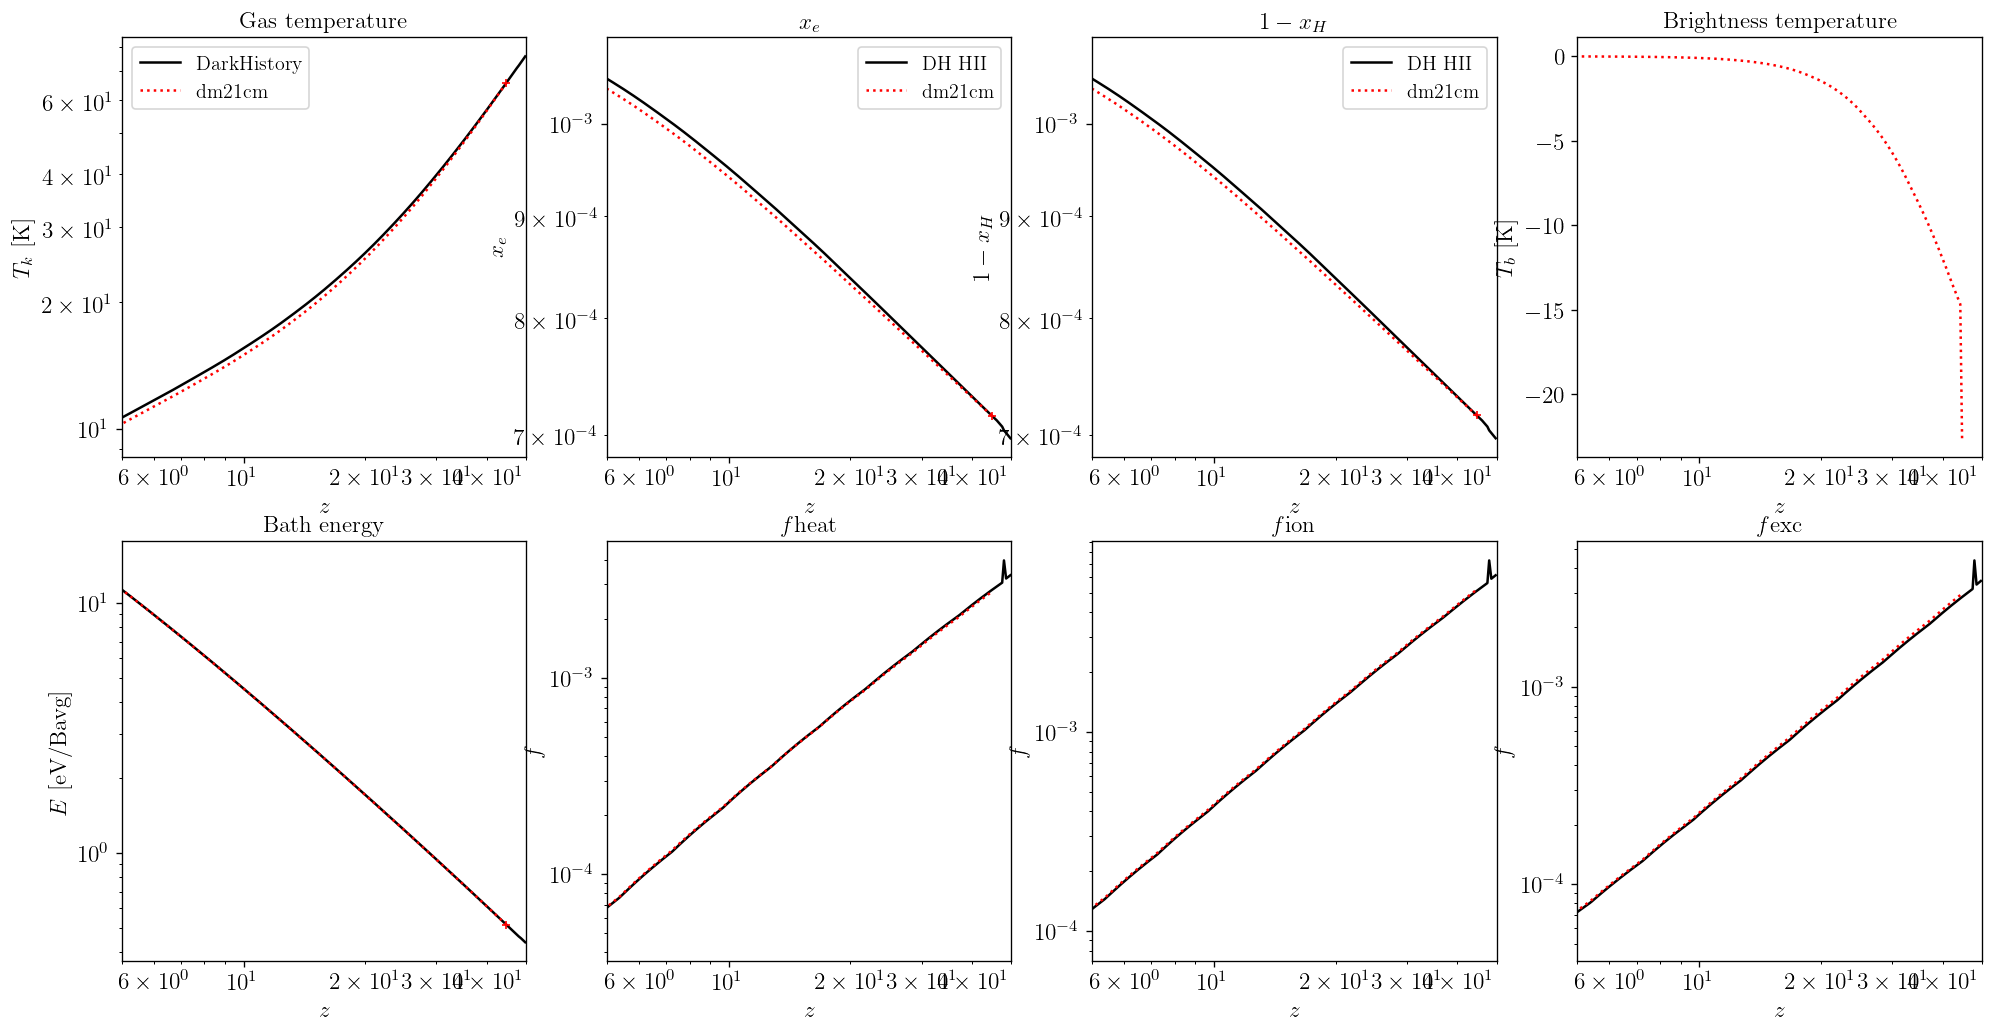

In [115]:
run_name = 'dhc_test'
dh_soln = pickle.load(open(f"run_info/{run_name}_dh_soln.p", 'rb'))
run_name = 'dhc_test'
soln = np.load(f"run_info/{run_name}_records.npy", allow_pickle=True).item()
plot_global(dh_soln, soln)

In [118]:
phys.A_per_B

0.9999992500000001

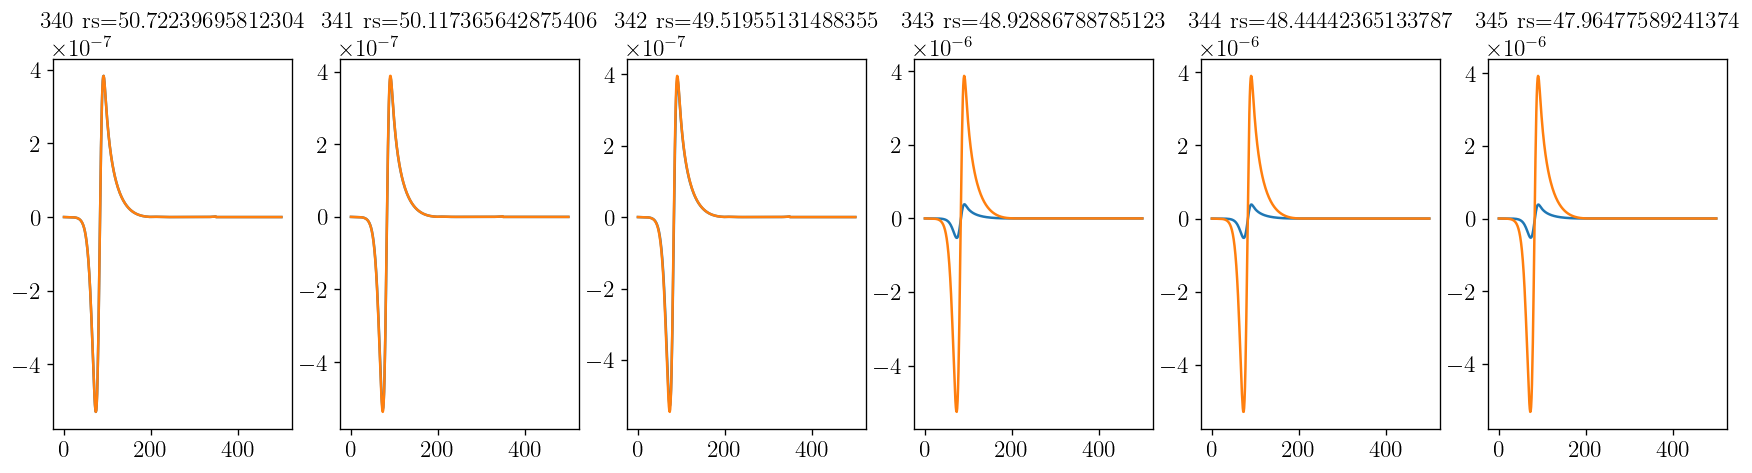

In [ ]:
fig, axs = plt.subplots(1, 6, figsize=(18,4))
for i in range(6):
    axs[i].plot(dh_soln['highengphot'][340].N)
    axs[i].plot(dh_soln['highengphot'][340+i].N)
    axs[i].set(title=f"{340+i} rs={dh_soln['rs'][340+i]}")

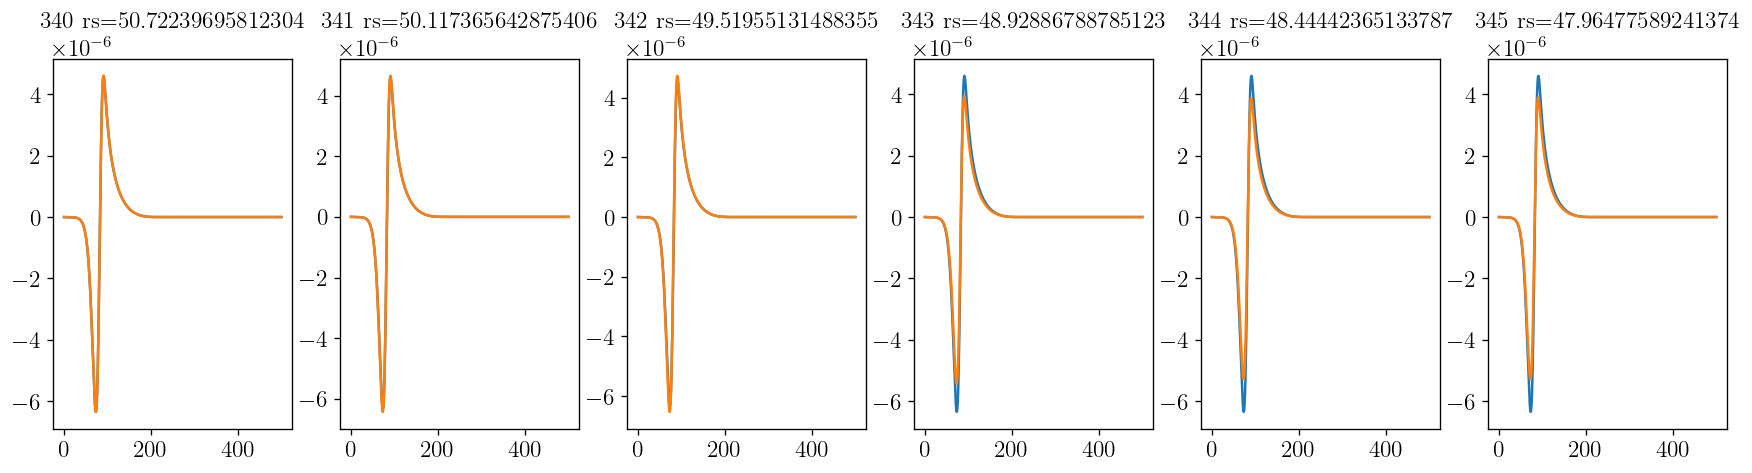

In [ ]:
fig, axs = plt.subplots(1, 6, figsize=(18,4))
for i in range(6):
    axs[i].plot(dh_soln['lowengphot'][340].N)
    axs[i].plot(dh_soln['lowengphot'][340+i].N)
    axs[i].set(title=f"{340+i} rs={dh_soln['rs'][340+i]}")

(45, 55)

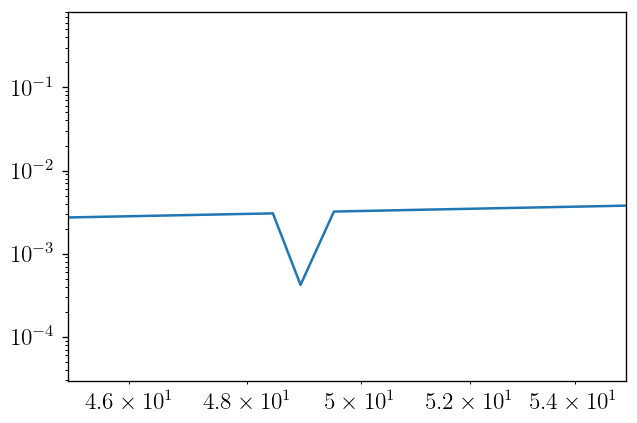

In [32]:
plt.plot(dh_soln['rs'], dh_soln['f']['low']['heat'])
plt.loglog()
plt.xlim(45, 55)

In [33]:
np.searchsorted(dh_soln['rs'][::-1], 45)

221

In [43]:
dh_soln['rs'][340:350]

array([50.72239696, 50.11736564, 49.51955131, 48.92886789, 48.44442365,
       47.96477589, 47.48987712, 47.01968032, 46.55413893, 46.09320686])

In [42]:
dh_soln['f']['low']['heat'][340:350]

array([0.00333702, 0.00327358, 0.00321077, 0.00042159, 0.0030538 ,
       0.00300836, 0.00296357, 0.00291929, 0.00287522, 0.00283162])

In [34]:
len(dh_soln['rs'])

573

In [23]:
from dm21cm.utils import load_h5_dict
abscs = load_h5_dict(f"../data/abscissas/abscs_{tf_version}.h5")

In [21]:
soln.keys()

dict_keys(['z', 'T_s', 'T_b', 'T_k', 'x_e', '1-x_H', 'E_phot', 'dE_inj_per_B', 'dE_inj_per_Bavg_unclustered', 'dep_ion', 'dep_exc', 'dep_heat', 'x_e_slice', 'x_H_slice'])

/tmp/ipykernel_1838978/3364818938.py:8: RuntimeWarning: invalid value encountered in divide
  interp_dm21 = interpolate.interp1d(soln['z'], soln[f'dep_{k}'] / soln[f'dE_inj_per_Bavg_unclustered'], bounds_error=False, fill_value=0.)


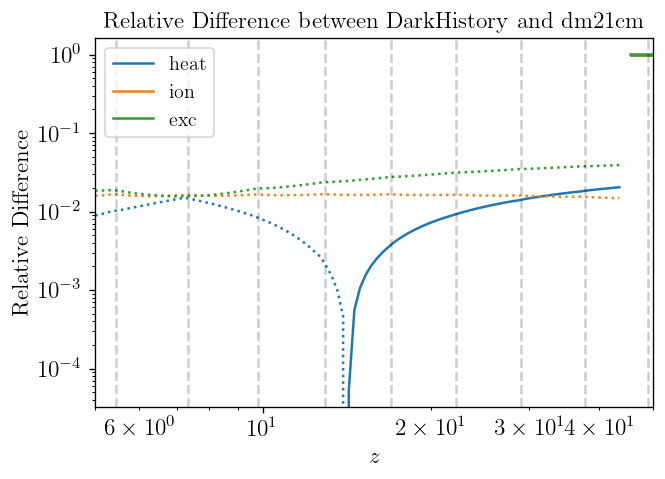

In [116]:
diffs = {}
for k in ['heat', 'ion', 'exc']:
    if k == 'ion':
        dh_fs = dh_soln['f']['low']['H ion'] + dh_soln['f']['high']['H ion'] + dh_soln['f']['low']['He ion'] + dh_soln['f']['high']['He ion']
    else:
        dh_fs = dh_soln['f']['low'][k] + dh_soln['f']['high'][k]
    interp_dh = interpolate.interp1d(dh_soln['rs'] - 1, dh_fs, bounds_error=False, fill_value=0.)
    interp_dm21 = interpolate.interp1d(soln['z'], soln[f'dep_{k}'] / soln[f'dE_inj_per_Bavg_unclustered'], bounds_error=False, fill_value=0.)

    common_x = np.geomspace(5, 50, 100)  # you can adjust the number of points
    common_dh = interp_dh(common_x)
    common_dm21 = interp_dm21(common_x)
    diffs.update({k : (common_dh - common_dm21) / common_dh})

fig, ax = plt.subplots()
for i, k in enumerate(diffs):
    ax.plot(common_x, diffs[k], label=k, color=f'C{i}')
    ax.plot(common_x, -diffs[k], ls=':', color=f'C{i}')
for rs in abscs['rs']:
    ax.axvline(rs-1, ls='--', color='k', alpha=0.2)
ax.set(xlim=(5, 50), xscale='log', yscale='log')  # adjust scales as needed
ax.set(xlabel='$z$', ylabel='Relative Difference', title='Relative Difference between DarkHistory and dm21cm')
ax.legend()

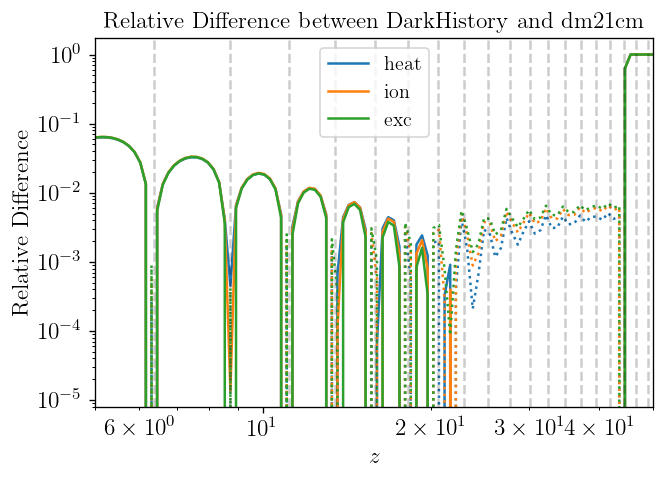

In [ ]:
diffs = {}
for k in ['heat', 'ion', 'exc']:
    if k == 'ion':
        dh_fs = dh_soln['f']['low']['H ion'] + dh_soln['f']['high']['H ion'] + dh_soln['f']['low']['He ion'] + dh_soln['f']['high']['He ion']
    else:
        dh_fs = dh_soln['f']['low'][k] + dh_soln['f']['high'][k]
    interp_dh = interpolate.interp1d(dh_soln['rs'] - 1, dh_fs, bounds_error=False, fill_value=0.)
    interp_dm21 = interpolate.interp1d(soln['z'], soln[f'f_{k}'], bounds_error=False, fill_value=0.)

    common_x = np.geomspace(5, 50, 100)  # you can adjust the number of points
    common_dh = interp_dh(common_x)
    common_dm21 = interp_dm21(common_x)
    diffs.update({k : (common_dh - common_dm21) / common_dh})

fig, ax = plt.subplots()
for i, k in enumerate(diffs):
    ax.plot(common_x, diffs[k], label=k, color=f'C{i}')
    ax.plot(common_x, -diffs[k], ls=':', color=f'C{i}')
for rs in abscs['rs']:
    ax.axvline(rs-1, ls='--', color='k', alpha=0.2)
ax.set(xlim=(5, 50), xscale='log', yscale='log')  # adjust scales as needed
ax.set(xlabel='$z$', ylabel='Relative Difference', title='Relative Difference between DarkHistory and dm21cm')
ax.legend()

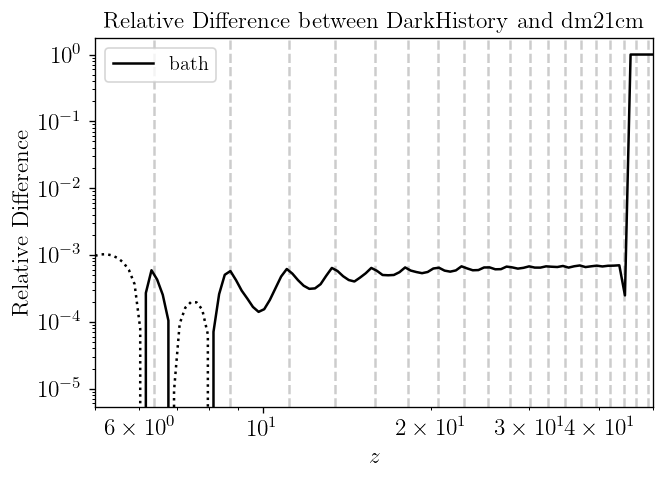

In [13]:
interp_dh = interpolate.interp1d(dh_soln['rs'] - 1, [s.toteng() for s in dh_soln['highengphot']], bounds_error=False, fill_value=0.)
interp_dm21 = interpolate.interp1d(soln['z'], soln['E_phot'], bounds_error=False, fill_value=0.)

common_x = np.geomspace(5, 50, 100)  # you can adjust the number of points
common_dh = interp_dh(common_x)
common_dm21 = interp_dm21(common_x)
diff = (common_dh - common_dm21) / common_dh

fig, ax = plt.subplots()
ax.plot(common_x, diff, label='bath', color=f'k')
ax.plot(common_x, -diff, ls=':', color=f'k')
for rs in abscs['rs']:
    ax.axvline(rs-1, ls='--', color='k', alpha=0.2)
ax.set(xlim=(5, 50), xscale='log', yscale='log')  # adjust scales as needed
ax.set(xlabel='$z$', ylabel='Relative Difference', title='Relative Difference between DarkHistory and dm21cm')
ax.legend()

In [18]:
dh_soln.keys()

dict_keys(['rs', 'x', 'Tm', 'highengphot', 'lowengphot', 'lowengelec', 'f'])

In [ ]:
zs = np.linspace(5.001, 44.999, 100)
dh_fs = dh_soln['f']['low']['heat'] + dh_soln['f']['high']['heat']
dh_arr = np.interp(1+zs, dh_soln['rs'][::-1], dh_fs[::-1])
p21c_arr = np.interp(zs, soln['z'][::-1], soln['f_heat'][::-1])
(np.abs(p21c_arr-dh_arr)/dh_arr)

In [ ]:
zs = np.linspace(5.001, 44.999, 100)
dh_bath_engs = [s.toteng() for s in dh_soln['highengphot']]
dh_arr = np.interp(1+zs, dh_soln['rs'][::-1], dh_bath_engs[::-1])
p21c_arr = np.interp(zs, soln['z'][::-1], soln['E_phot'][::-1])
np.max(np.abs(p21c_arr-dh_arr)/dh_arr)

0.05427165381579362

In [ ]:
plt.plot(zs, p21c_arr)
plt.plot(zs, dh_arr)